## Traitement des données de santé

- #### <span style="color:blue"> Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassement d'honoraires ?<span>
 
- #### <span style="color:blue"> Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?<span>
    
- #### <span style="color:blue"> Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ?<span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_honoraires = pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls", \
                              sheet_name = "Spécialistes", na_values="nc")

In [3]:
df_honoraires.head()

Spécialistes             DEPARTEMENT  EFFECTIFS  \
0  02- Anesthésie-réanimation chirurgicale                 01- Ain         17   
1  02- Anesthésie-réanimation chirurgicale               02- Aisne         19   
2  02- Anesthésie-réanimation chirurgicale              03- Allier         19   
3  02- Anesthésie-réanimation chirurgicale  04- Alpes-Hte-Provence          4   
4  02- Anesthésie-réanimation chirurgicale        05- Hautes-Alpes          5   

   HONORAIRES SANS DEPASSEMENT (Euros)  DEPASSEMENTS (Euros)  \
0                           4530079.33            2496180.45   
1                           4985259.62             373837.57   
2                           5102901.70             560978.59   
3                                  NaN                   NaN   
4                                  NaN                   NaN   

   FRAIS DE DEPLACEMENT (Euros)  TOTAL DES HONORAIRES (Euros)  
0                           0.0                    7026259.78  
1                           0.0                    5359097.19  
2                           0.0                    5663880.29  
3                           NaN                           NaN  
4                           NaN                           NaN

In [4]:
df_honoraires.columns

Index(['Spécialistes', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'],
      dtype='object')

In [5]:
df_honoraires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 7 columns):
Spécialistes                           5512 non-null object
DEPARTEMENT                            5512 non-null object
EFFECTIFS                              5512 non-null int64
HONORAIRES SANS DEPASSEMENT (Euros)    3213 non-null float64
DEPASSEMENTS (Euros)                   3213 non-null float64
FRAIS DE DEPLACEMENT (Euros)           3213 non-null float64
TOTAL DES HONORAIRES (Euros)           3213 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 301.5+ KB


- #### <span style="color:blue"> Nous avons seulement 3213 honoraires avec ou sans dépassement non null. Comme ils sont des valeurs imporatantes, il vaut mieux se restraintdre à celles-ci... <span>

In [6]:
mask1 = df_honoraires["DEPASSEMENTS (Euros)"].notnull()
df_honoraires = df_honoraires[mask1]
df_honoraires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 5511
Data columns (total 7 columns):
Spécialistes                           3213 non-null object
DEPARTEMENT                            3213 non-null object
EFFECTIFS                              3213 non-null int64
HONORAIRES SANS DEPASSEMENT (Euros)    3213 non-null float64
DEPASSEMENTS (Euros)                   3213 non-null float64
FRAIS DE DEPLACEMENT (Euros)           3213 non-null float64
TOTAL DES HONORAIRES (Euros)           3213 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 200.8+ KB


- #### <span style="color:blue"> On peut encore enlever les lignes dont la case qui correspond à la colonne "TOTAL DES HONORAIRES (Euros)" ou la colonne "EFFECTIFS" est égale à 0. <span>

In [7]:
mask2 = df_honoraires["TOTAL DES HONORAIRES (Euros)"] != 0.0
df_honoraires = df_honoraires[mask2]
mask3 = df_honoraires["EFFECTIFS"] != 0.0
df_honoraires = df_honoraires[mask3]
df_honoraires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 5511
Data columns (total 7 columns):
Spécialistes                           1962 non-null object
DEPARTEMENT                            1962 non-null object
EFFECTIFS                              1962 non-null int64
HONORAIRES SANS DEPASSEMENT (Euros)    1962 non-null float64
DEPASSEMENTS (Euros)                   1962 non-null float64
FRAIS DE DEPLACEMENT (Euros)           1962 non-null float64
TOTAL DES HONORAIRES (Euros)           1962 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 122.6+ KB


- ## <span style="color:blue">Ce nétoyage est bénifique pour notre mémoire cache puisque le dataFrame ne fait plus que 122.6 KB au lieu de 301.5 KB. <span>

- #### <span style="color:blue"> Ajoutant une colonne qui correspond à la moyenne des dépassement par médecin. <span>

In [8]:
df_honoraires["MOYENNE DEPASS PAR MED"] = df_honoraires["DEPASSEMENTS (Euros)"] / df_honoraires["EFFECTIFS"]
df_honoraires = df_honoraires.sort_values("MOYENNE DEPASS PAR MED", ascending=False)
df_honoraires.head()

Spécialistes         DEPARTEMENT  \
2987                           10- Neurochirurgie   75- Paris (Ville)   
5067  41- Chirurgie orthopédique et traumatologie   75- Paris (Ville)   
3812                     16- Chirurgie urologique       68- Haut-Rhin   
1548                74- Oncologie radiothérapique  92- Hauts-de-Seine   
4134                             18- Stomatologie        78- Yvelines   

      EFFECTIFS  HONORAIRES SANS DEPASSEMENT (Euros)  DEPASSEMENTS (Euros)  \
2987         23                           3830445.46            5699971.16   
5067        210                          40796731.62           50665688.51   
3812         11                           2427333.15            2503452.23   
1548         16                          23838880.55            3581828.81   
4134         22                           3489294.24            4884043.95   

      FRAIS DE DEPLACEMENT (Euros)  TOTAL DES HONORAIRES (Euros)  \
2987                          0.00                    9530416.62   
5067                         42.64                   91462462.77   
3812                          0.00                    4930785.38   
1548                          0.00                   27420709.36   
4134                          0.00                    8373338.19   

      MOYENNE DEPASS PAR MED  
2987           247824.833043  
5067           241265.183381  
3812           227586.566364  
1548           223864.300625  
4134           222001.997727

- #### <span style="color:blue"> Ci-dessous, le graphe des spécialistes en fonction des 50 plus grandes moyennes de dépassement. <span>

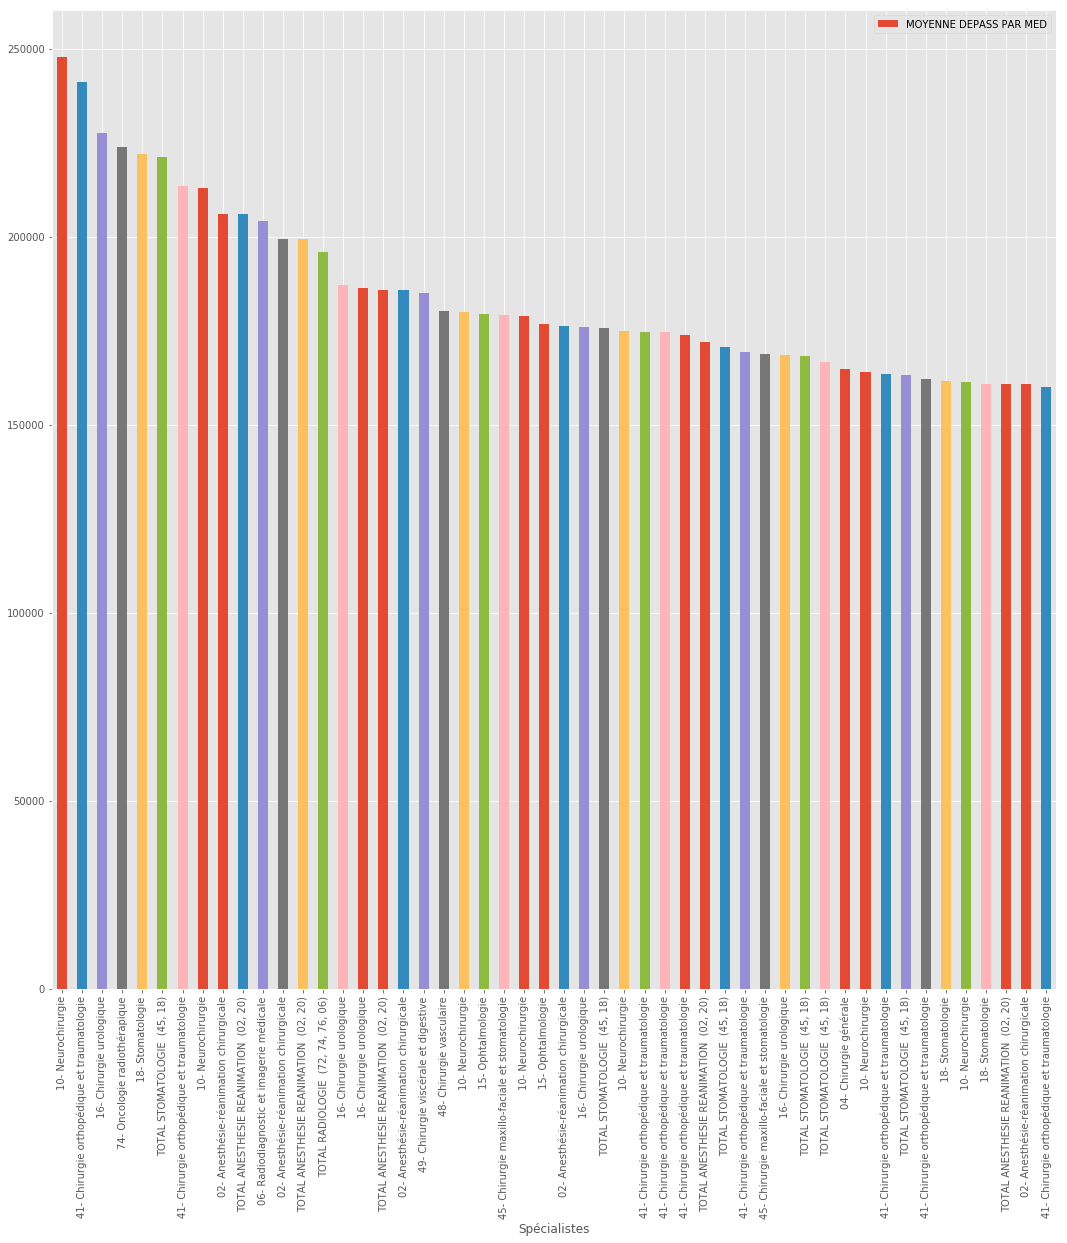

In [9]:
plt.style.use("ggplot")
df_honoraires[:50].plot("Spécialistes","MOYENNE DEPASS PAR MED", kind="bar", figsize=(18,18))

- #### <span style="color:blue"> Ajoutons une colonne numéro de dépatement qui nous servira pour merger le dataFrame df_honoraires avec un dataFrame qui va contenir des données sur les opulations. <span>

In [10]:
df_honoraires["Depart num"] = df_honoraires["DEPARTEMENT"].str[:2]

In [11]:
pop = pd.DataFrame(pd.read_excel("estim-pop-dep-sexe-aq-1975-2018.xls", sheet_name = "2016", na_values="nan"))
for c in pop.columns:
    mask3 = pop[c].notnull()
    pop = pop[mask3]
#pop = pop.drop(["Estimation de population au 1er janvier, par département, sexe et âge quinquennal"], axis=1)
noms = ["Depart num", "Depart nom", "0 à 4 ans","5 à 9 ans","10 à 14 ans","15 à 19 ans","20 à 24 ans","25 à 29 ans","30 à 34 ans","35 à 39 ans","40 à 44 ans","45 à 49 ans","50 à 54 ans","55 à 59 ans","60 à 64 ans","65 à 69 ans","70 à 74 ans"]

for i in range(17, 65):
    n = "Unnamed: " + str(i)
    pop = pop.drop([n], axis=1)
pop.columns = noms
pop.head()

Depart num               Depart nom 0 à 4 ans 5 à 9 ans 10 à 14 ans  \
4         01                      Ain     39758     44566       43975   
5         02                    Aisne     32675     35227       35718   
6         03                   Allier     15882     18048       19039   
7         04  Alpes-de-Haute-Provence      7815      8764        9523   
8         05             Hautes-Alpes      7177      8234        8547   

  15 à 19 ans 20 à 24 ans 25 à 29 ans 30 à 34 ans 35 à 39 ans 40 à 44 ans  \
4       38722       29573       35715       40599       42081       46245   
5       33264       25933       29856       31343       30998       35138   
6       18217       14895       15488       16997       17341       21456   
7        8710        6265        7178        8285        8463        9802   
8        7493        5880        6762        7819        8254        9313   

  45 à 49 ans 50 à 54 ans 55 à 59 ans 60 à 64 ans 65 à 69 ans 70 à 74 ans  
4       46589       44992       40053       36907       34792       23095  
5       35825       37158       36469       36011       34246       18858  
6       22645       23940       23984       25271       25677       17141  
7       11184       11674       11872       11643       12216        8794  
8       10023       10145        9970        9990        9608        6444

In [12]:
df_hon_pop = df_honoraires.merge(pop, how="right", left_on="Depart num", right_on="Depart num")
df_hon_pop = df_hon_pop.drop(["Depart num", "Depart nom"], axis= 1)
df_hon_pop.head()

Spécialistes        DEPARTEMENT  EFFECTIFS  \
0                           10- Neurochirurgie  75- Paris (Ville)       23.0   
1  41- Chirurgie orthopédique et traumatologie  75- Paris (Ville)      210.0   
2     06- Radiodiagnostic et imagerie médicale  75- Paris (Ville)      327.0   
3           TOTAL RADIOLOGIE  (72, 74, 76, 06)  75- Paris (Ville)      342.0   
4                     16- Chirurgie urologique  75- Paris (Ville)       54.0   

   HONORAIRES SANS DEPASSEMENT (Euros)  DEPASSEMENTS (Euros)  \
0                         3.830445e+06            5699971.16   
1                         4.079673e+07           50665688.51   
2                         1.290769e+08           66757007.51   
3                         1.433728e+08           66971556.26   
4                         5.866089e+06           10111389.94   

   FRAIS DE DEPLACEMENT (Euros)  TOTAL DES HONORAIRES (Euros)  \
0                          0.00                  9.530417e+06   
1                         42.64                  9.146246e+07   
2                         22.09                  1.958339e+08   
3                         22.09                  2.103444e+08   
4                          0.00                  1.597748e+07   

   MOYENNE DEPASS PAR MED 0 à 4 ans 5 à 9 ans     ...     25 à 29 ans  \
0           247824.833043    111220    103279     ...          217270   
1           241265.183381    111220    103279     ...          217270   
2           204149.870061    111220    103279     ...          217270   
3           195823.263918    111220    103279     ...          217270   
4           187247.961852    111220    103279     ...          217270   

  30 à 34 ans 35 à 39 ans 40 à 44 ans 45 à 49 ans 50 à 54 ans 55 à 59 ans  \
0      181180      158236      152298      141694      137734      124951   
1      181180      158236      152298      141694      137734      124951   
2      181180      158236      152298      141694      137734      124951   
3      181180      158236      152298      141694      137734      124951   
4      181180      158236      152298      141694      137734      124951   

  60 à 64 ans 65 à 69 ans 70 à 74 ans  
0      115522      114610       76922  
1      115522      114610       76922  
2      115522      114610       76922  
3      115522      114610       76922  
4      115522      114610       76922  

[5 rows x 23 columns]

In [13]:
df_hon_pop["Pop 0 à 74"] = df_hon_pop.loc[:, "0 à 4 ans":].sum(axis=1)
df_hon_pop.head()

Spécialistes        DEPARTEMENT  EFFECTIFS  \
0                           10- Neurochirurgie  75- Paris (Ville)       23.0   
1  41- Chirurgie orthopédique et traumatologie  75- Paris (Ville)      210.0   
2     06- Radiodiagnostic et imagerie médicale  75- Paris (Ville)      327.0   
3           TOTAL RADIOLOGIE  (72, 74, 76, 06)  75- Paris (Ville)      342.0   
4                     16- Chirurgie urologique  75- Paris (Ville)       54.0   

   HONORAIRES SANS DEPASSEMENT (Euros)  DEPASSEMENTS (Euros)  \
0                         3.830445e+06            5699971.16   
1                         4.079673e+07           50665688.51   
2                         1.290769e+08           66757007.51   
3                         1.433728e+08           66971556.26   
4                         5.866089e+06           10111389.94   

   FRAIS DE DEPLACEMENT (Euros)  TOTAL DES HONORAIRES (Euros)  \
0                          0.00                  9.530417e+06   
1                         42.64                  9.146246e+07   
2                         22.09                  1.958339e+08   
3                         22.09                  2.103444e+08   
4                          0.00                  1.597748e+07   

   MOYENNE DEPASS PAR MED 0 à 4 ans 5 à 9 ans    ...     30 à 34 ans  \
0           247824.833043    111220    103279    ...          181180   
1           241265.183381    111220    103279    ...          181180   
2           204149.870061    111220    103279    ...          181180   
3           195823.263918    111220    103279    ...          181180   
4           187247.961852    111220    103279    ...          181180   

  35 à 39 ans 40 à 44 ans 45 à 49 ans 50 à 54 ans 55 à 59 ans 60 à 64 ans  \
0      158236      152298      141694      137734      124951      115522   
1      158236      152298      141694      137734      124951      115522   
2      158236      152298      141694      137734      124951      115522   
3      158236      152298      141694      137734      124951      115522   
4      158236      152298      141694      137734      124951      115522   

  65 à 69 ans 70 à 74 ans Pop 0 à 74  
0      114610       76922  2026465.0  
1      114610       76922  2026465.0  
2      114610       76922  2026465.0  
3      114610       76922  2026465.0  
4      114610       76922  2026465.0  

[5 rows x 24 columns]

In [15]:
df_hon_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 1776
Data columns (total 24 columns):
Spécialistes                           1772 non-null object
DEPARTEMENT                            1772 non-null object
EFFECTIFS                              1772 non-null float64
HONORAIRES SANS DEPASSEMENT (Euros)    1772 non-null float64
DEPASSEMENTS (Euros)                   1772 non-null float64
FRAIS DE DEPLACEMENT (Euros)           1772 non-null float64
TOTAL DES HONORAIRES (Euros)           1772 non-null float64
MOYENNE DEPASS PAR MED                 1772 non-null float64
0 à 4 ans                              1777 non-null object
5 à 9 ans                              1777 non-null object
10 à 14 ans                            1777 non-null object
15 à 19 ans                            1777 non-null object
20 à 24 ans                            1777 non-null object
25 à 29 ans                            1777 non-null object
30 à 34 ans                            1777 non

- #### <span style="color:blue"> Ci-dessous on regroupe par spécialité et on plot les dépassement moyens par médecin sur les département pour chaque spécialité. <span>

/home/arij/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Spécialistes
02- Anesthésie-réanimation chirurgicale                  AxesSubplot(0.125,0.125;0.775x0.755)
03- Pathologie cardio-vasculaire                         AxesSubplot(0.125,0.125;0.775x0.755)
04- Chirurgie générale                                   AxesSubplot(0.125,0.125;0.775x0.755)
05- Dermato-vénéréologie                                 AxesSubplot(0.125,0.125;0.775x0.755)
06- Radiodiagnostic et imagerie médicale                 AxesSubplot(0.125,0.125;0.775x0.755)
07- Gynécologie obstétrique                              AxesSubplot(0.125,0.125;0.775x0.755)
08- Gastro-entérologie et hépatologie                    AxesSubplot(0.125,0.125;0.775x0.755)
09- Médecine interne                                     AxesSubplot(0.125,0.125;0.775x0.755)
10- Neurochirurgie                                       AxesSubplot(0.125,0.125;0.775x0.755)
11- Oto-rhino-laryngologie                               AxesSubplot(0.125,0.125;0.775x0.755)
12- Pédiatrie                                  

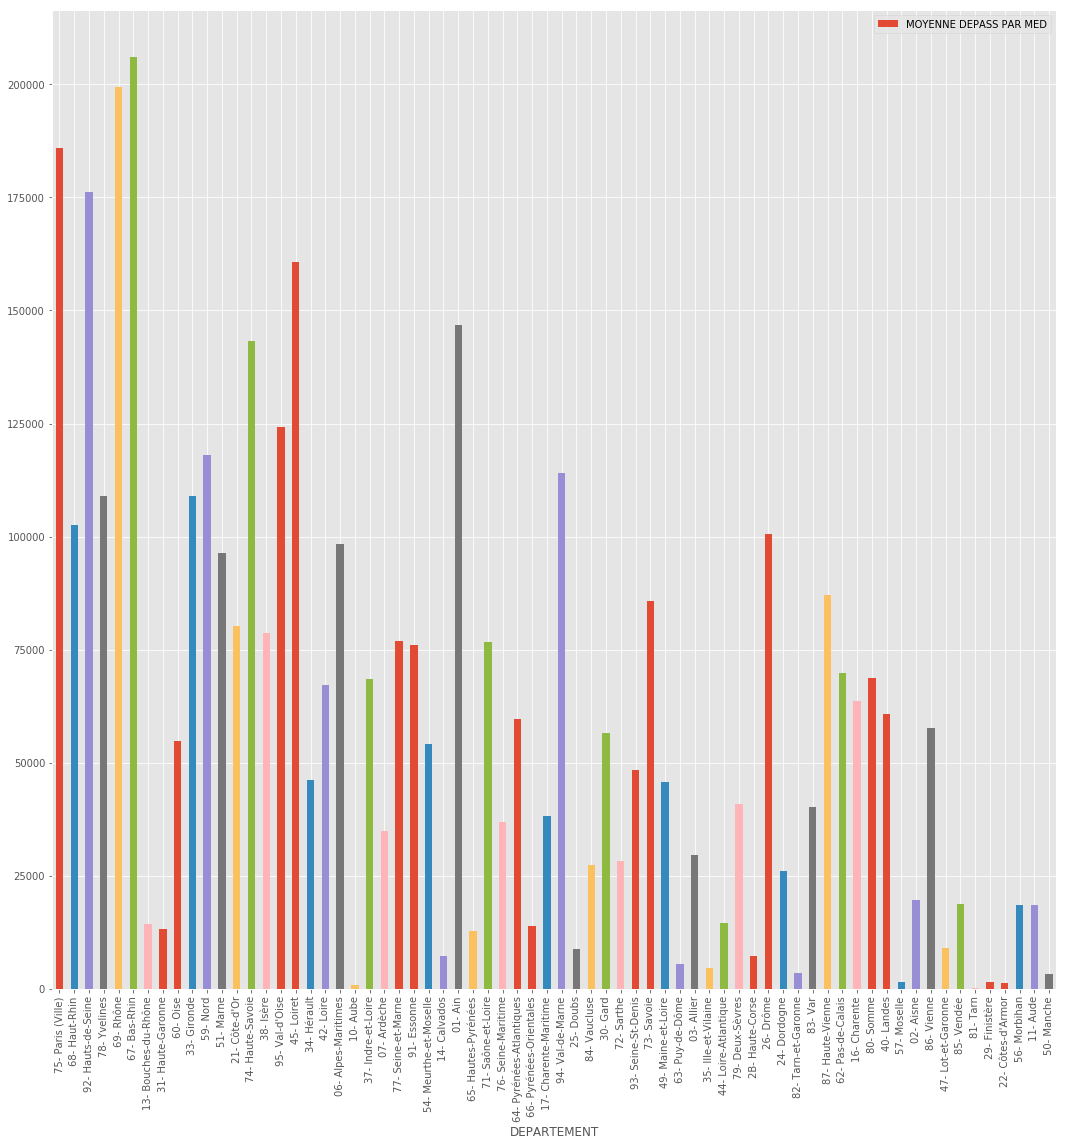

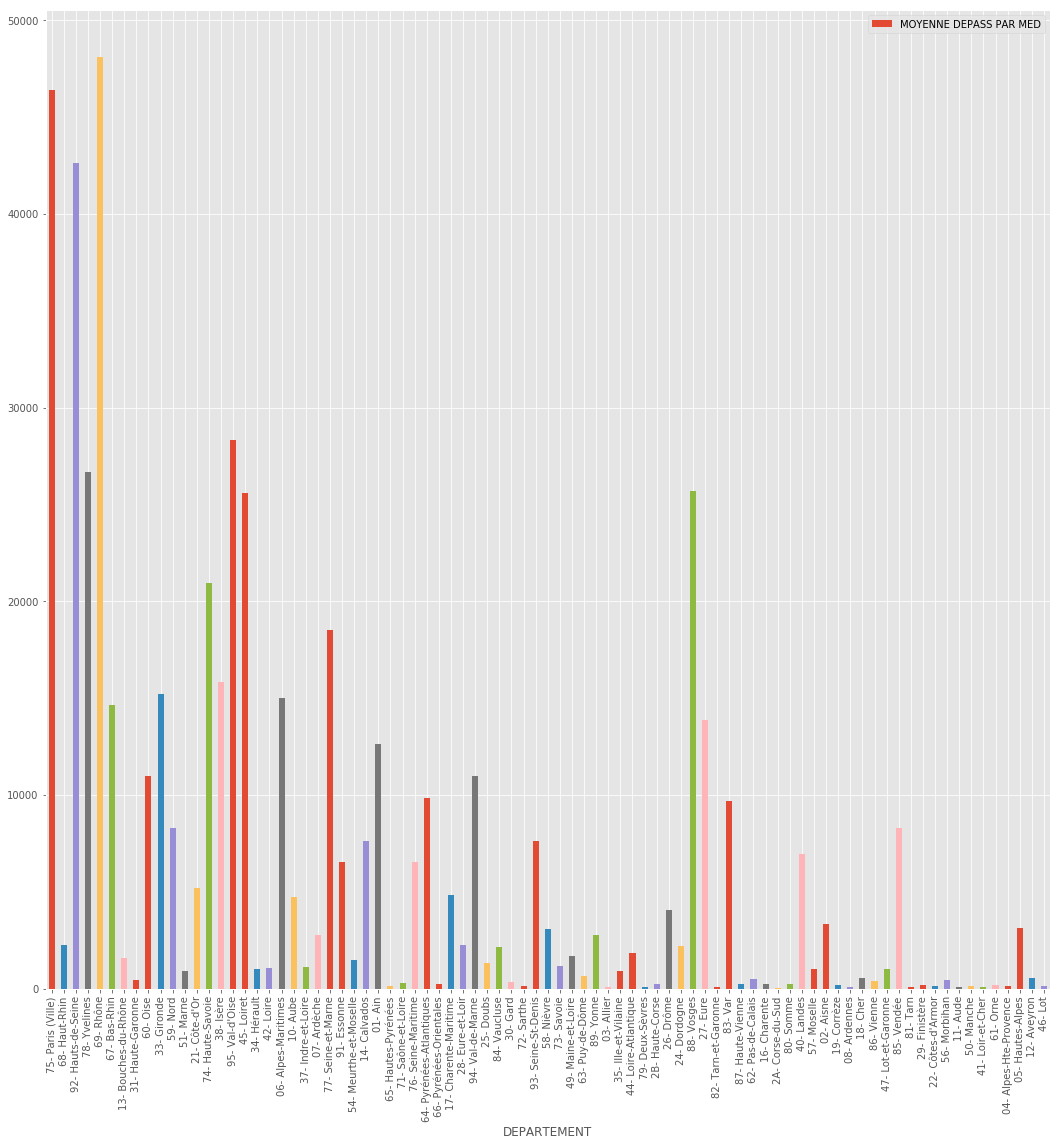

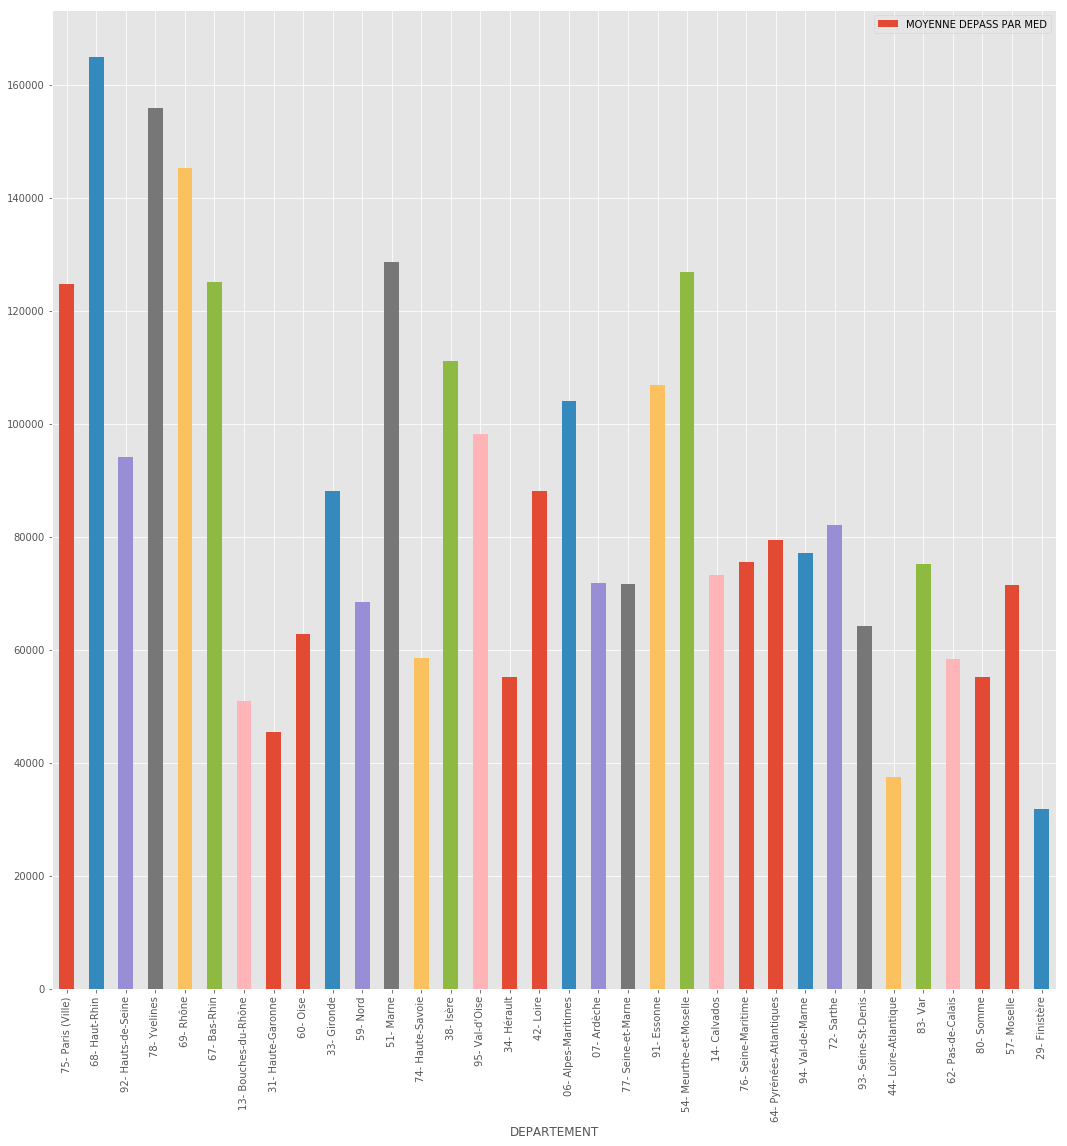

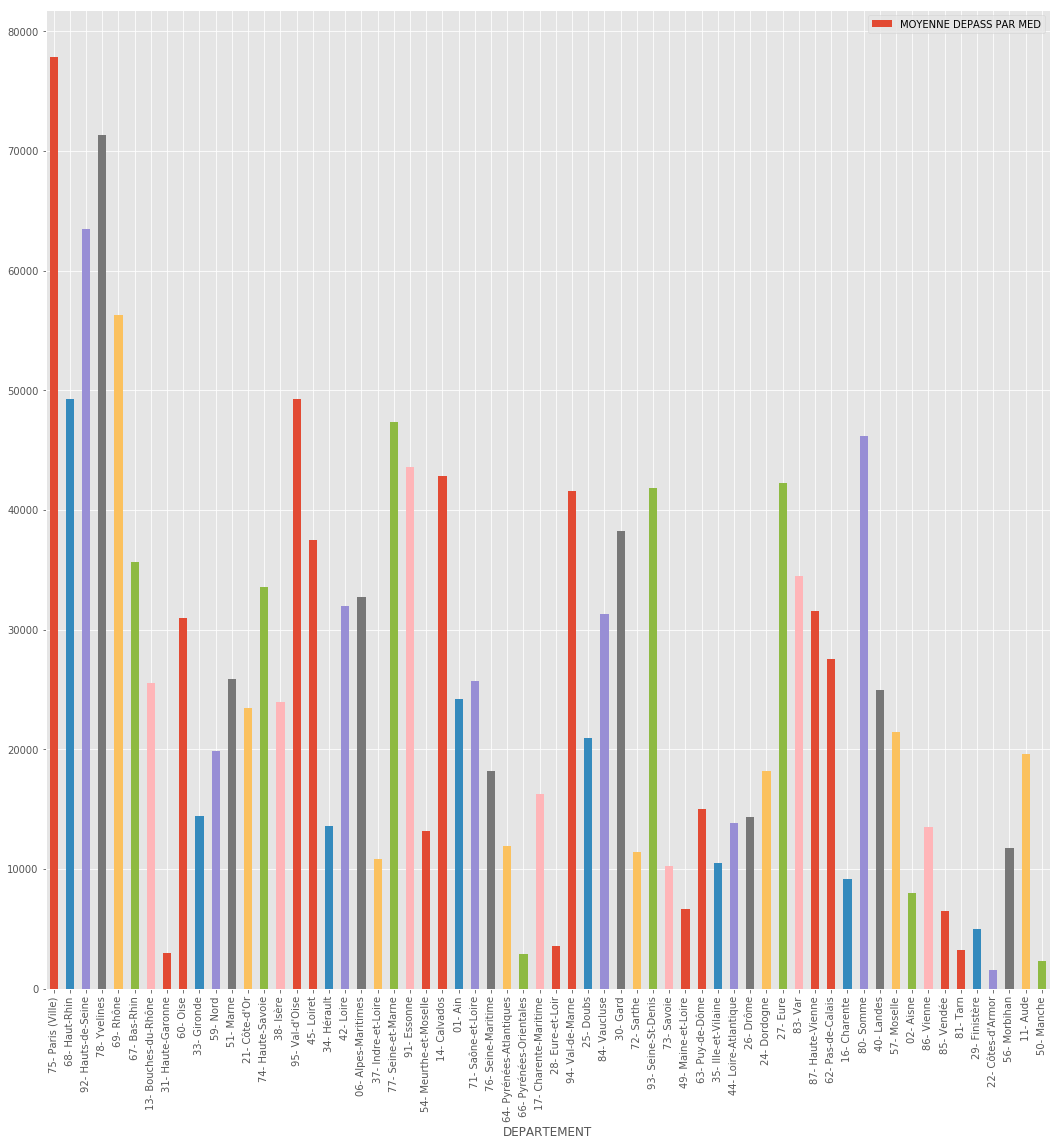

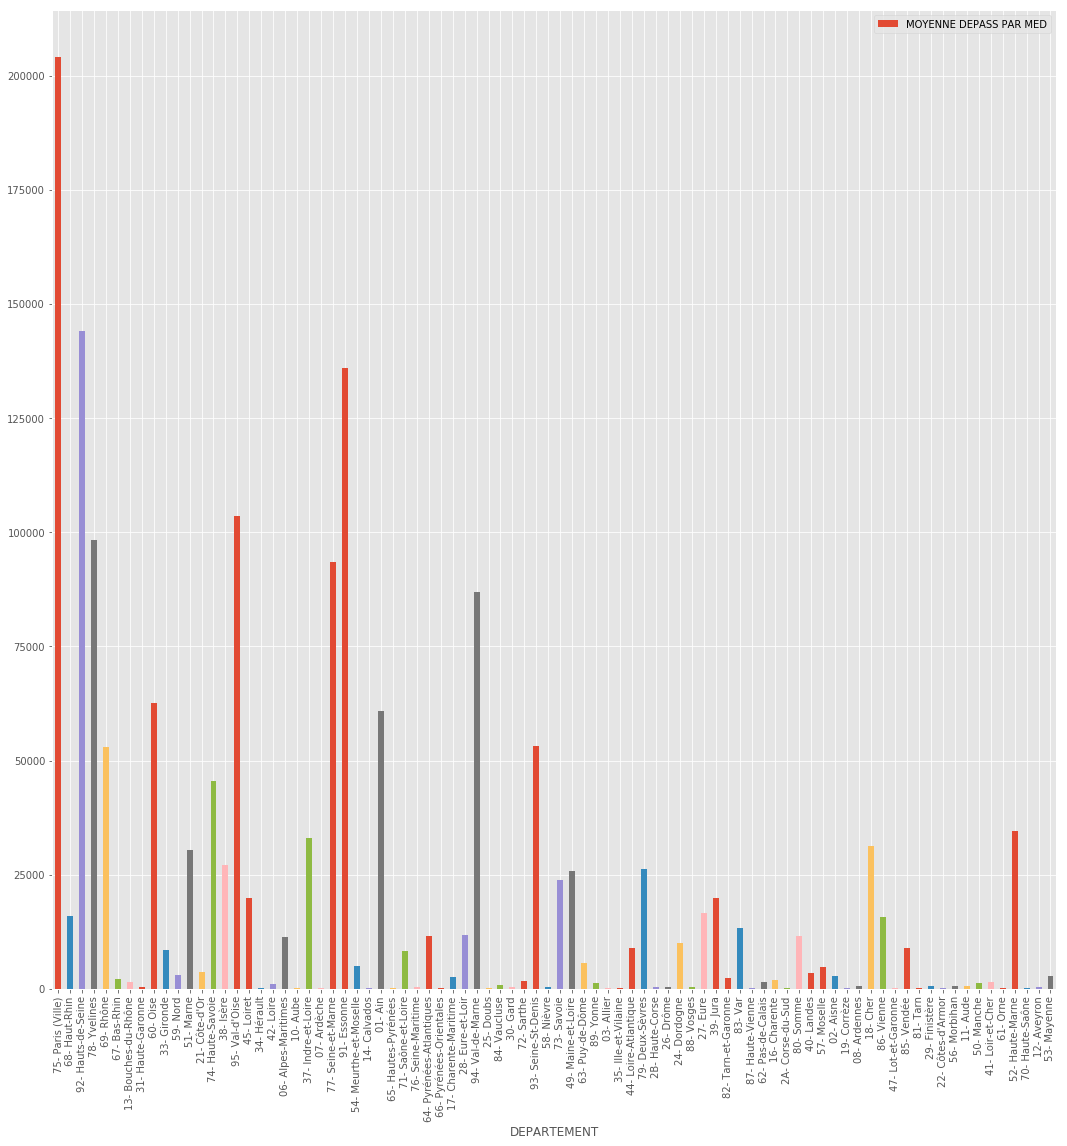

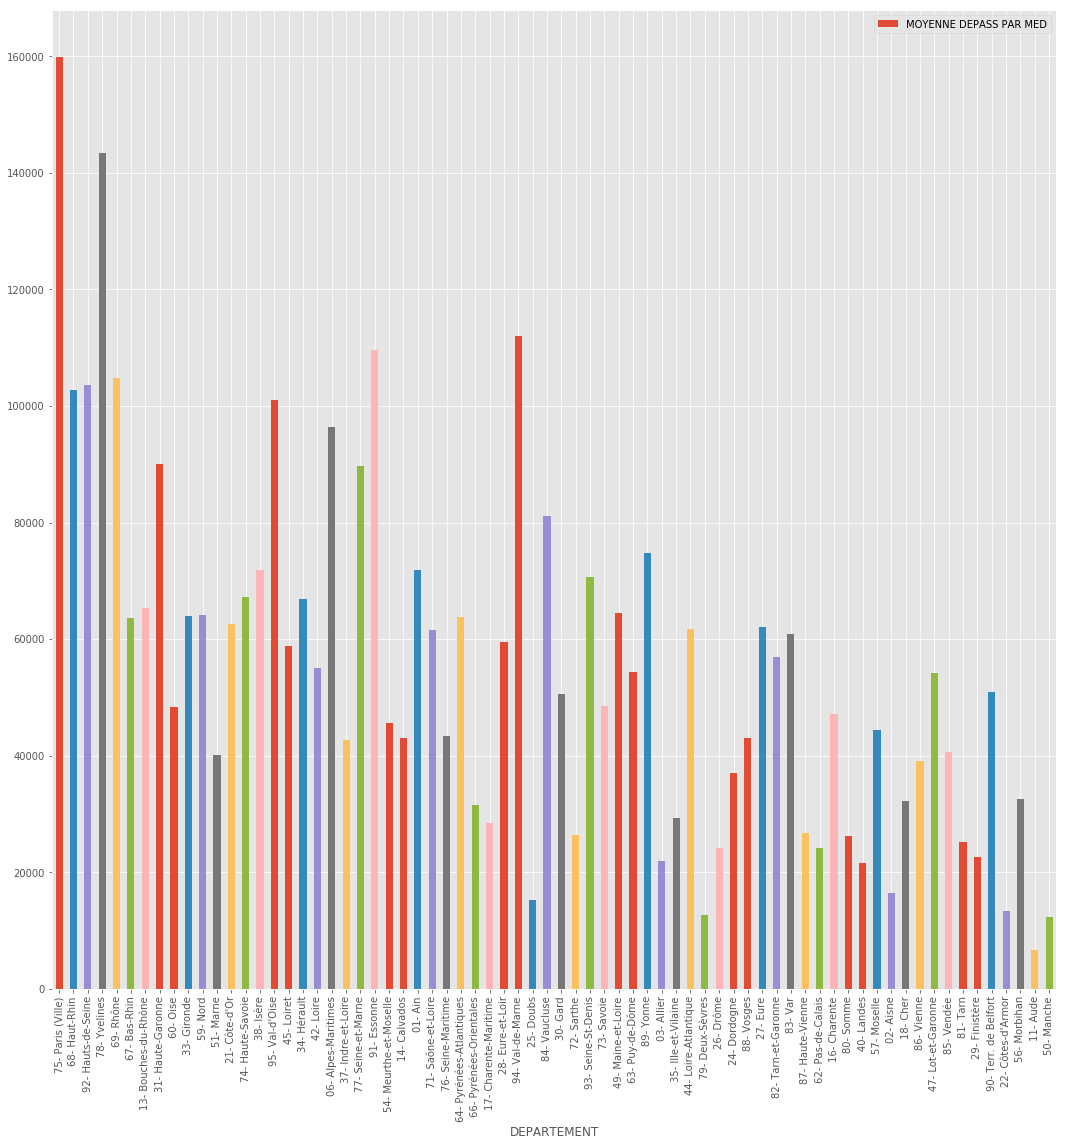

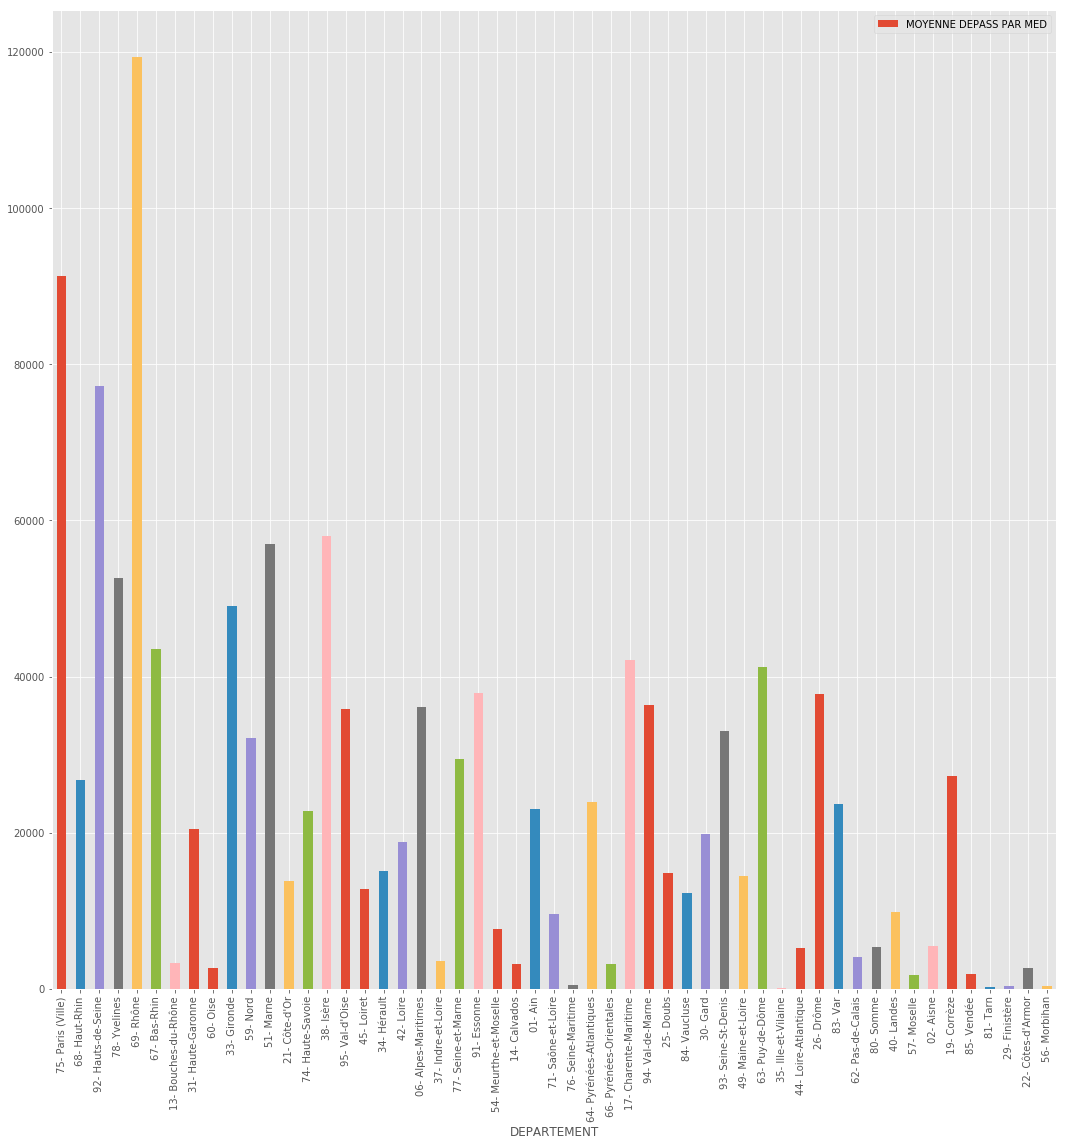

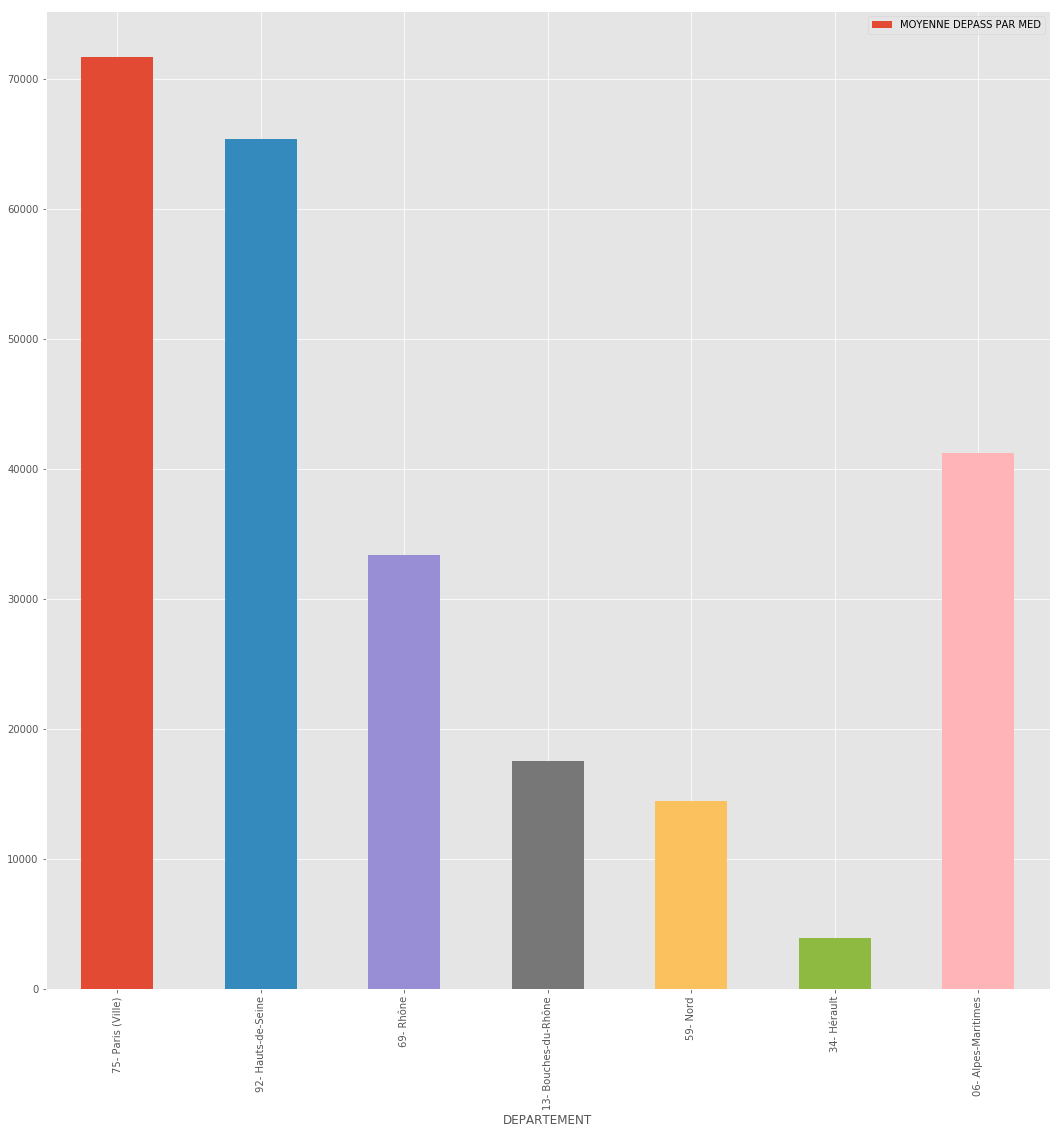

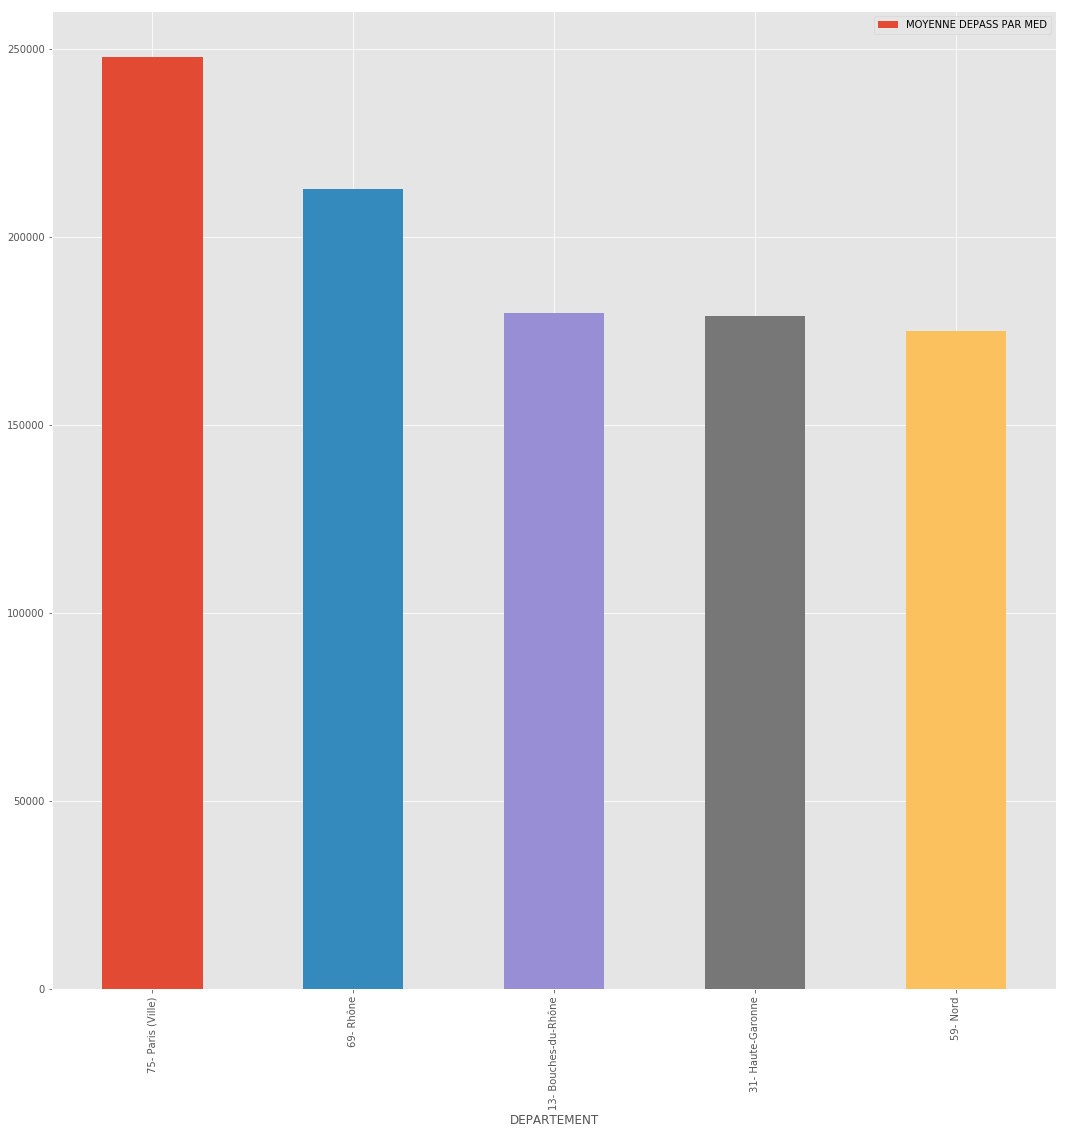

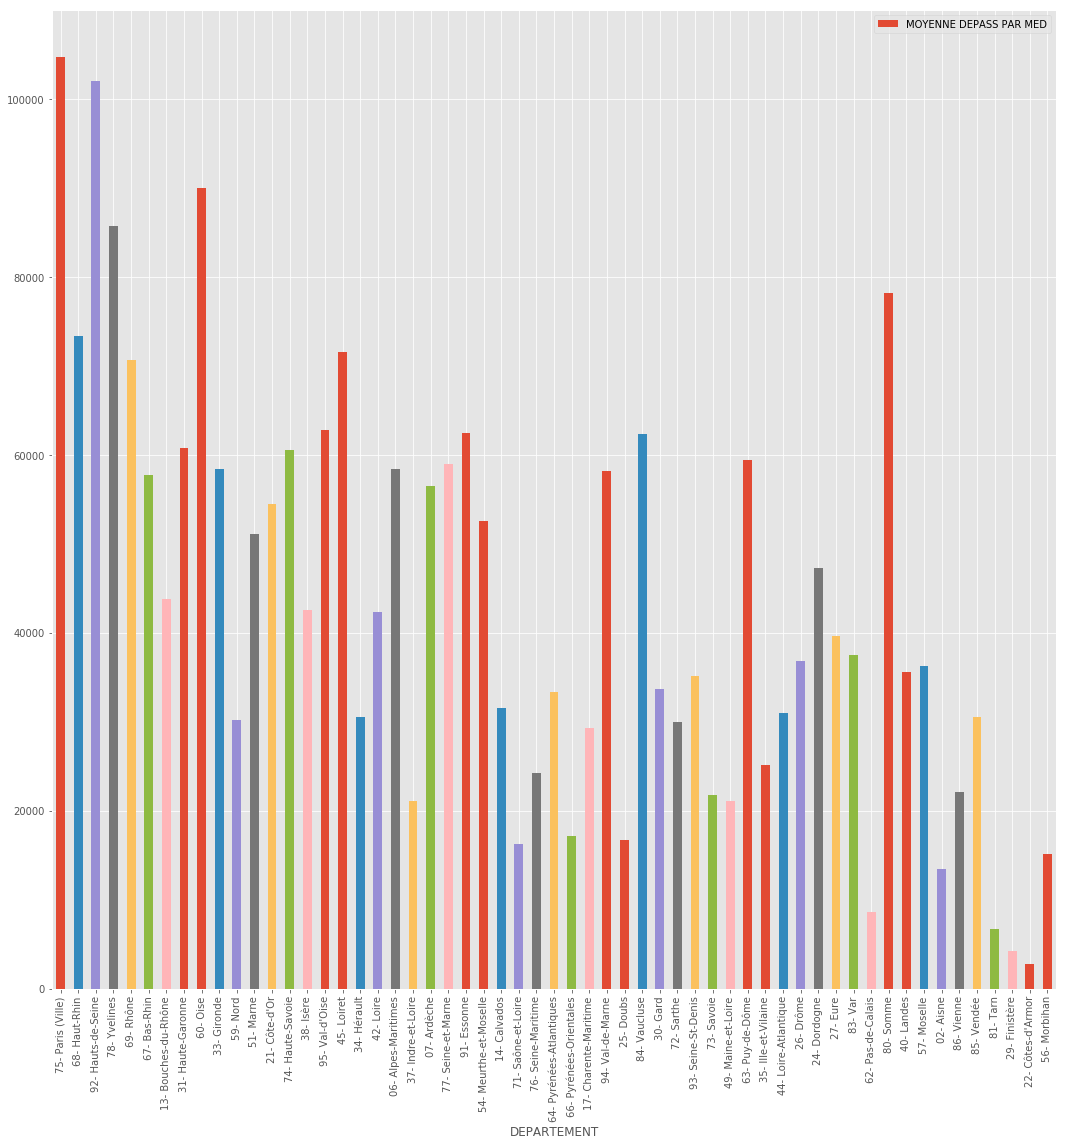

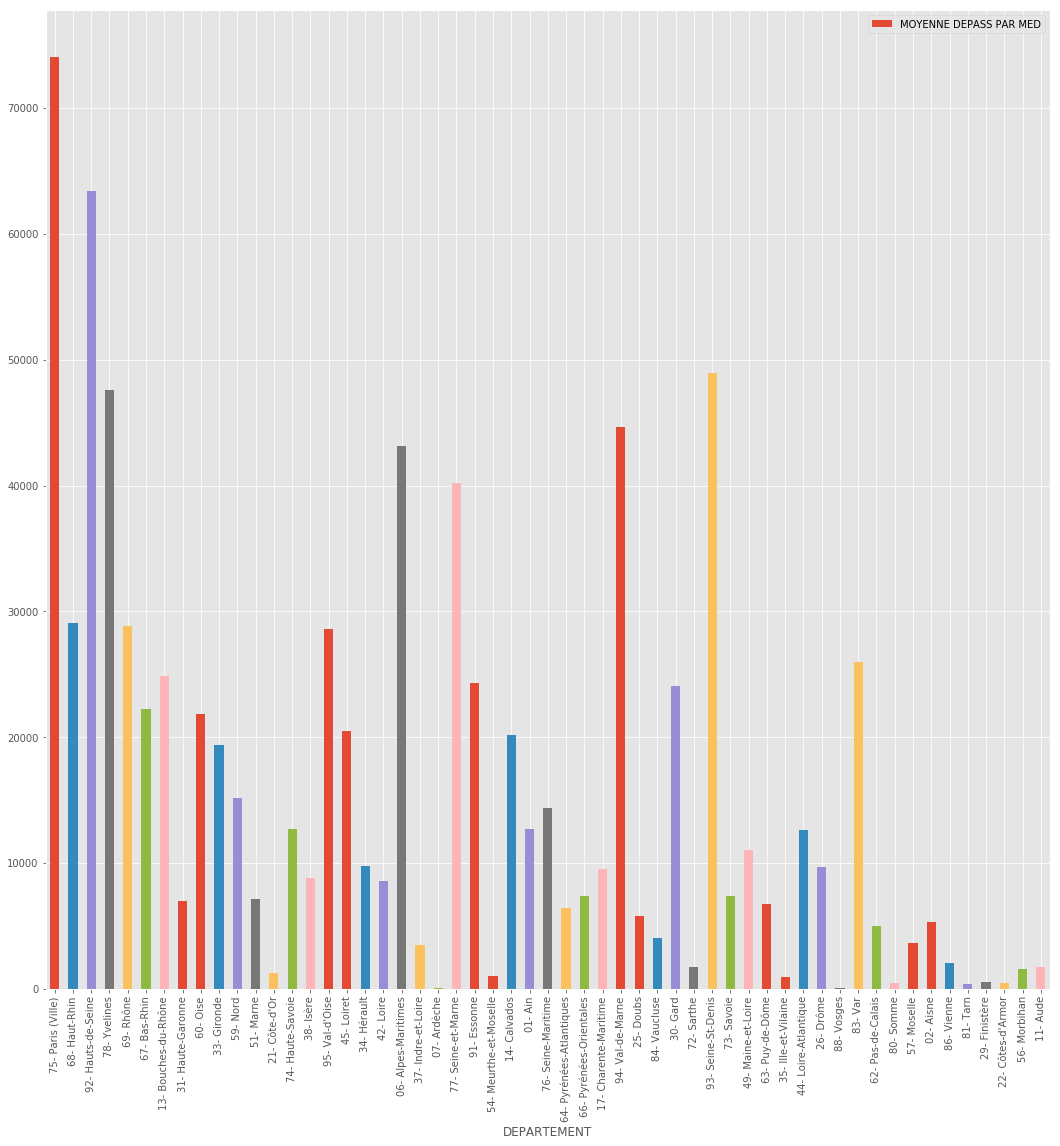

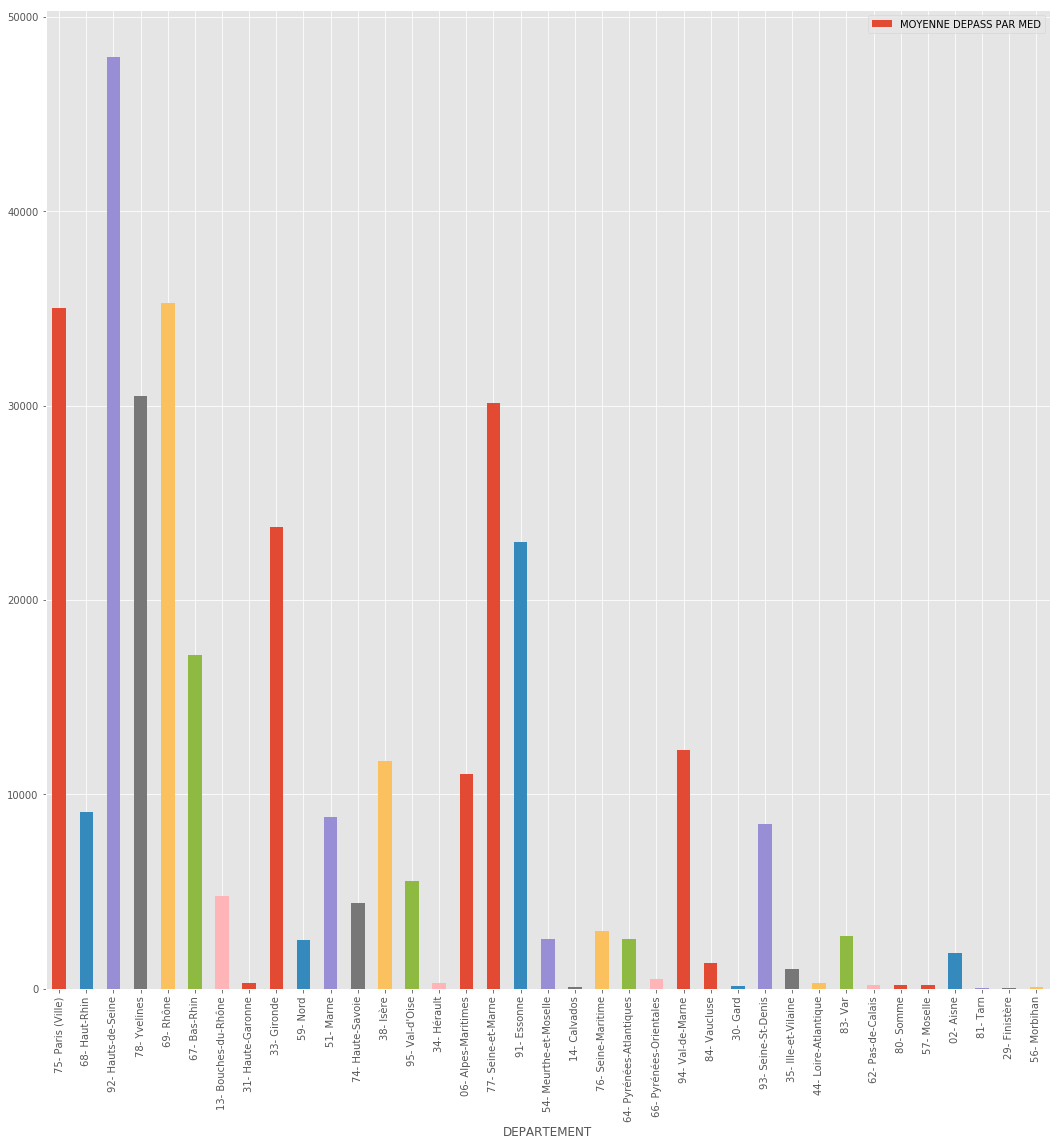

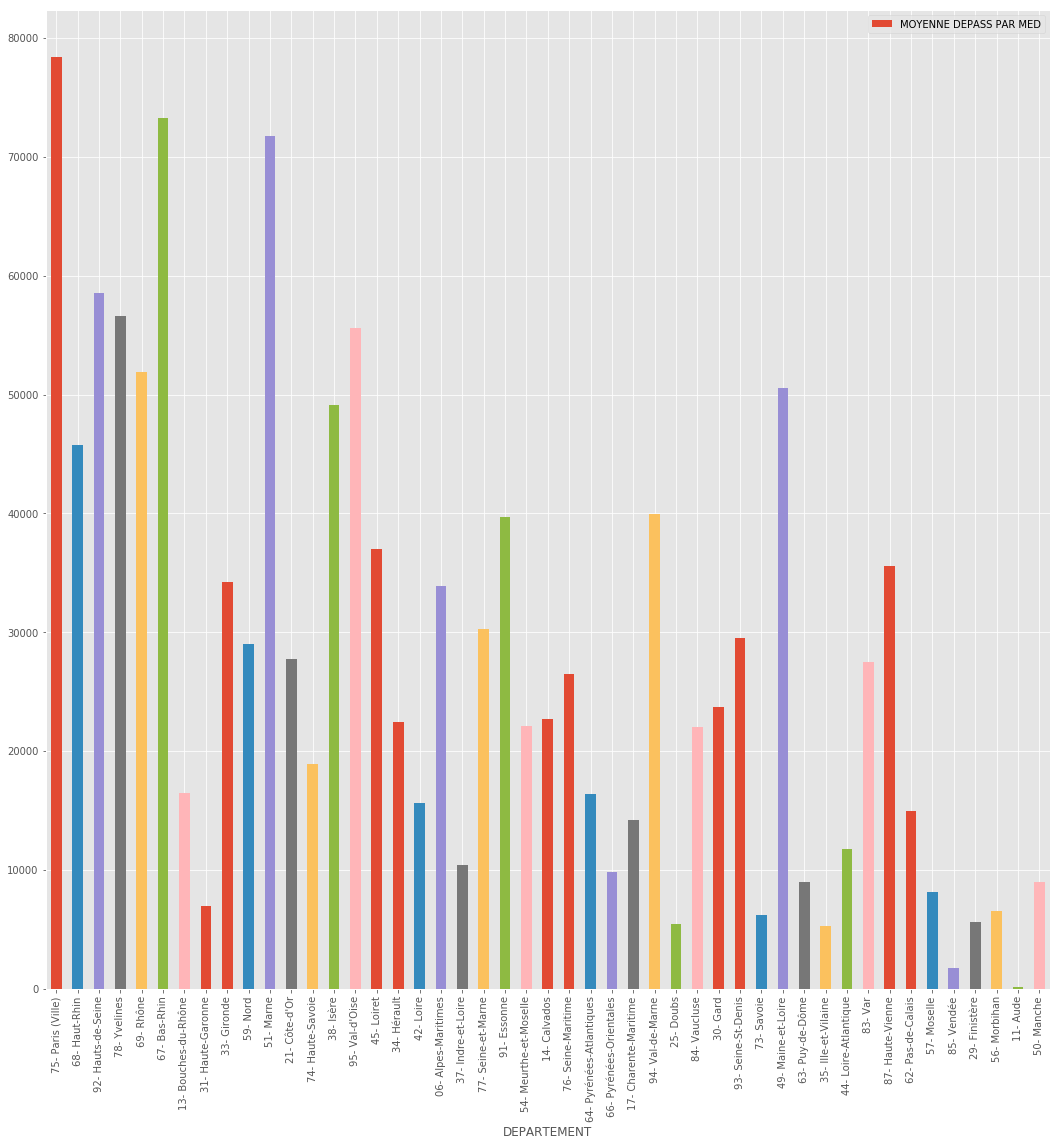

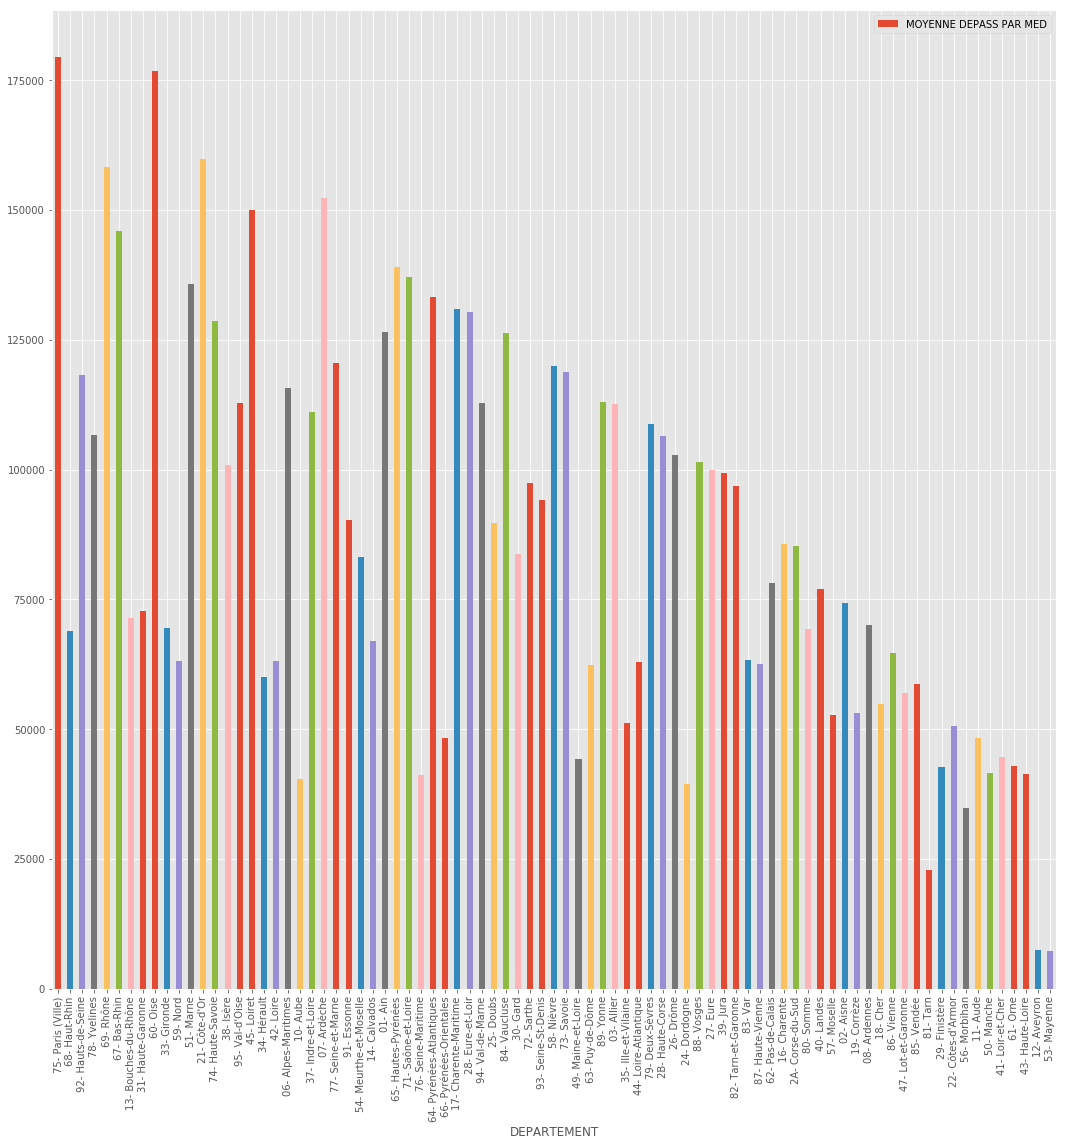

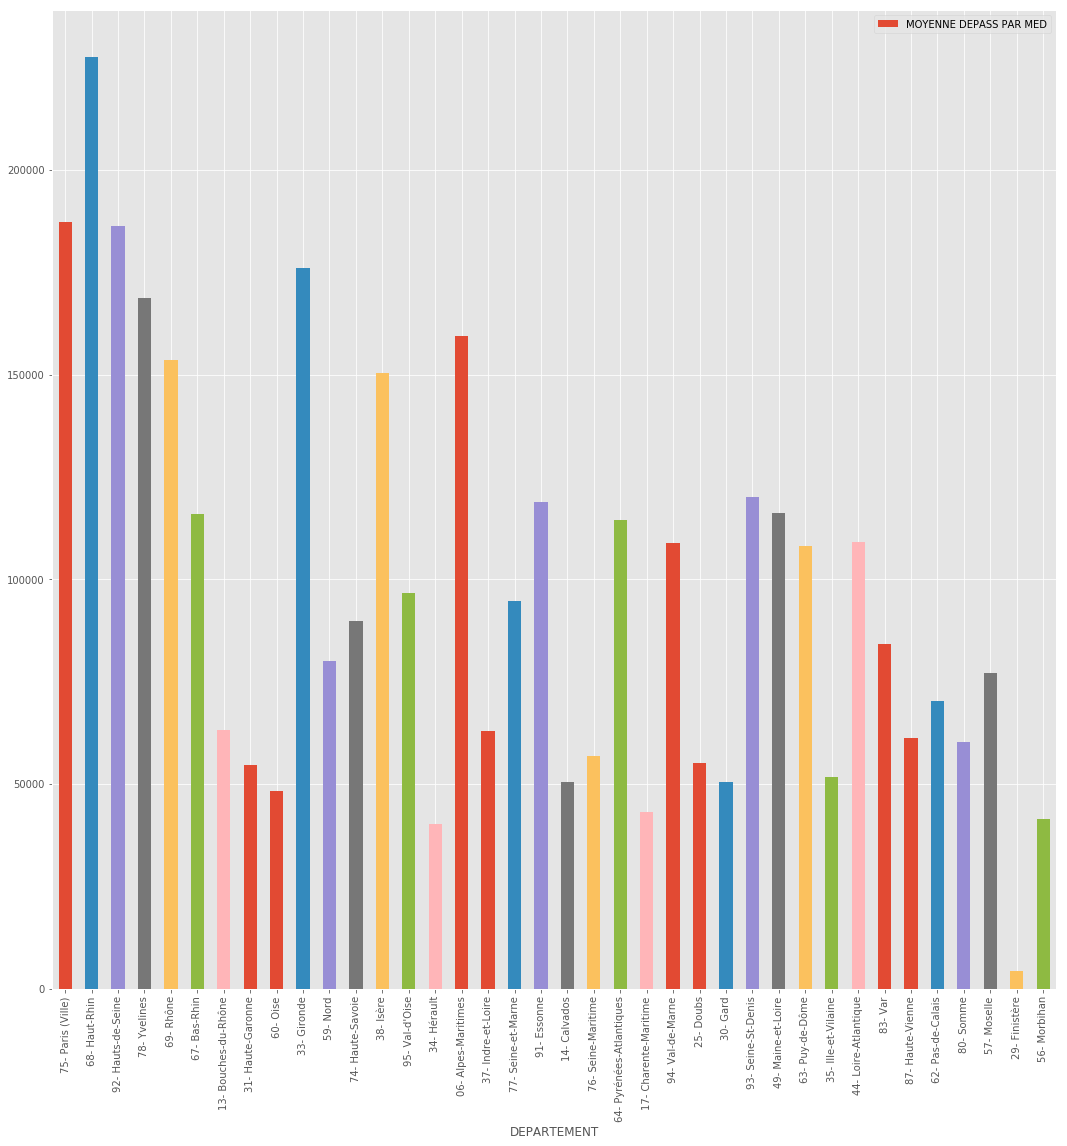

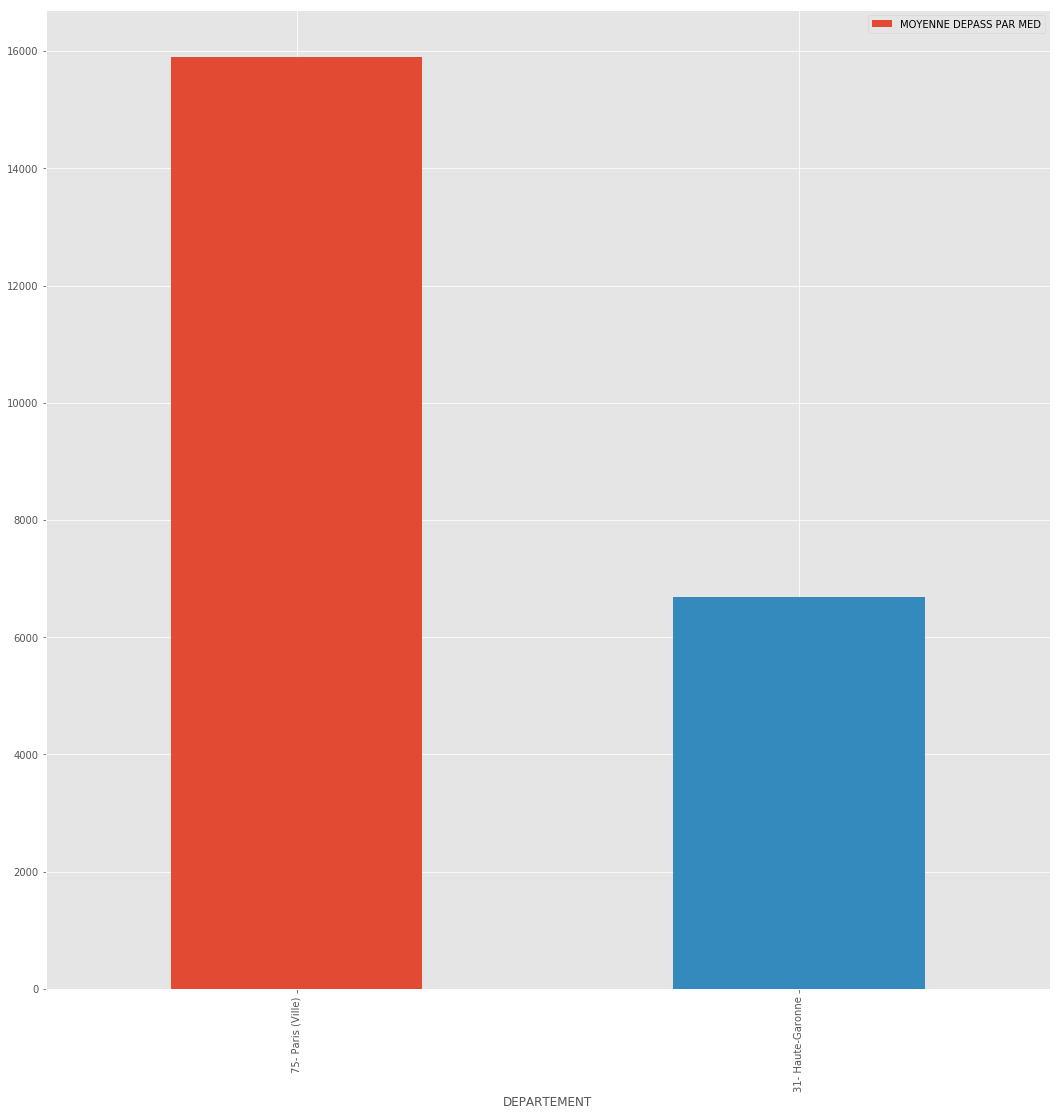

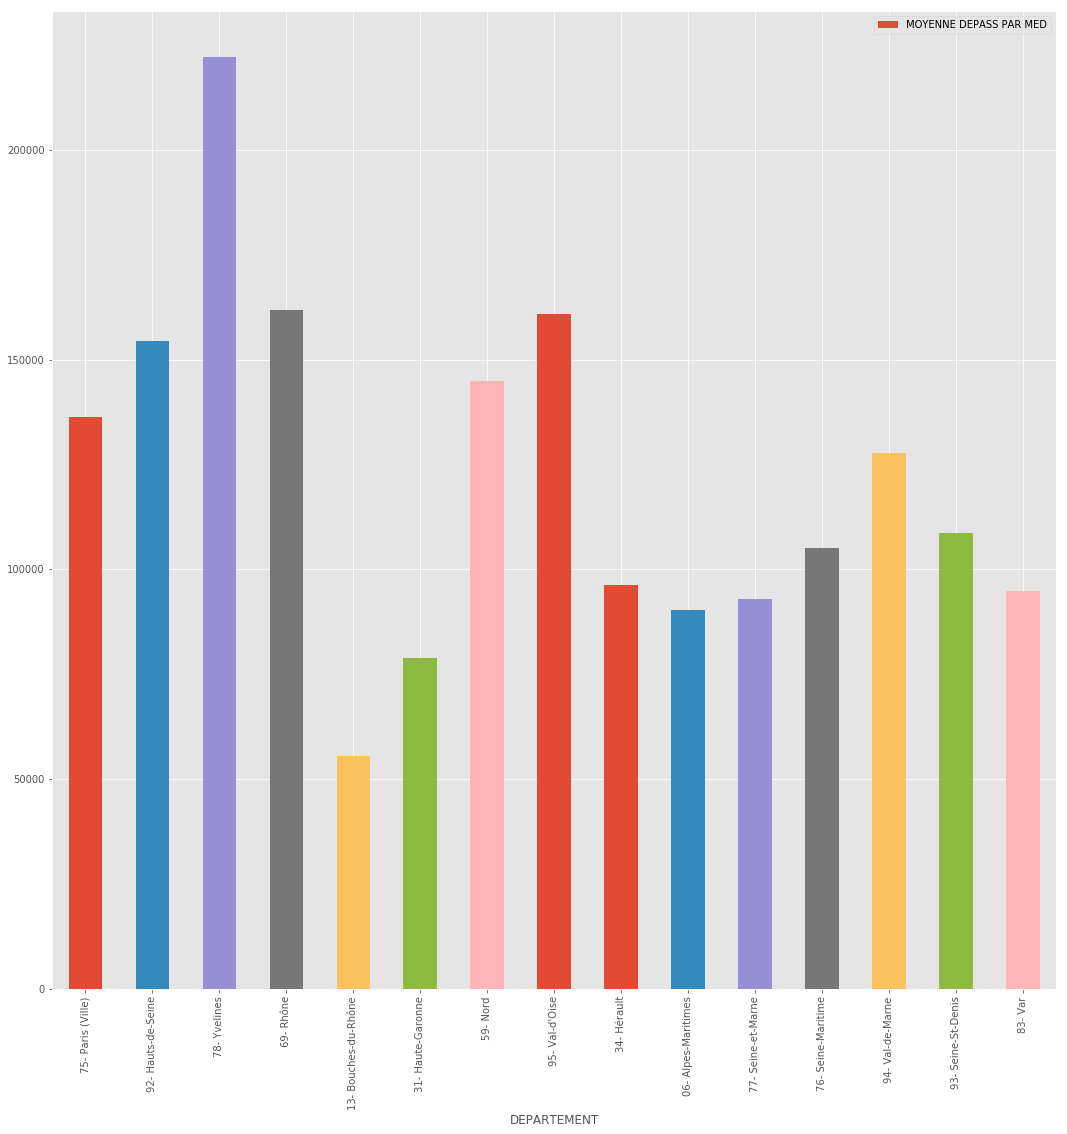

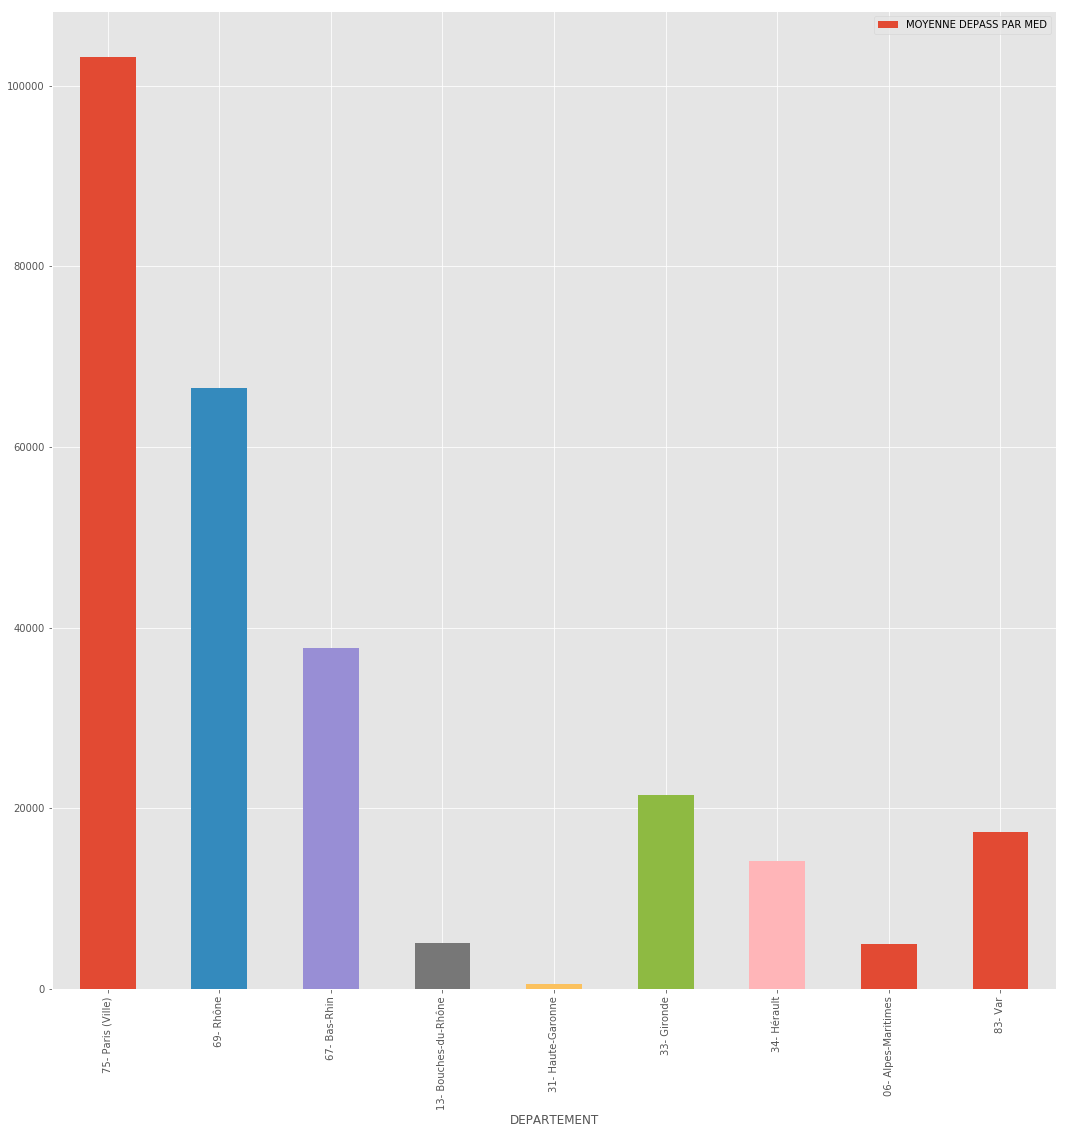

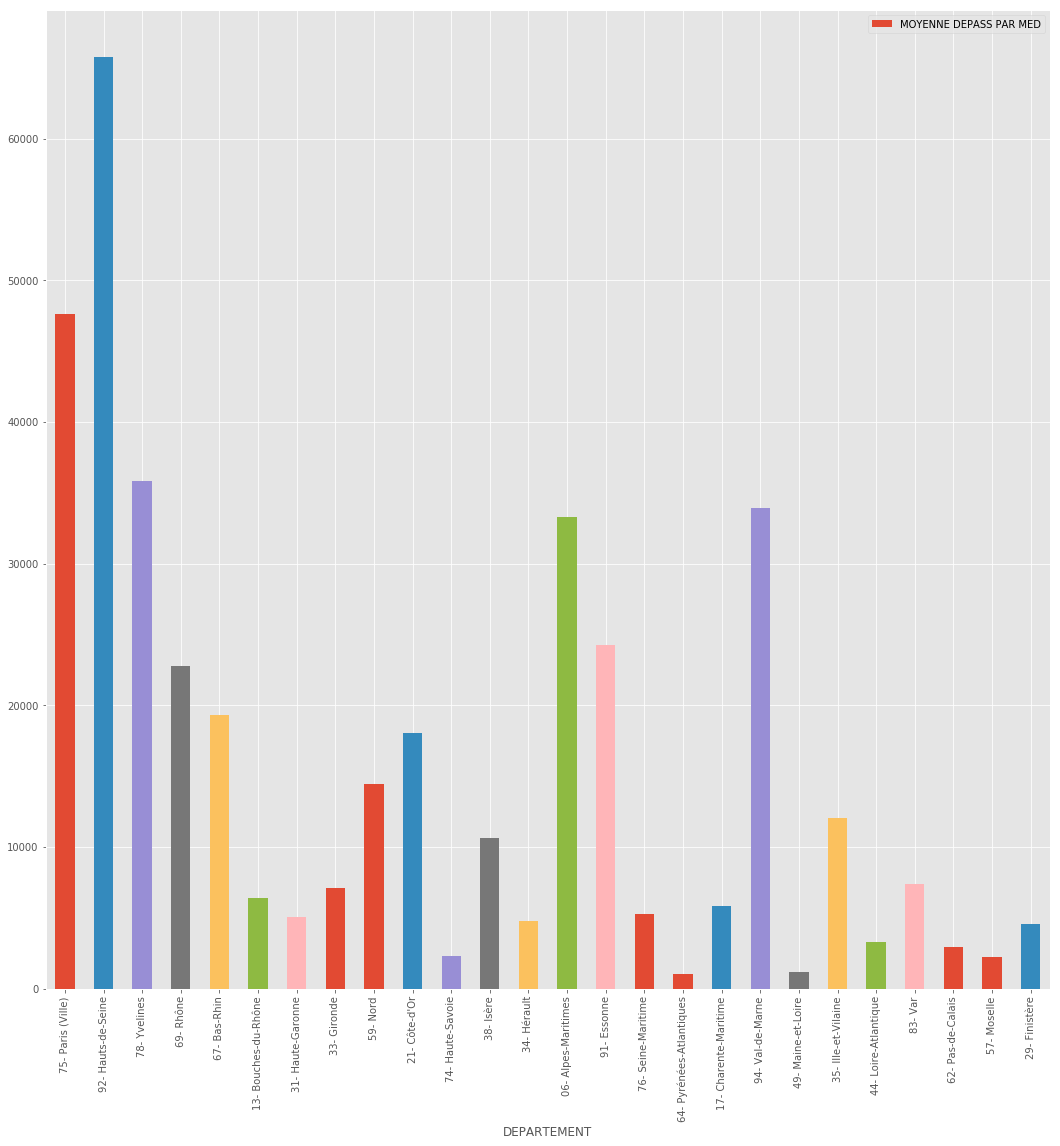

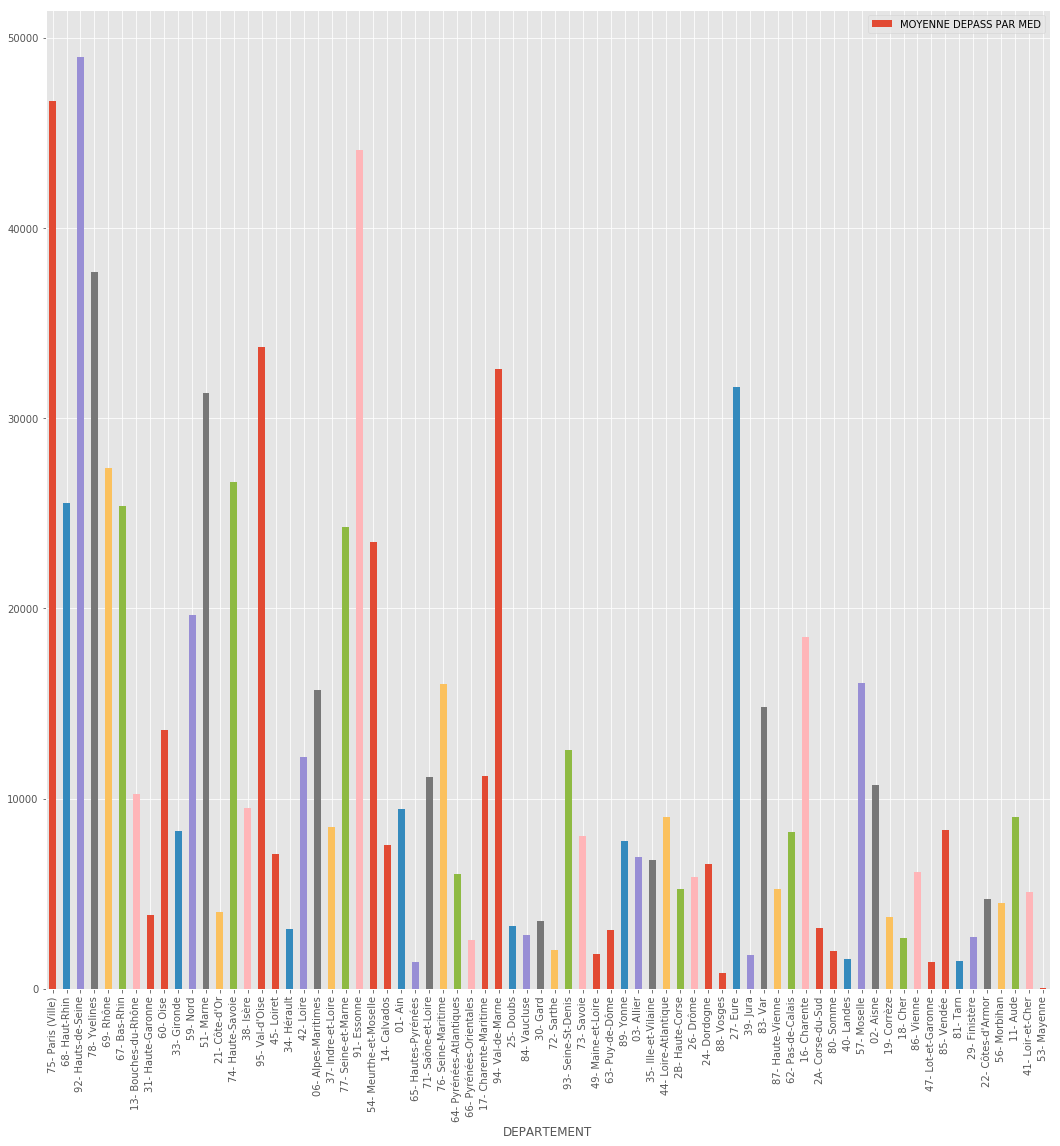

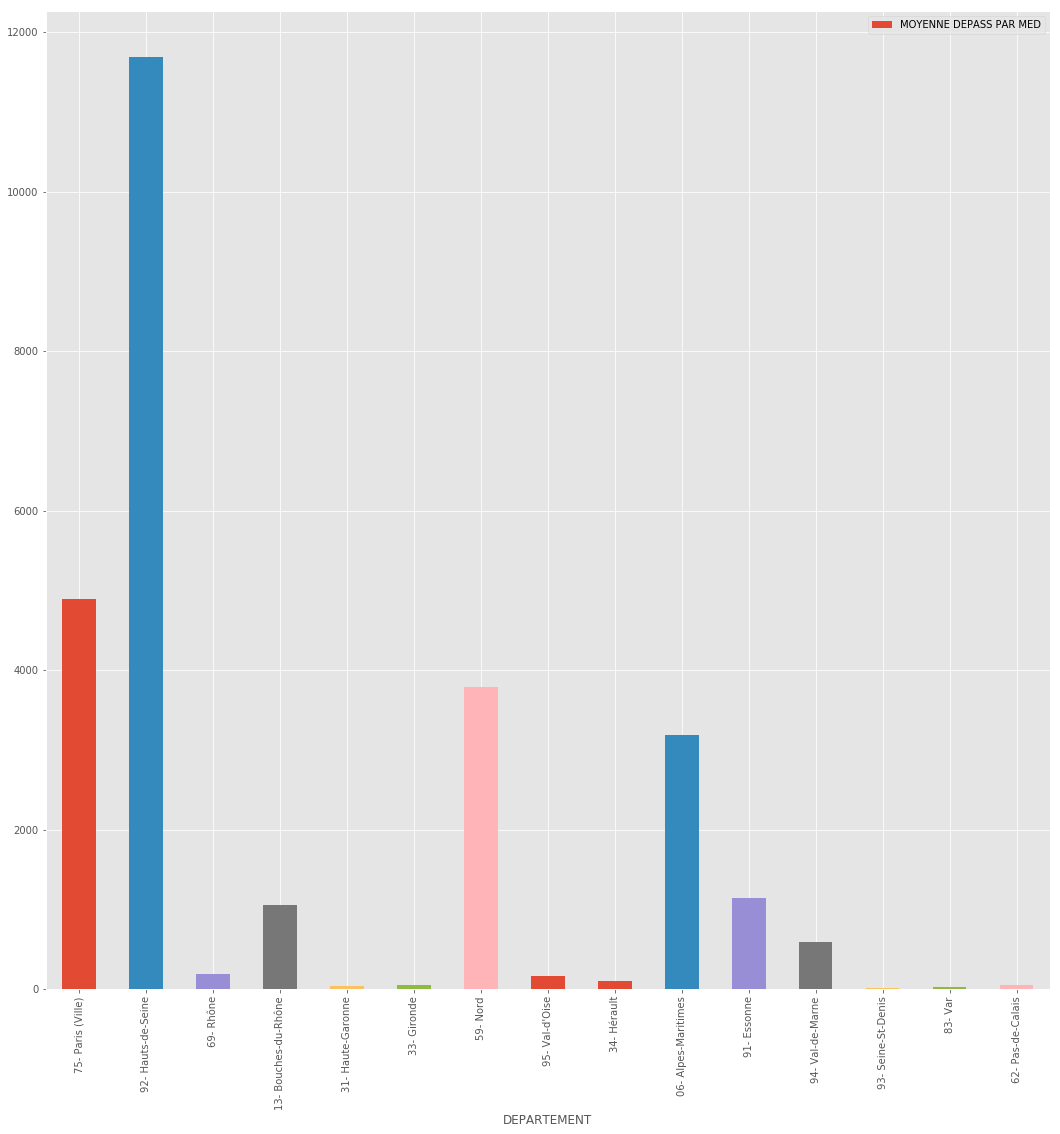

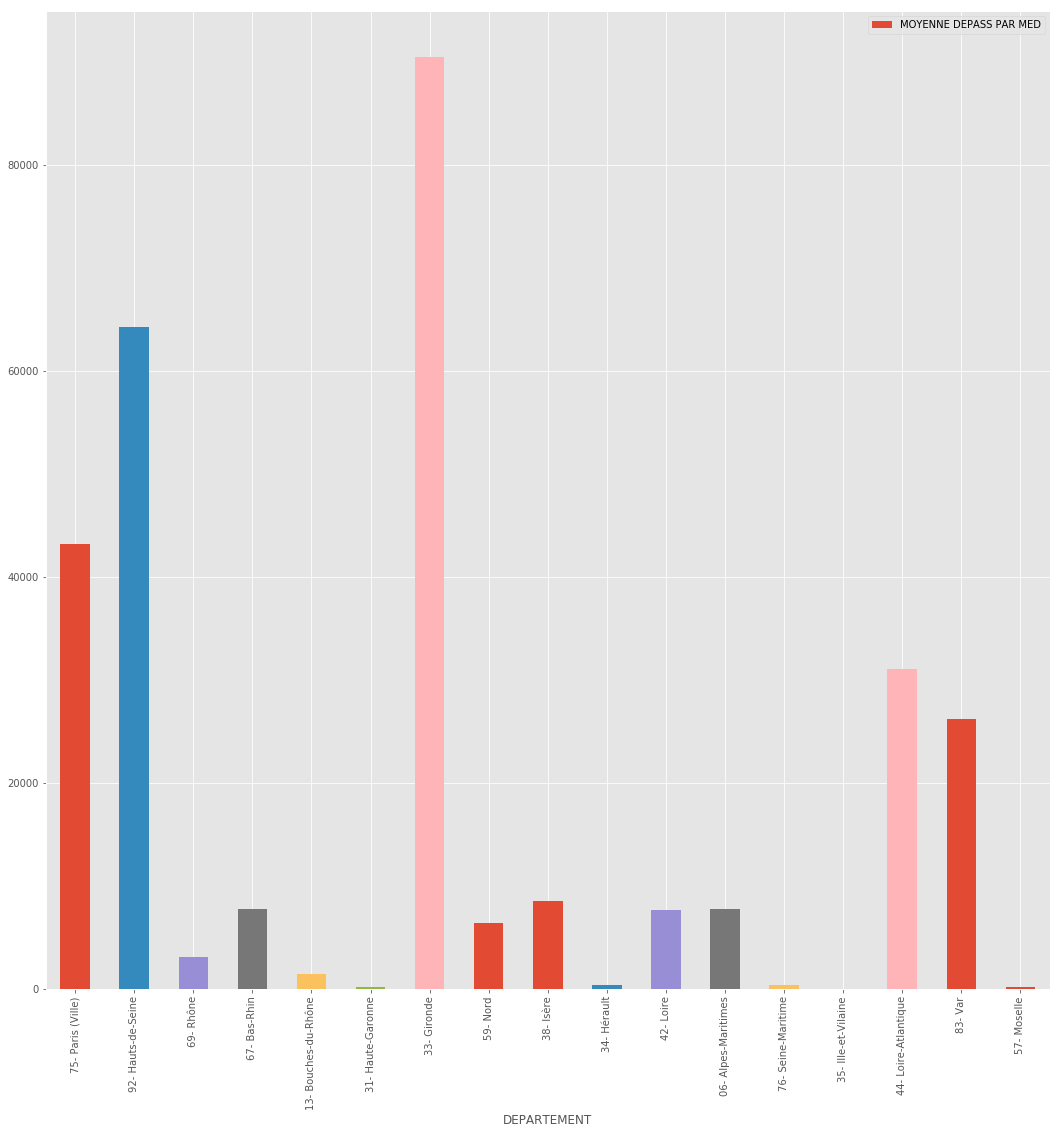

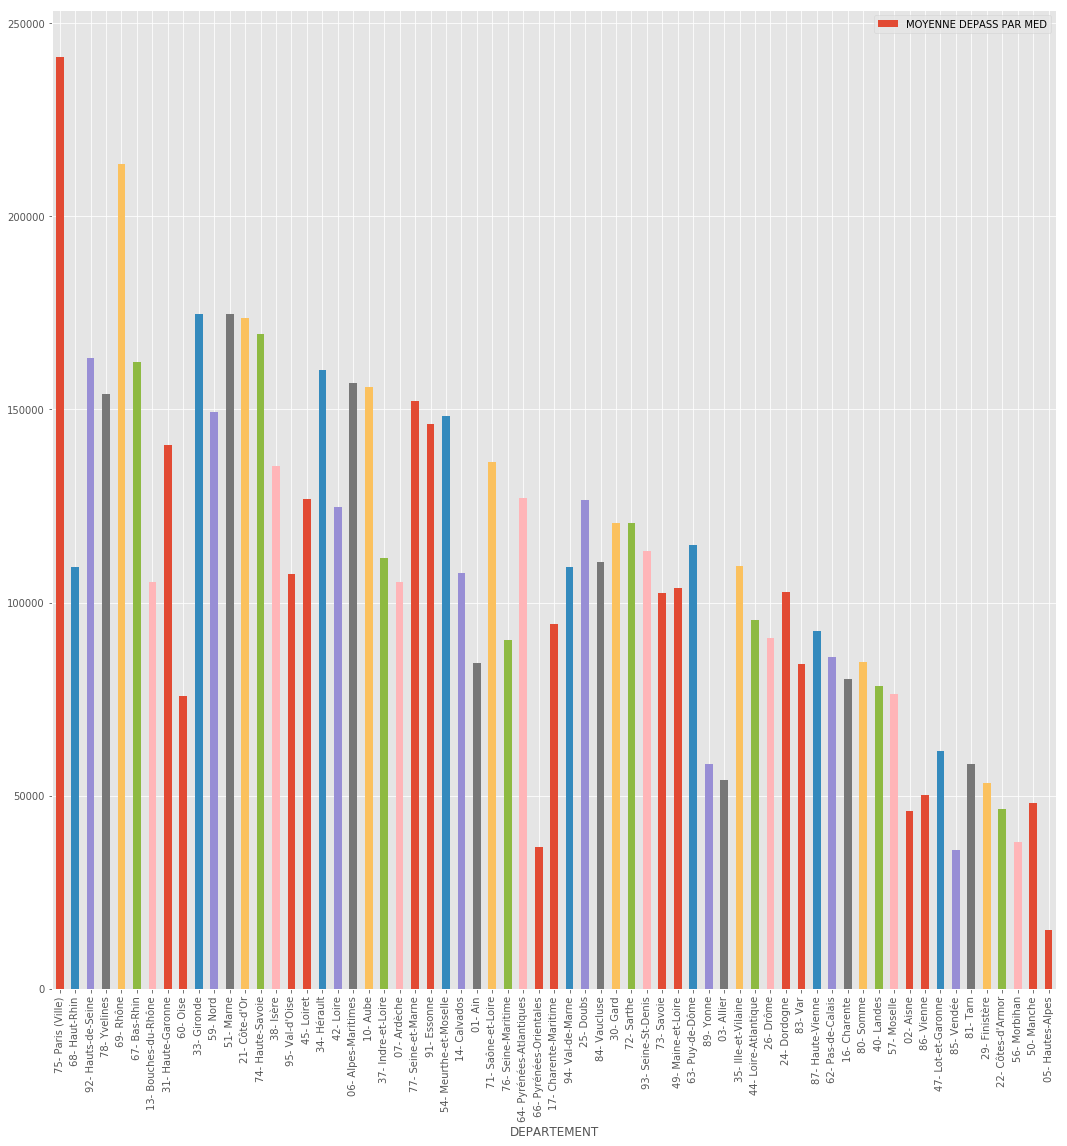

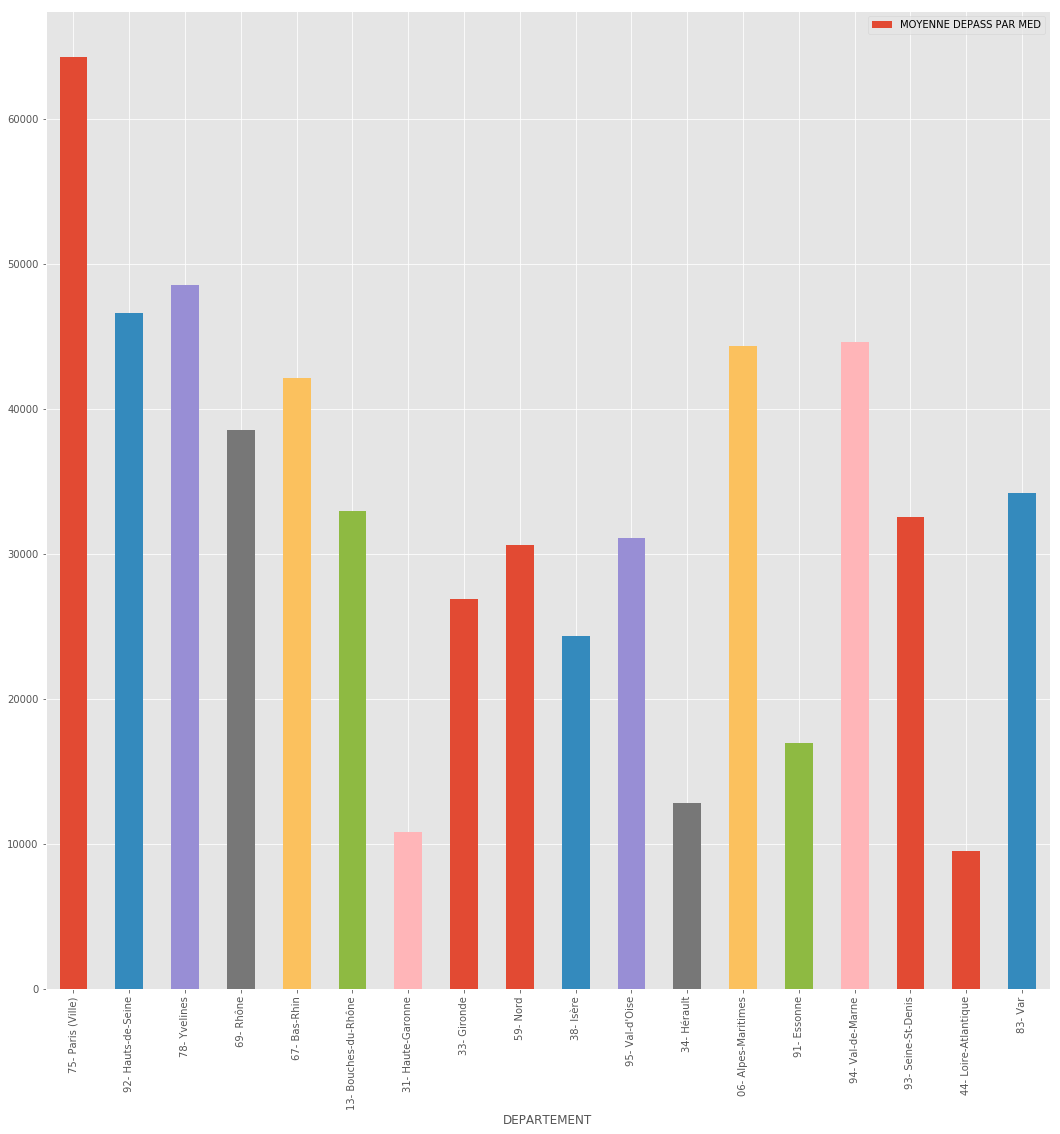

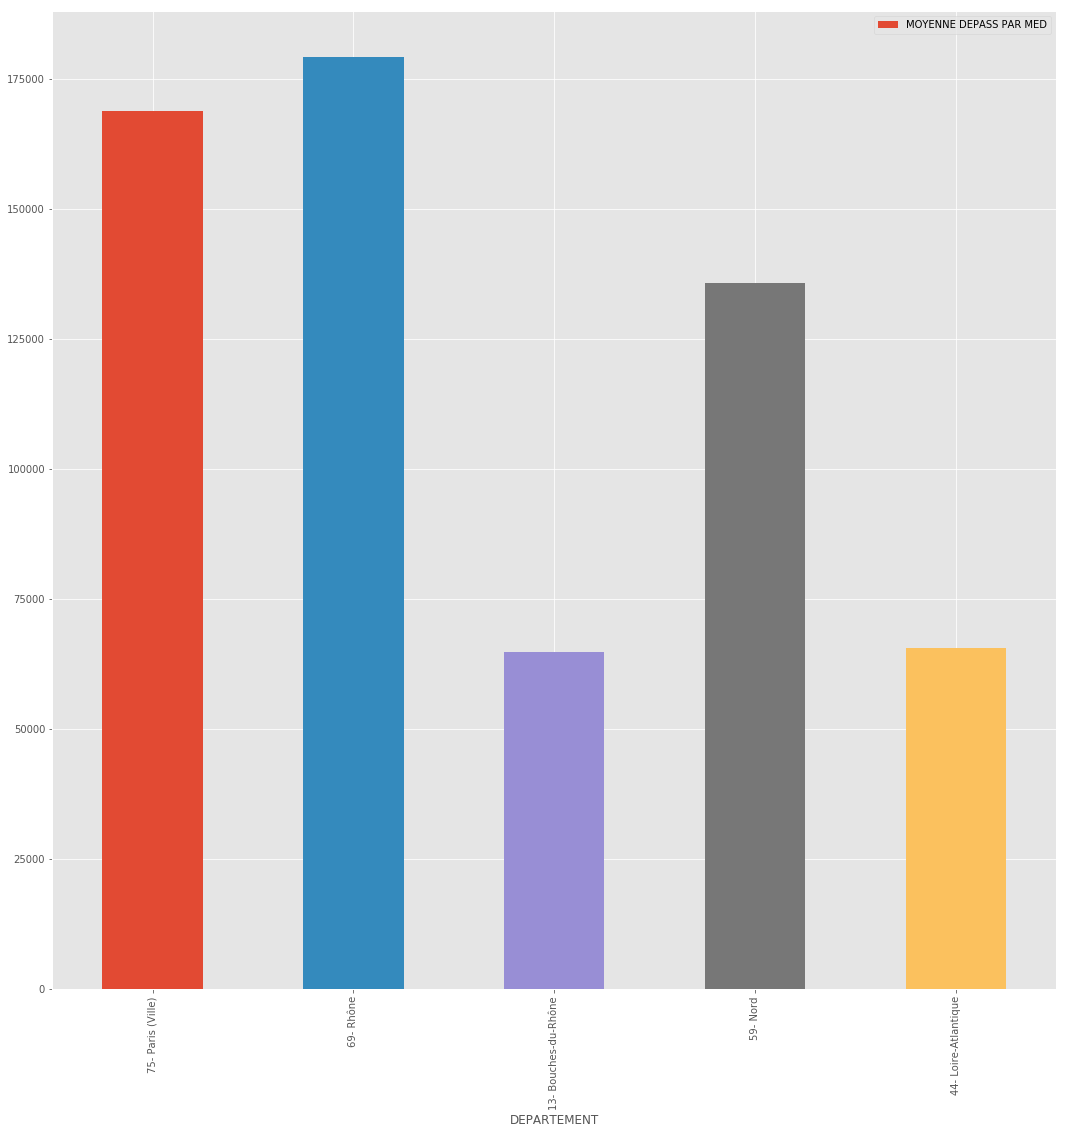

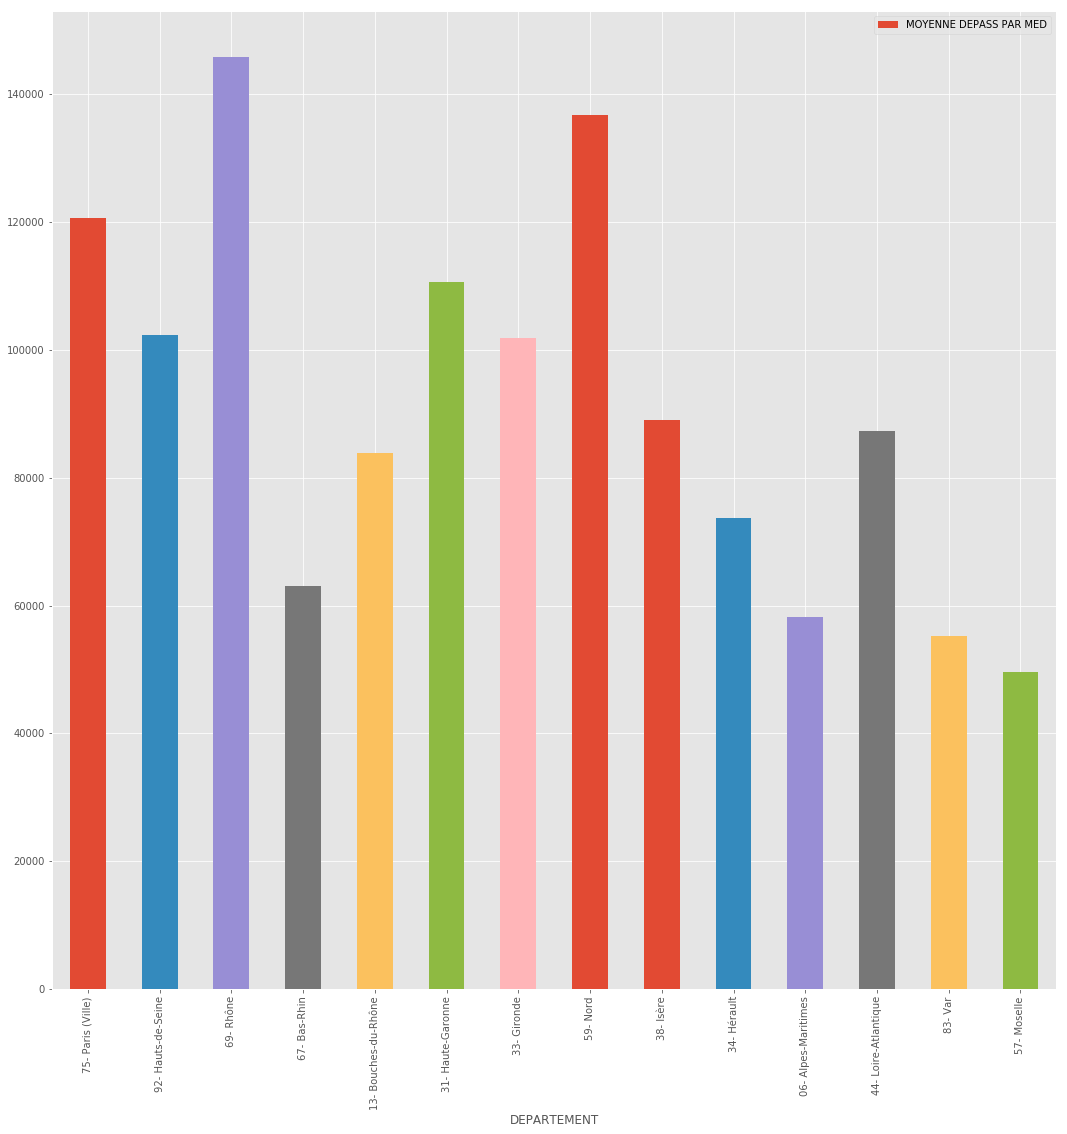

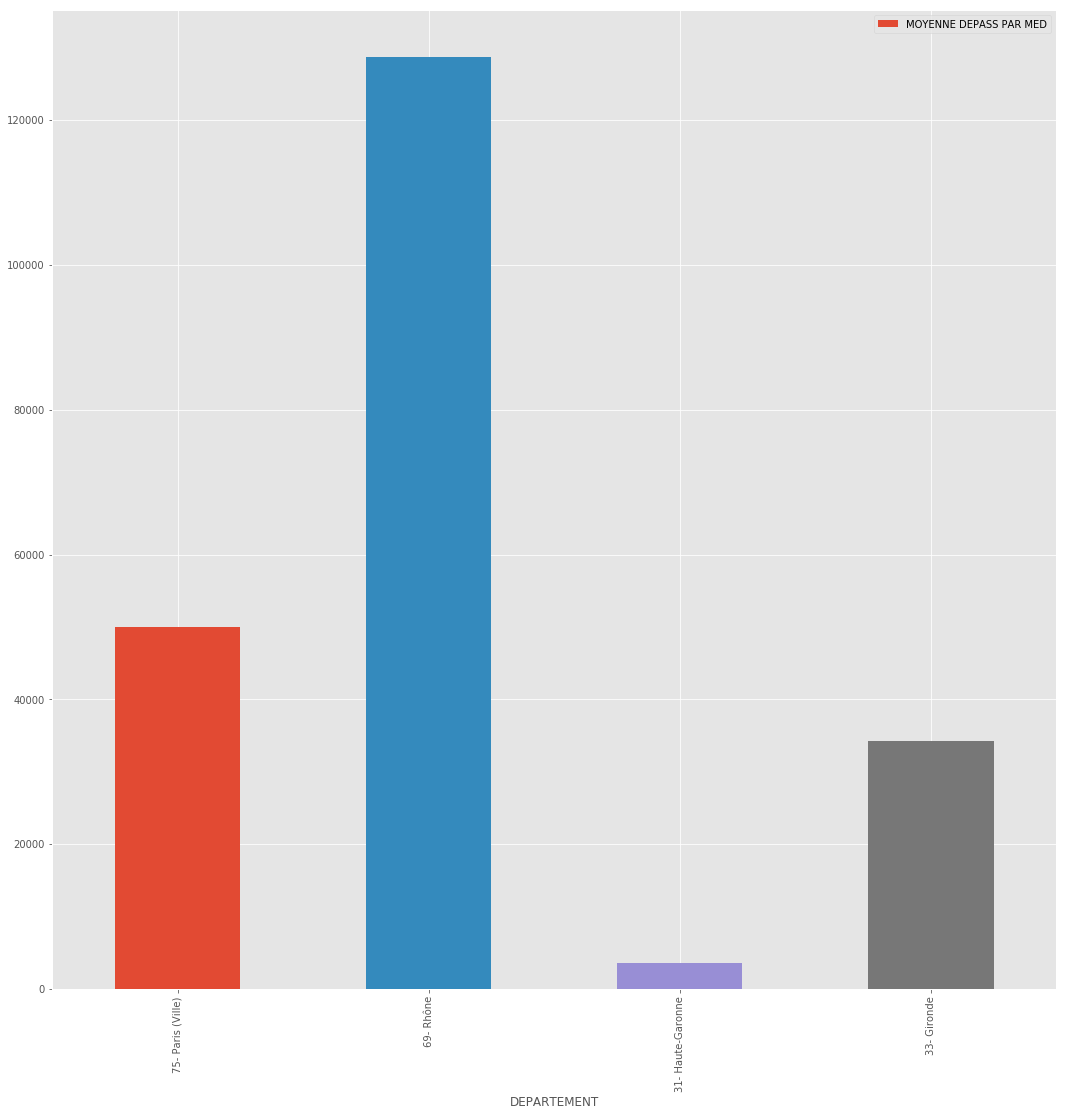

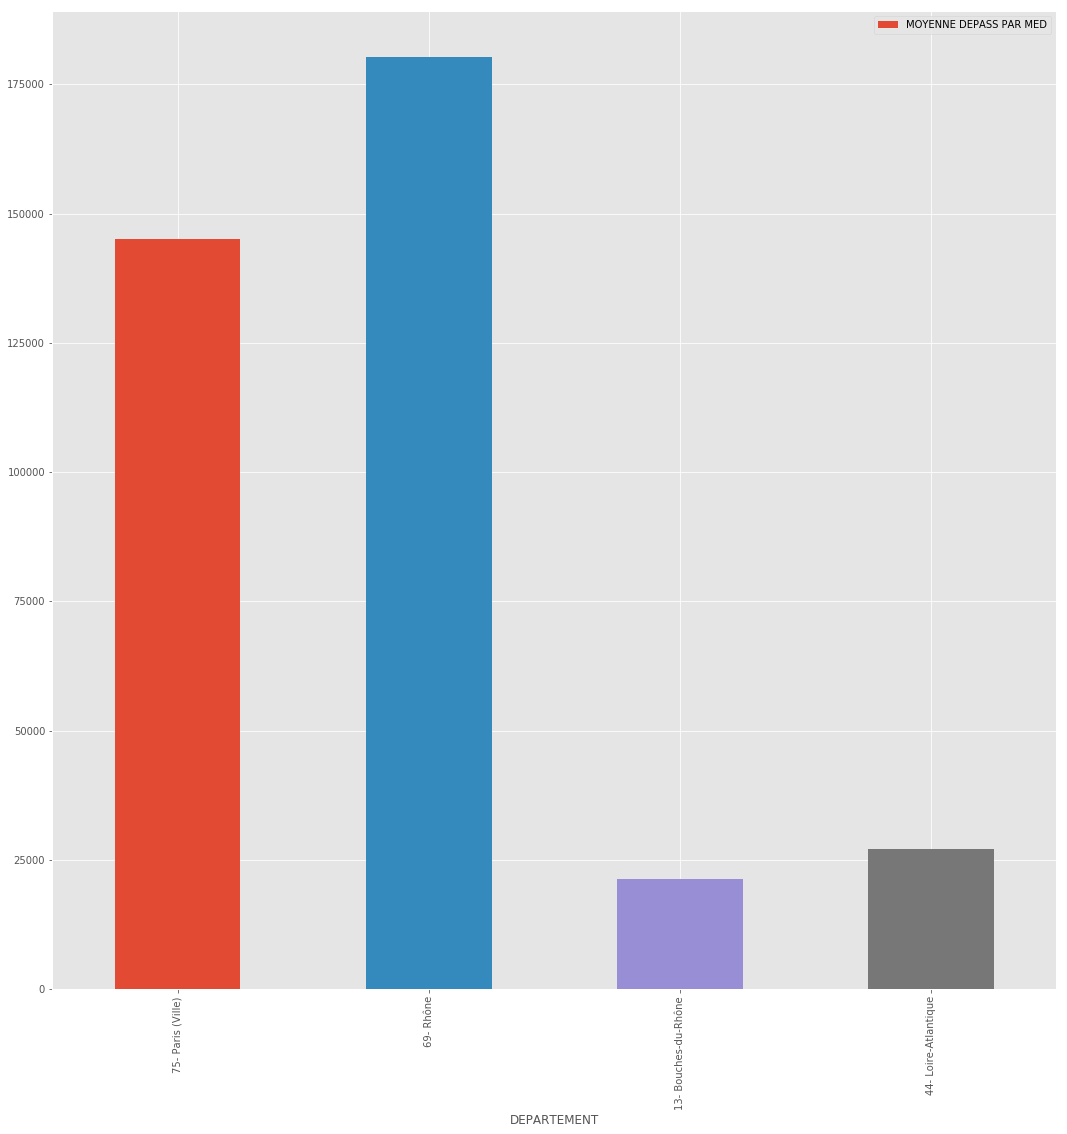

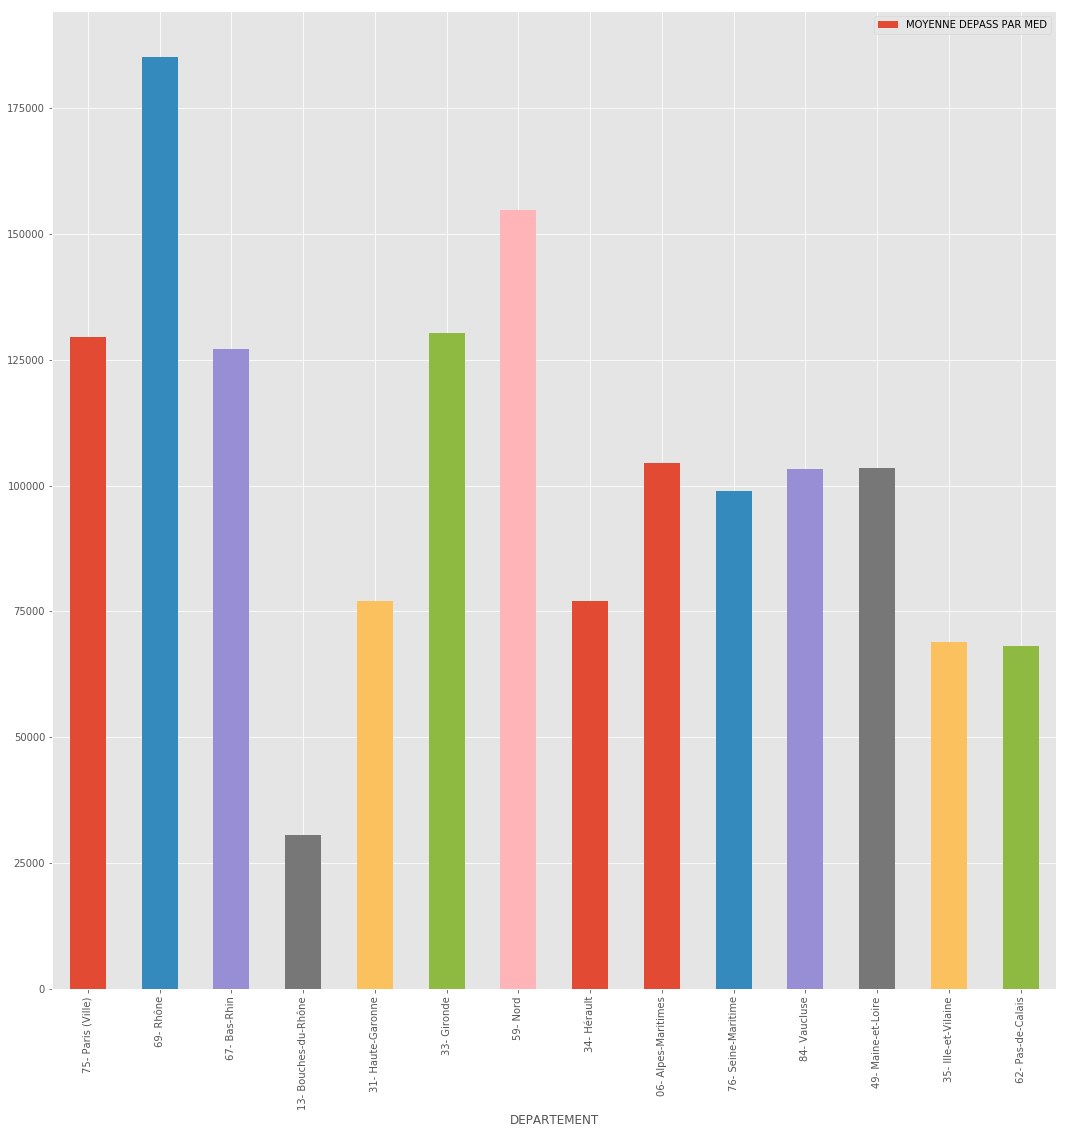

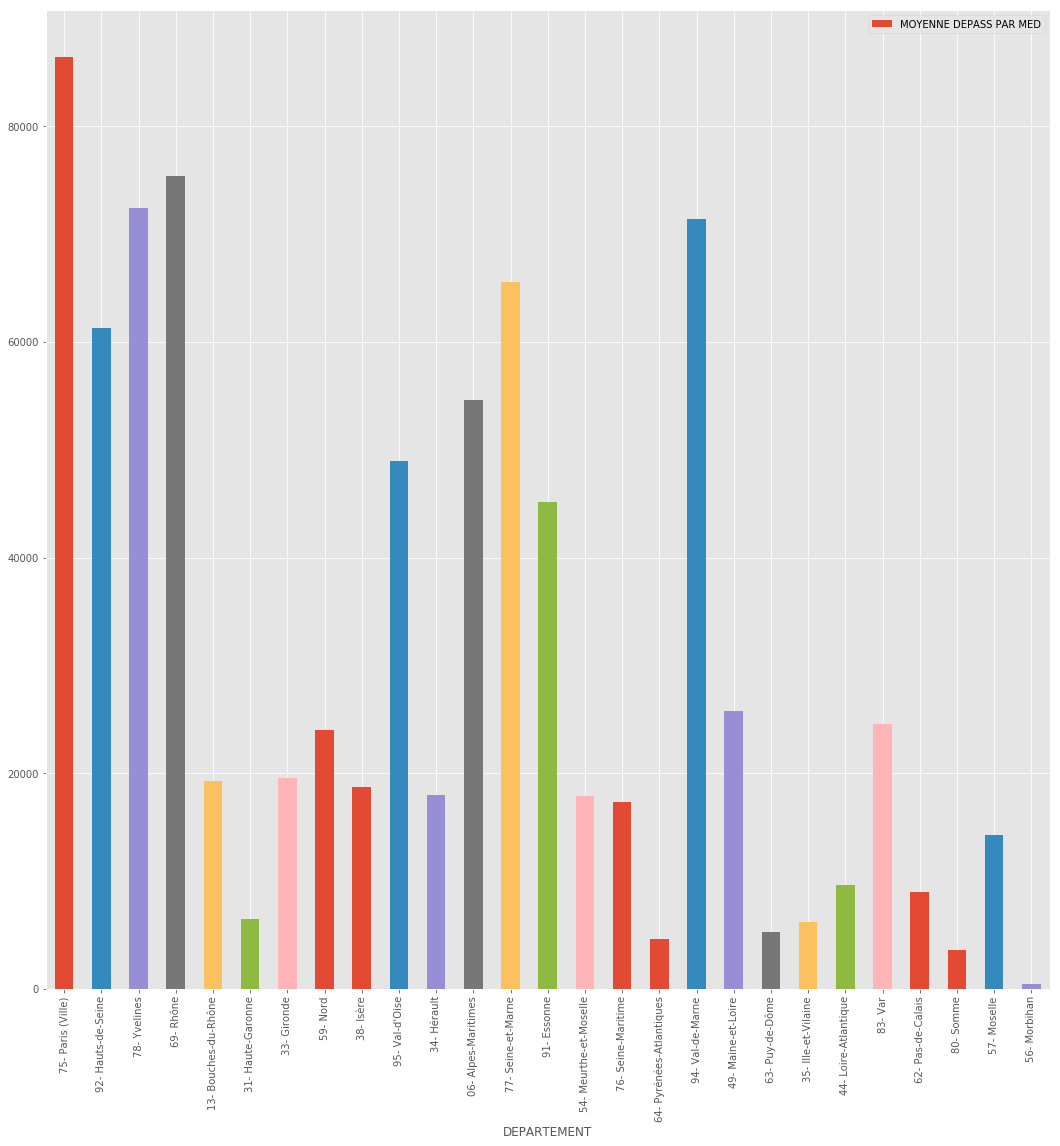

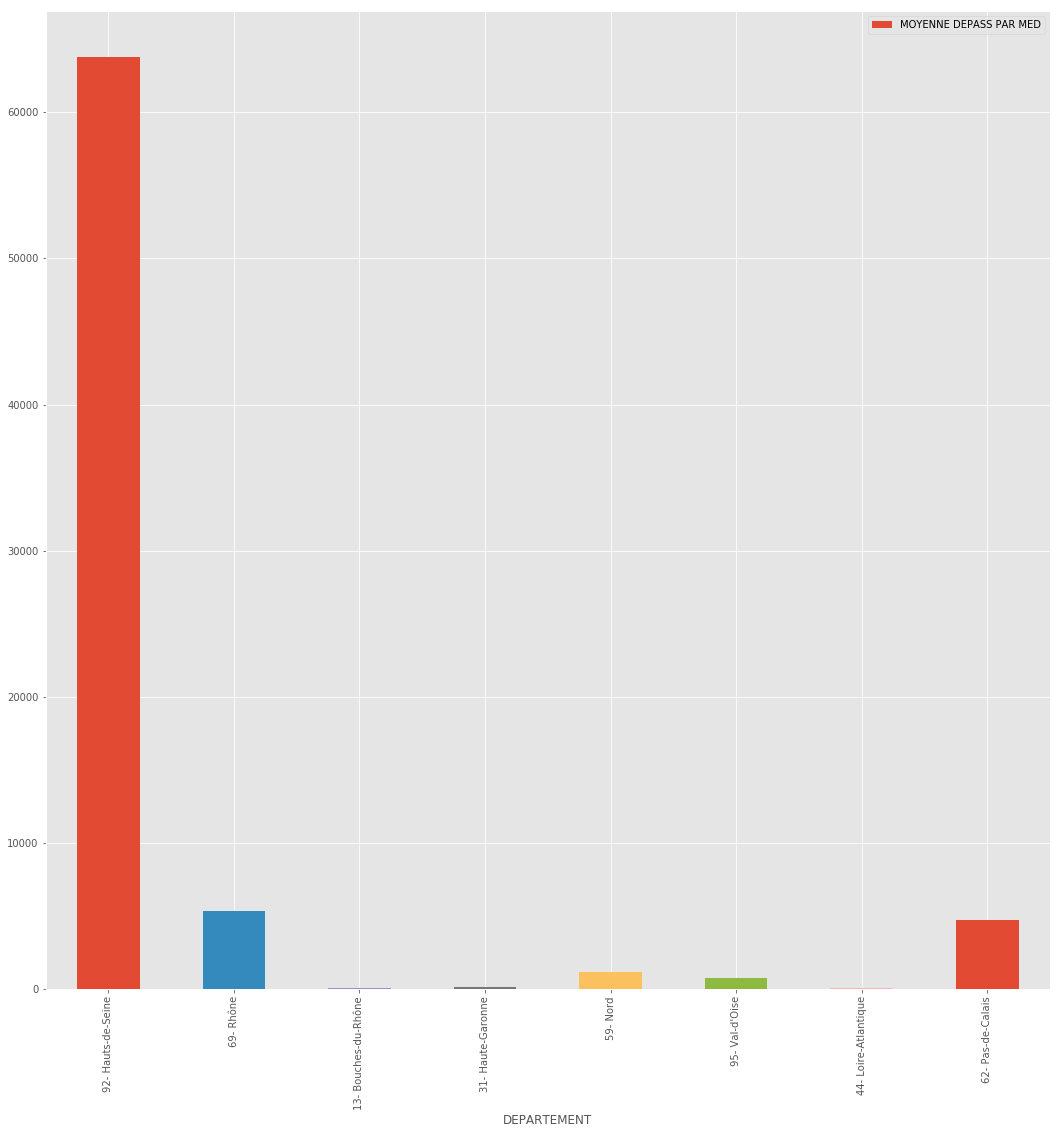

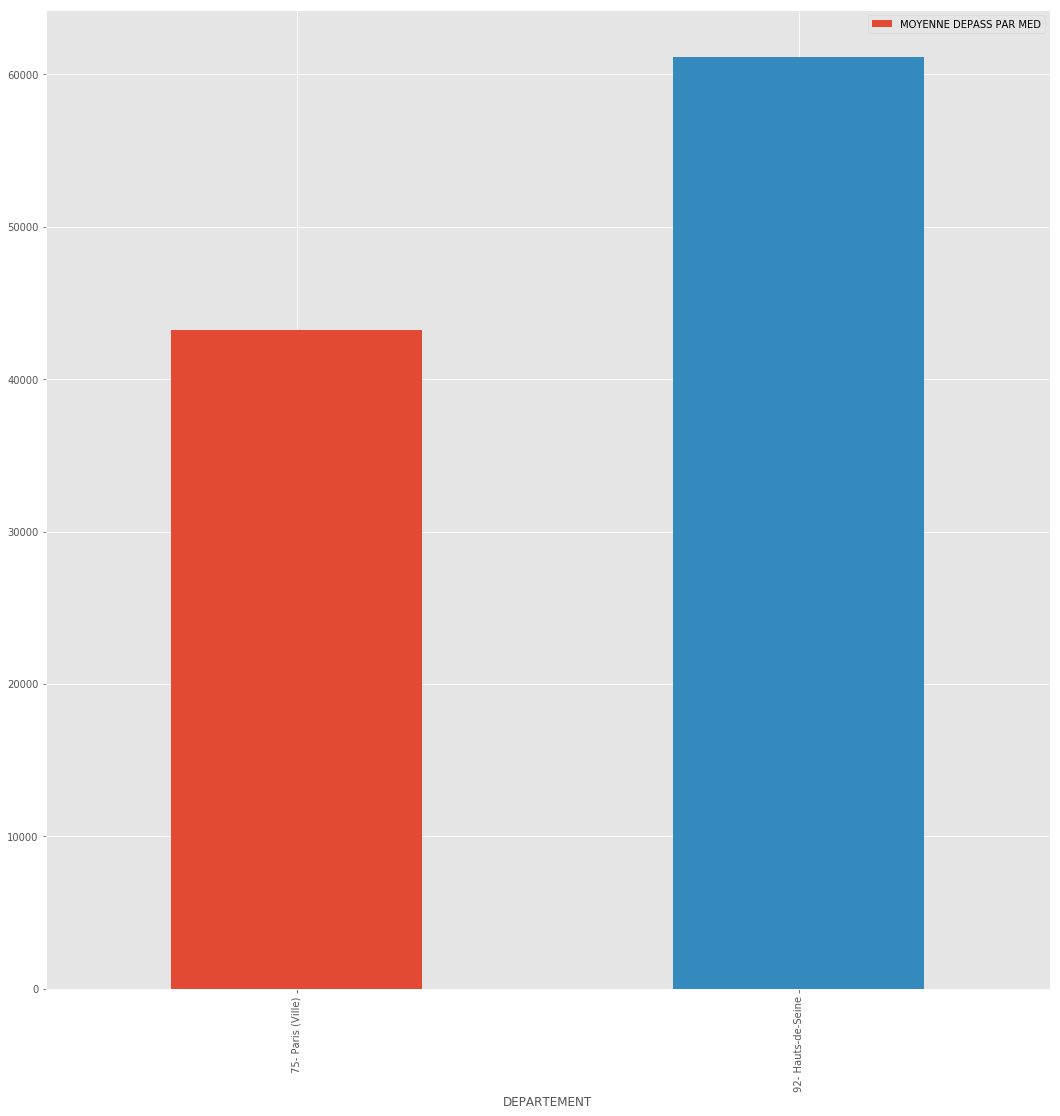

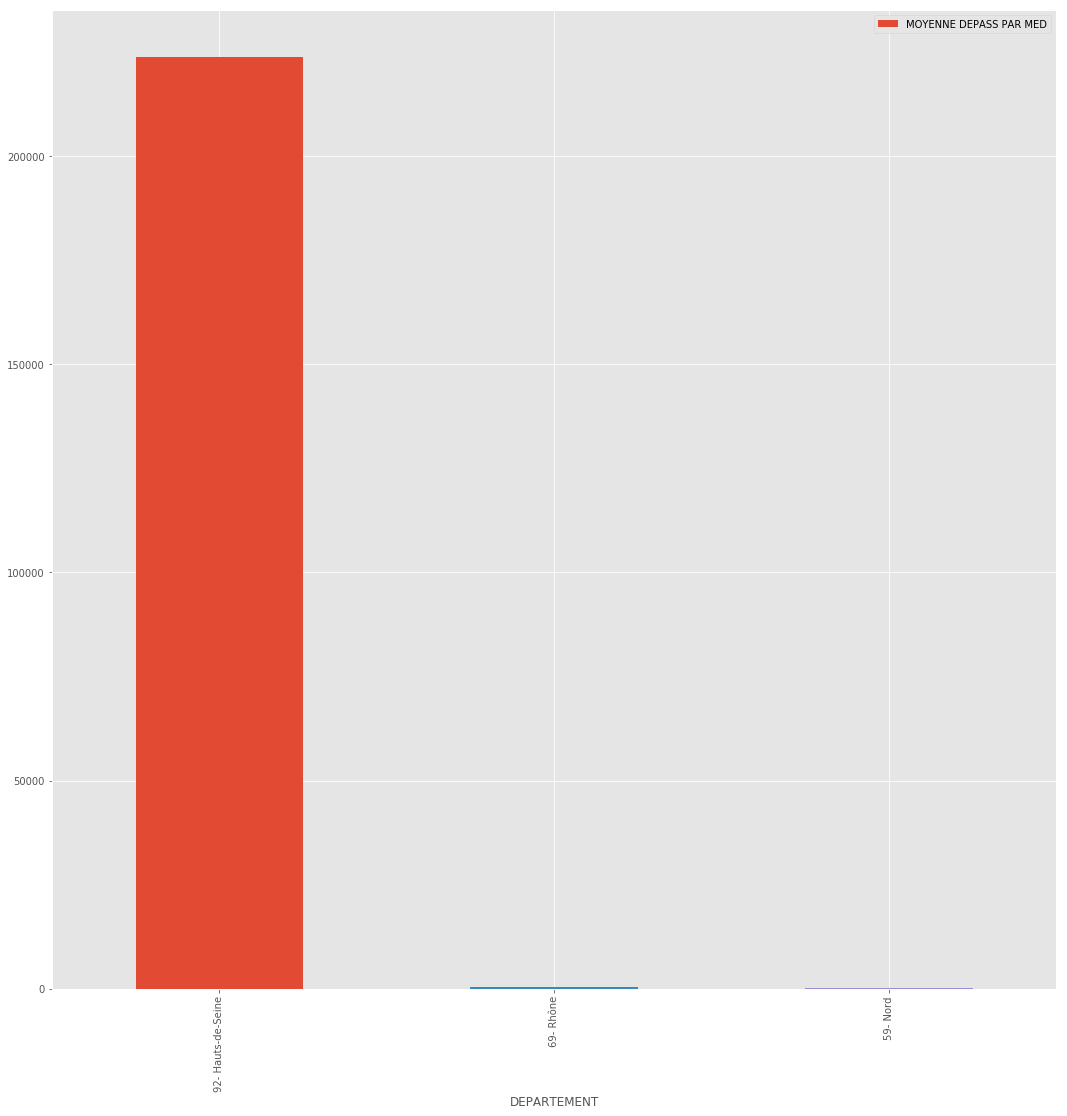

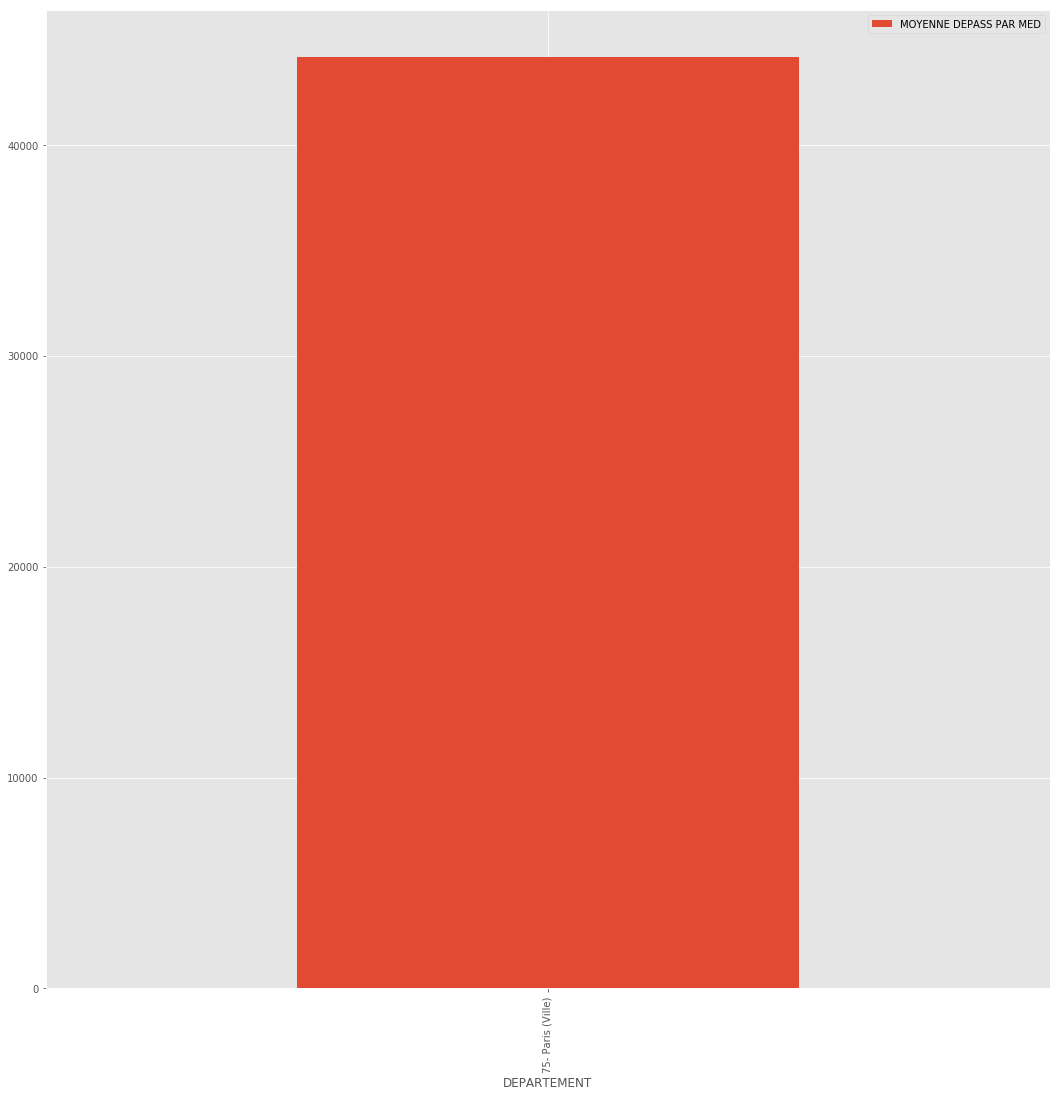

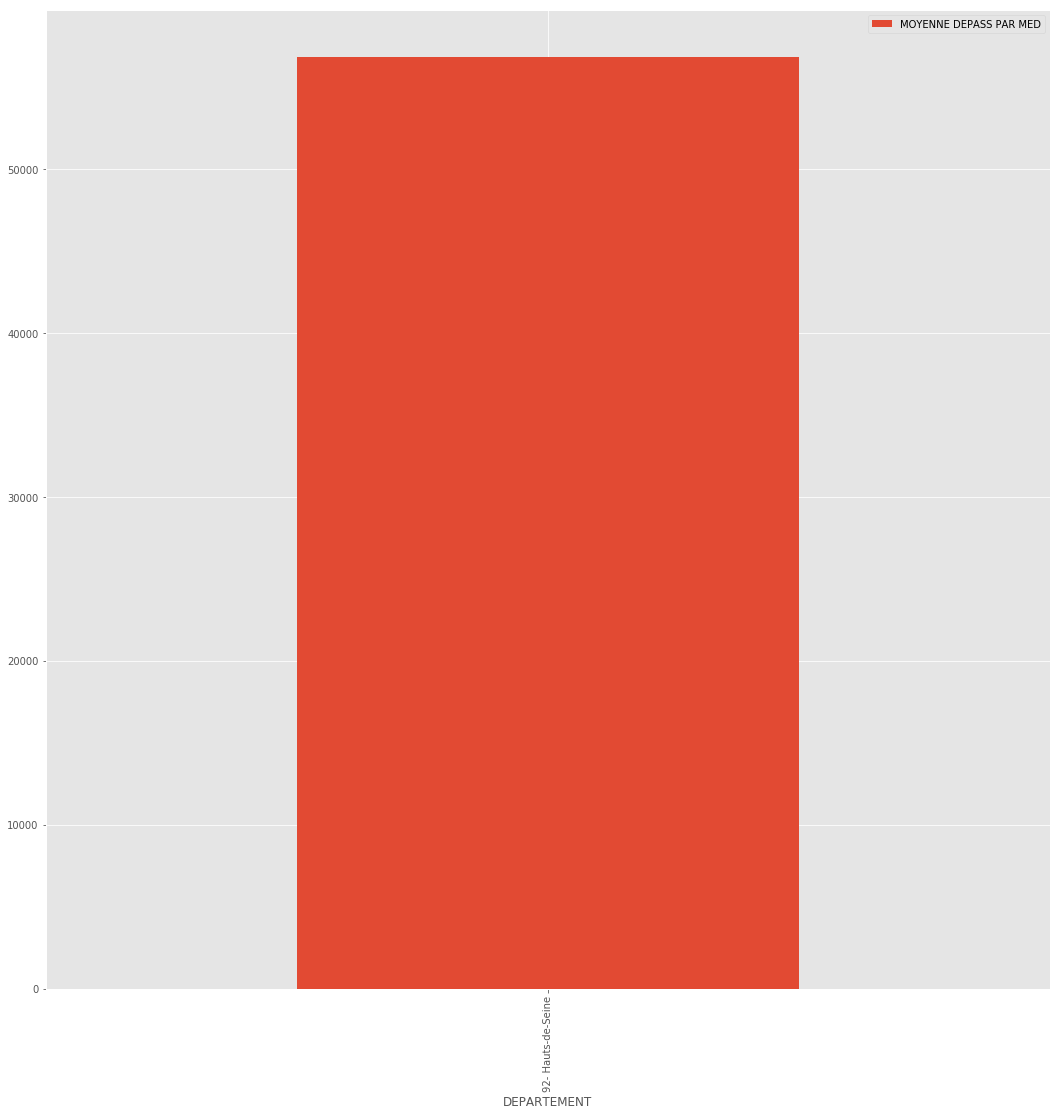

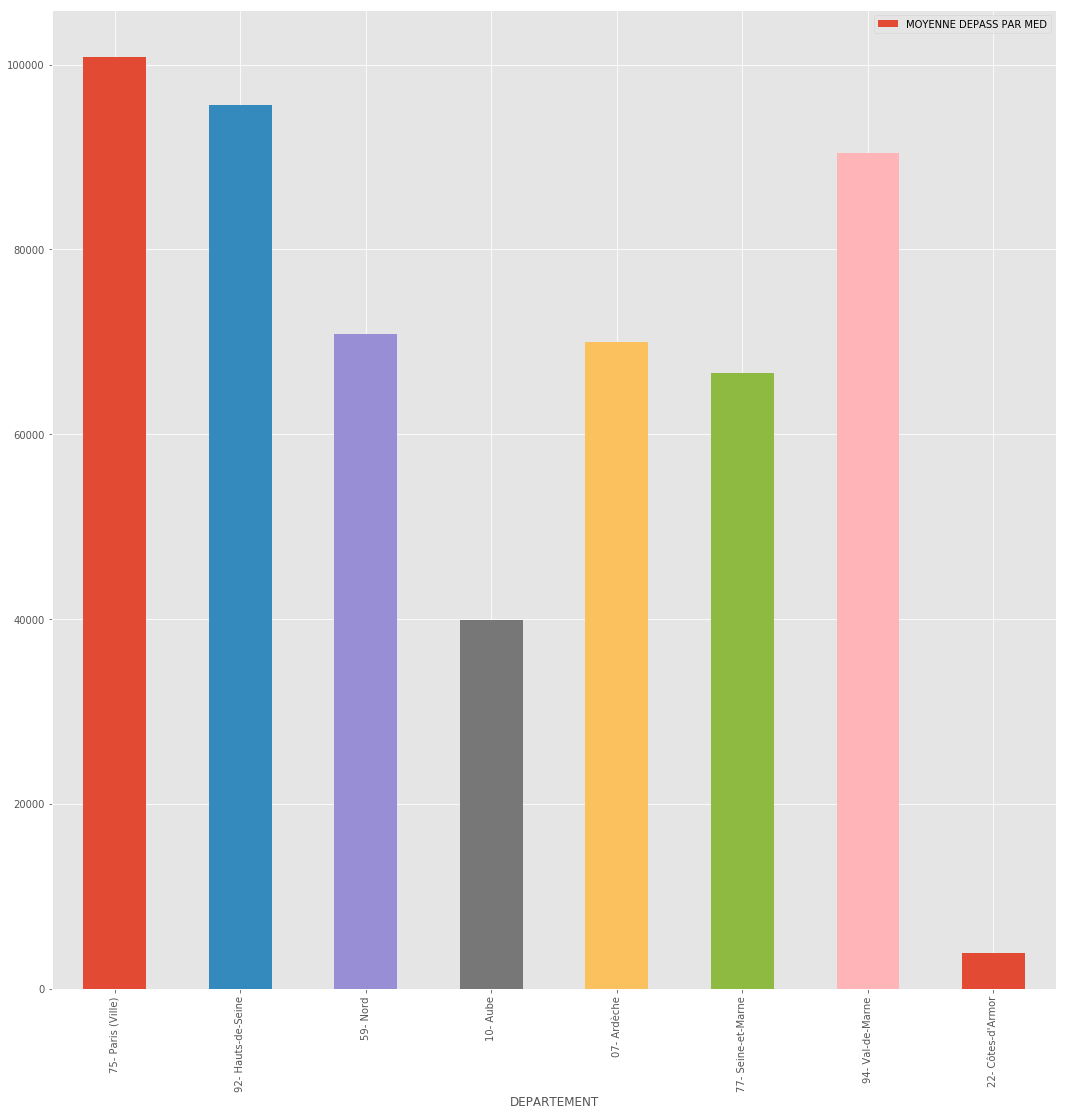

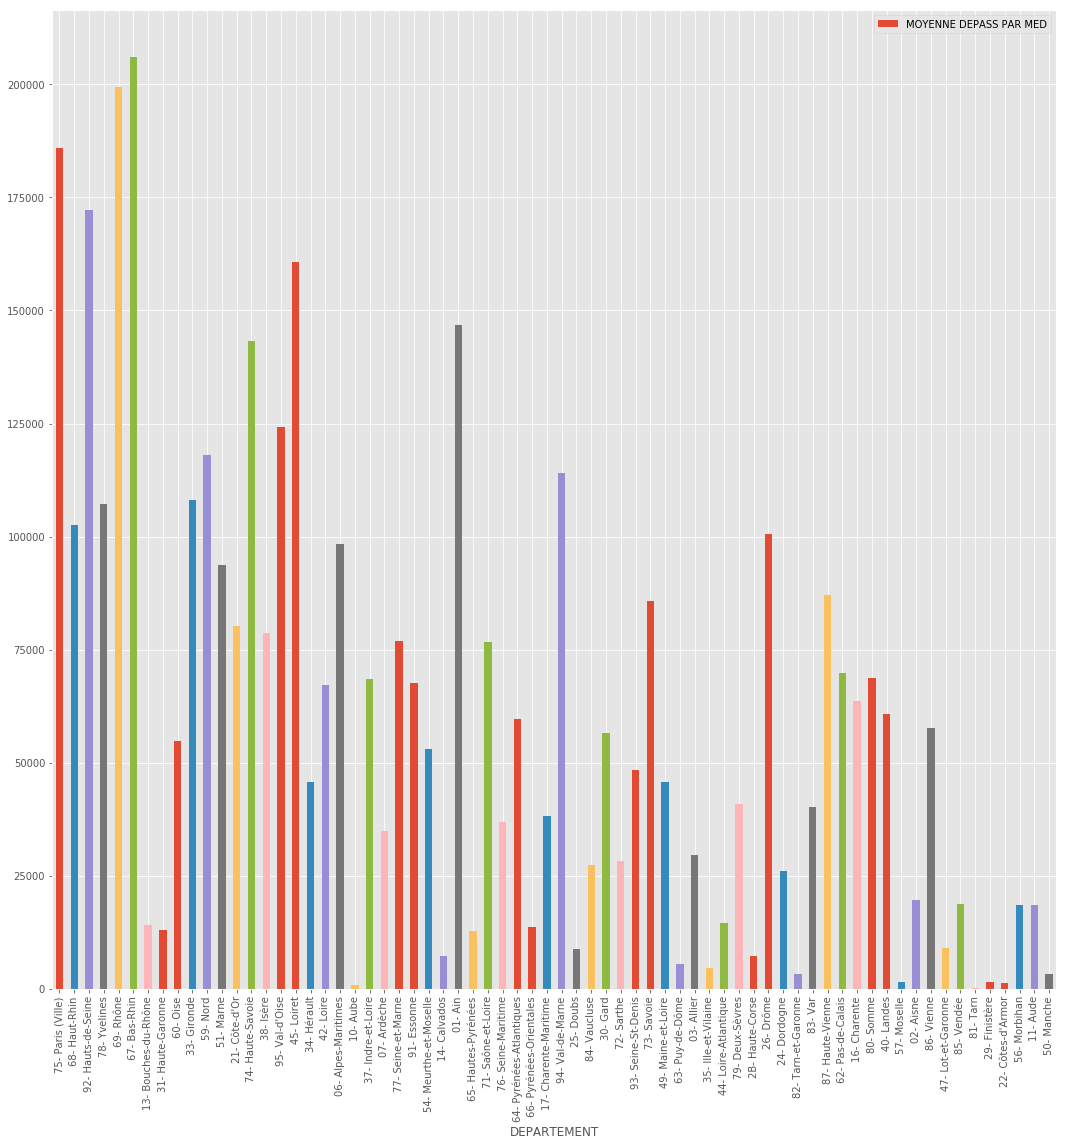

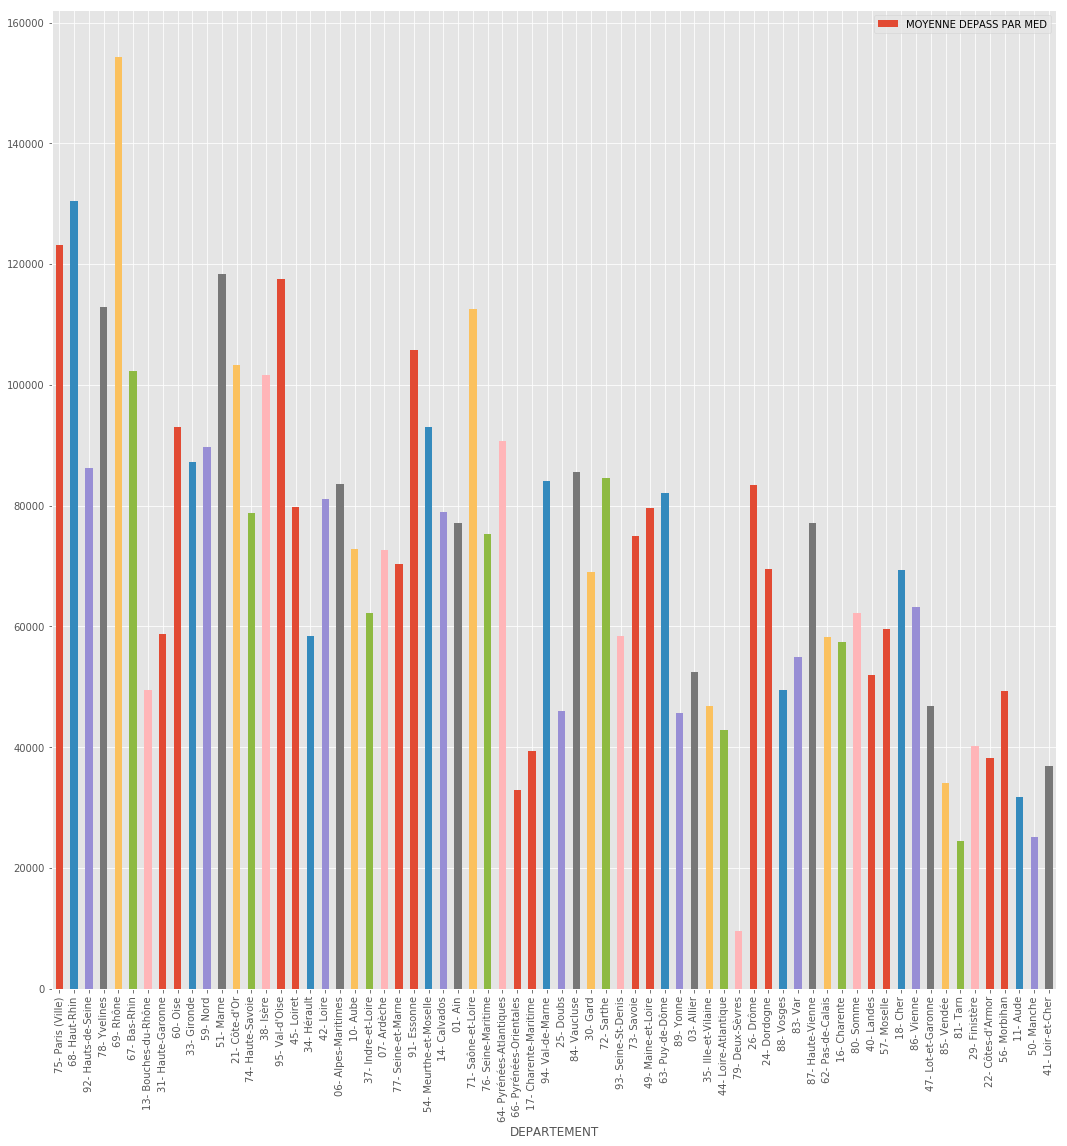

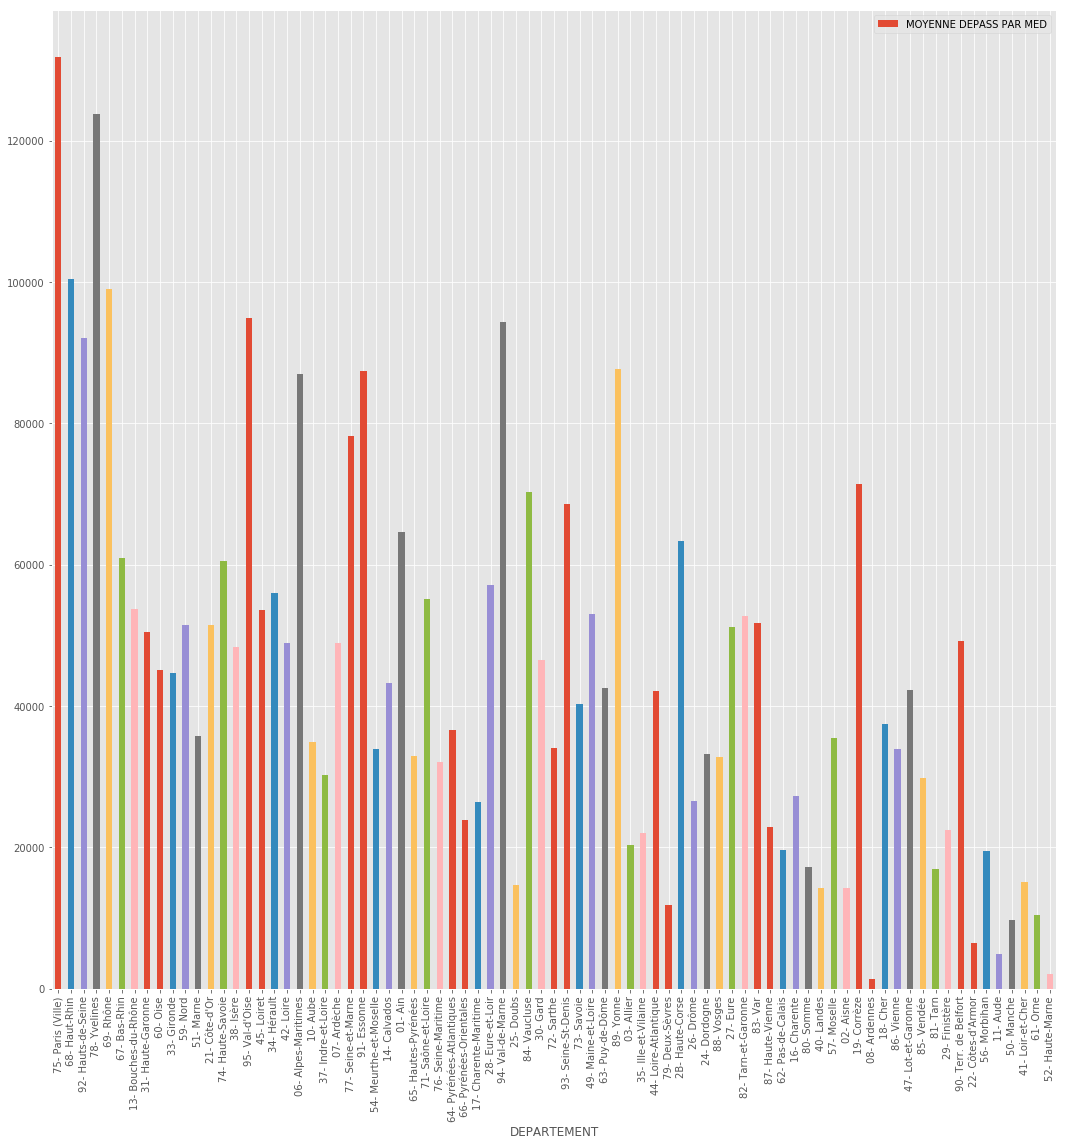

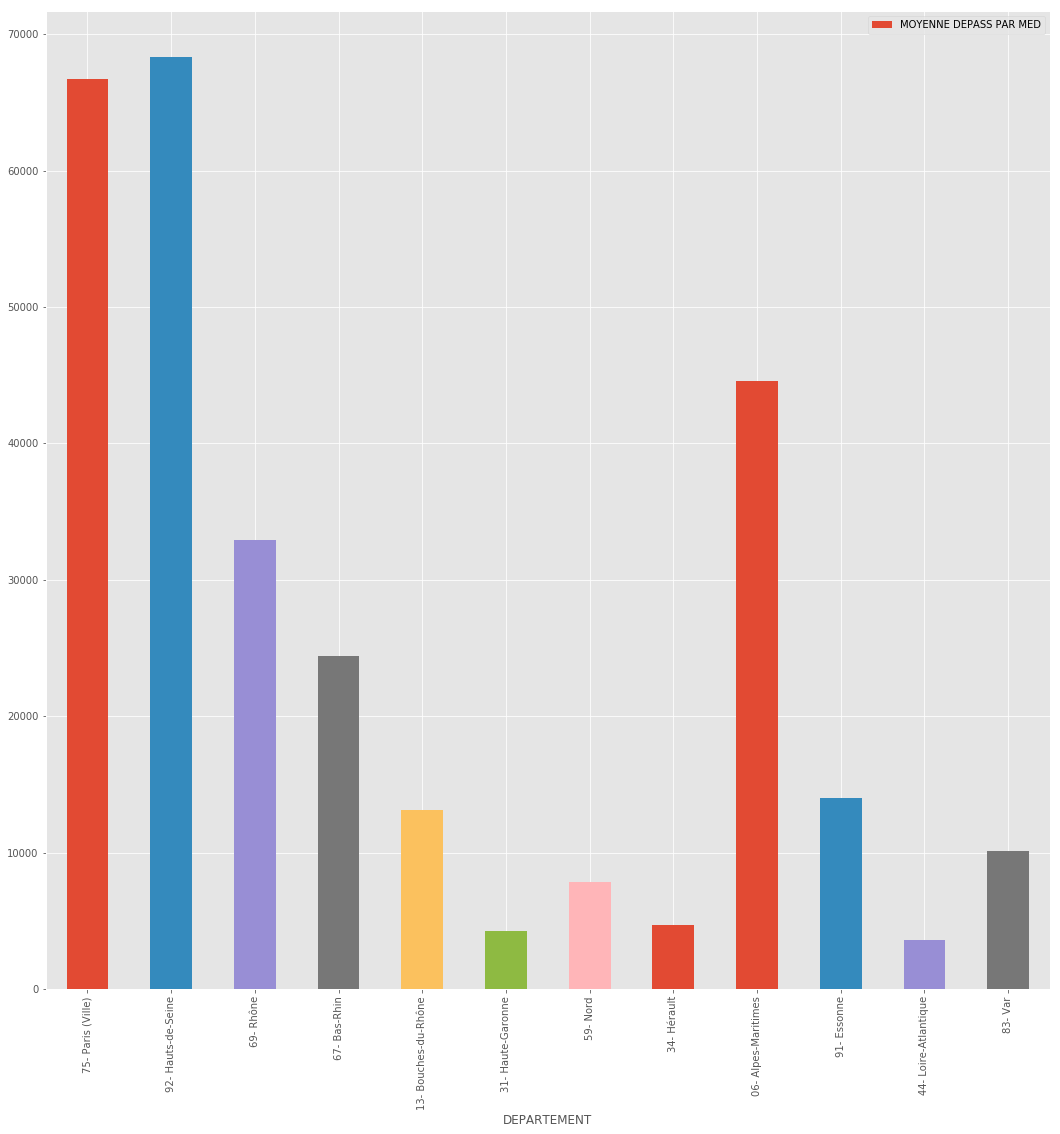

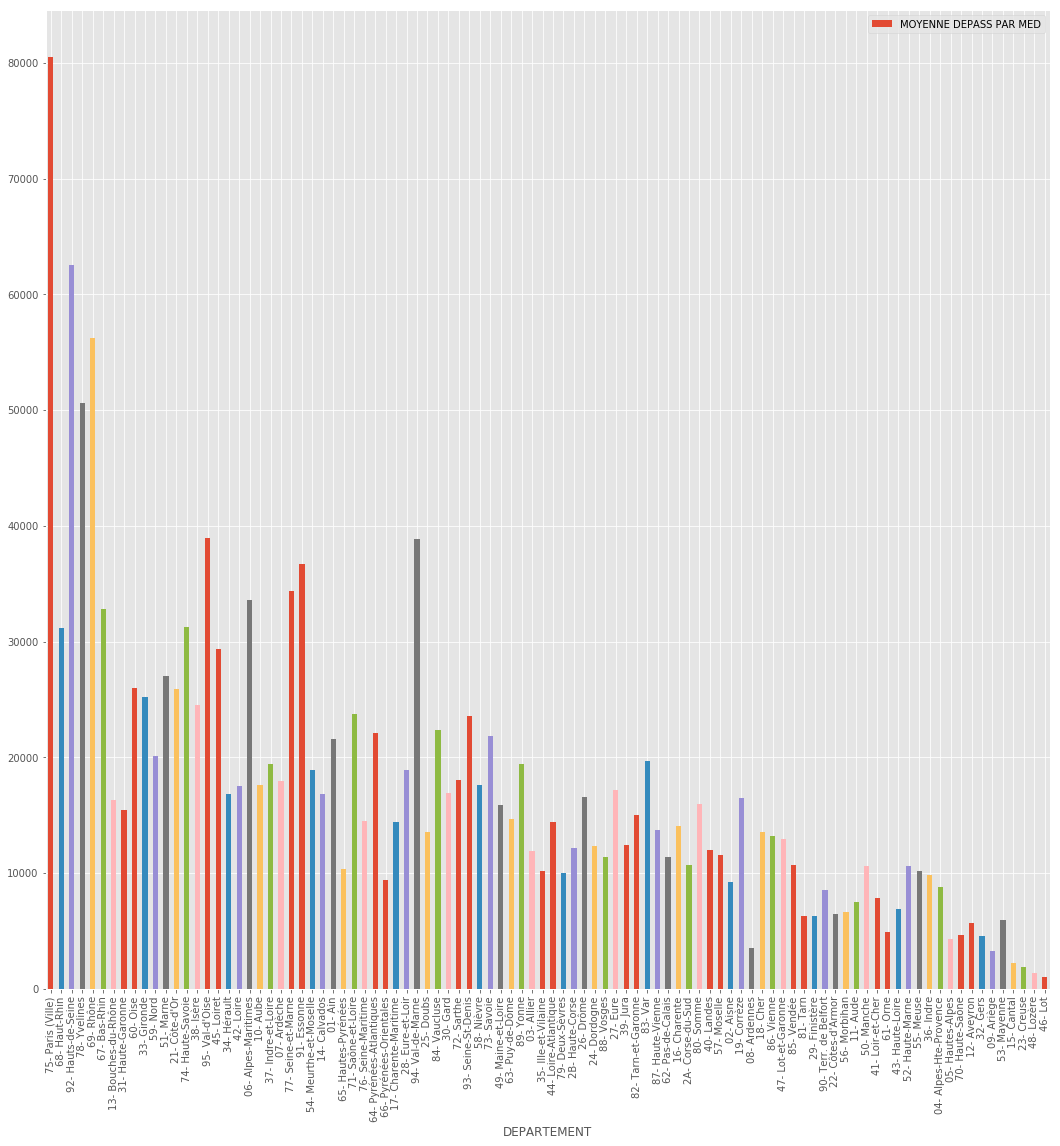

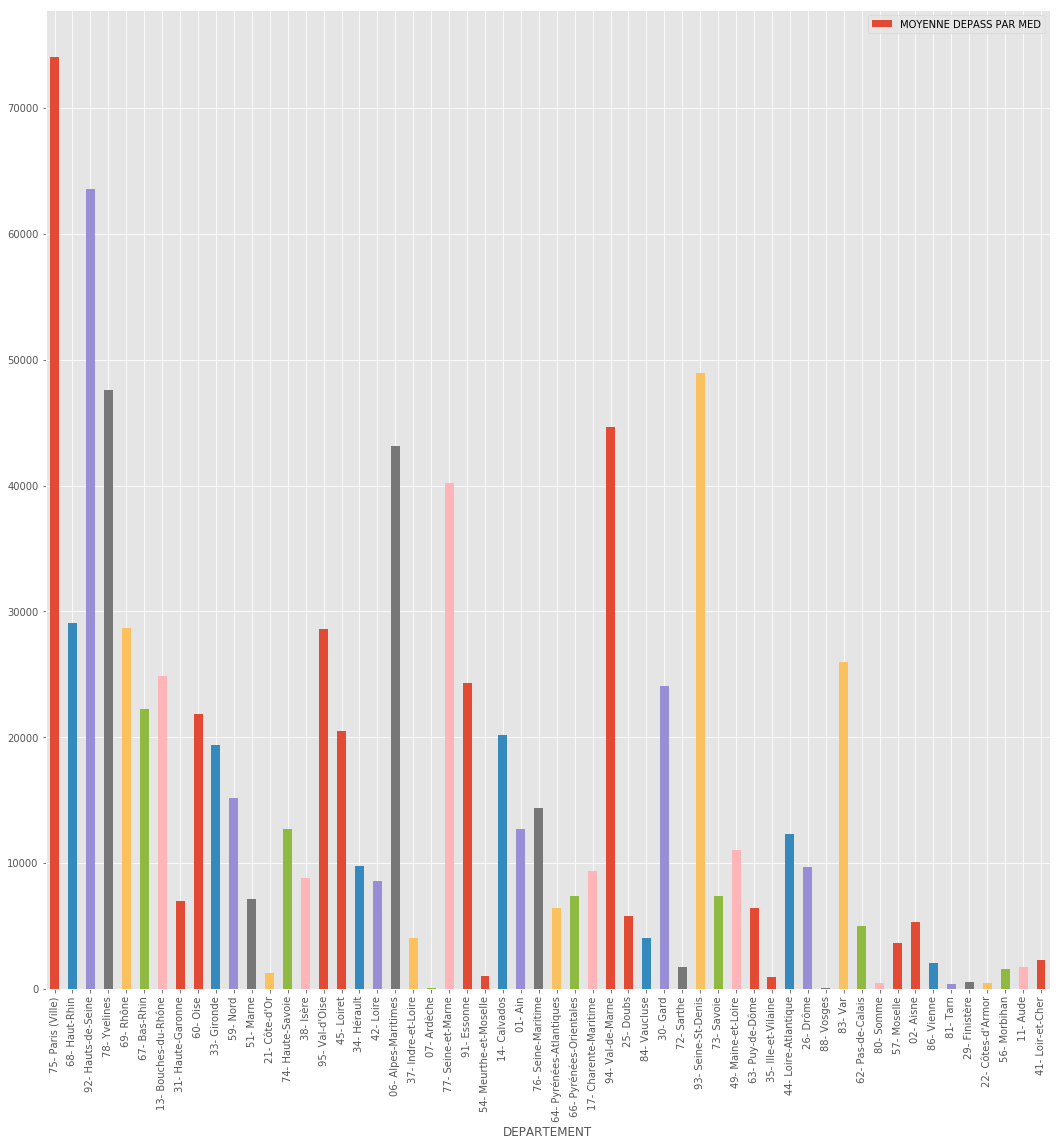

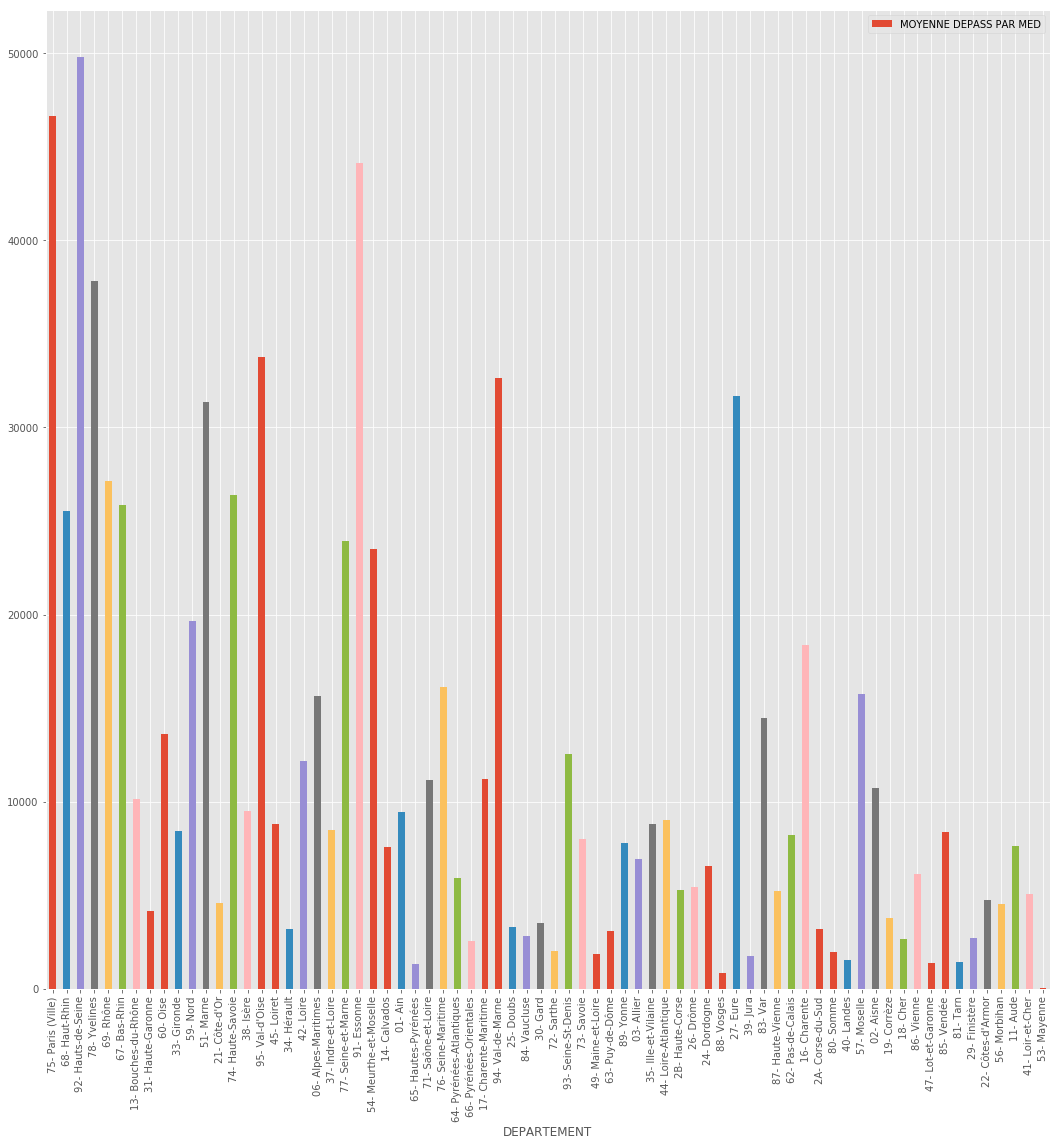

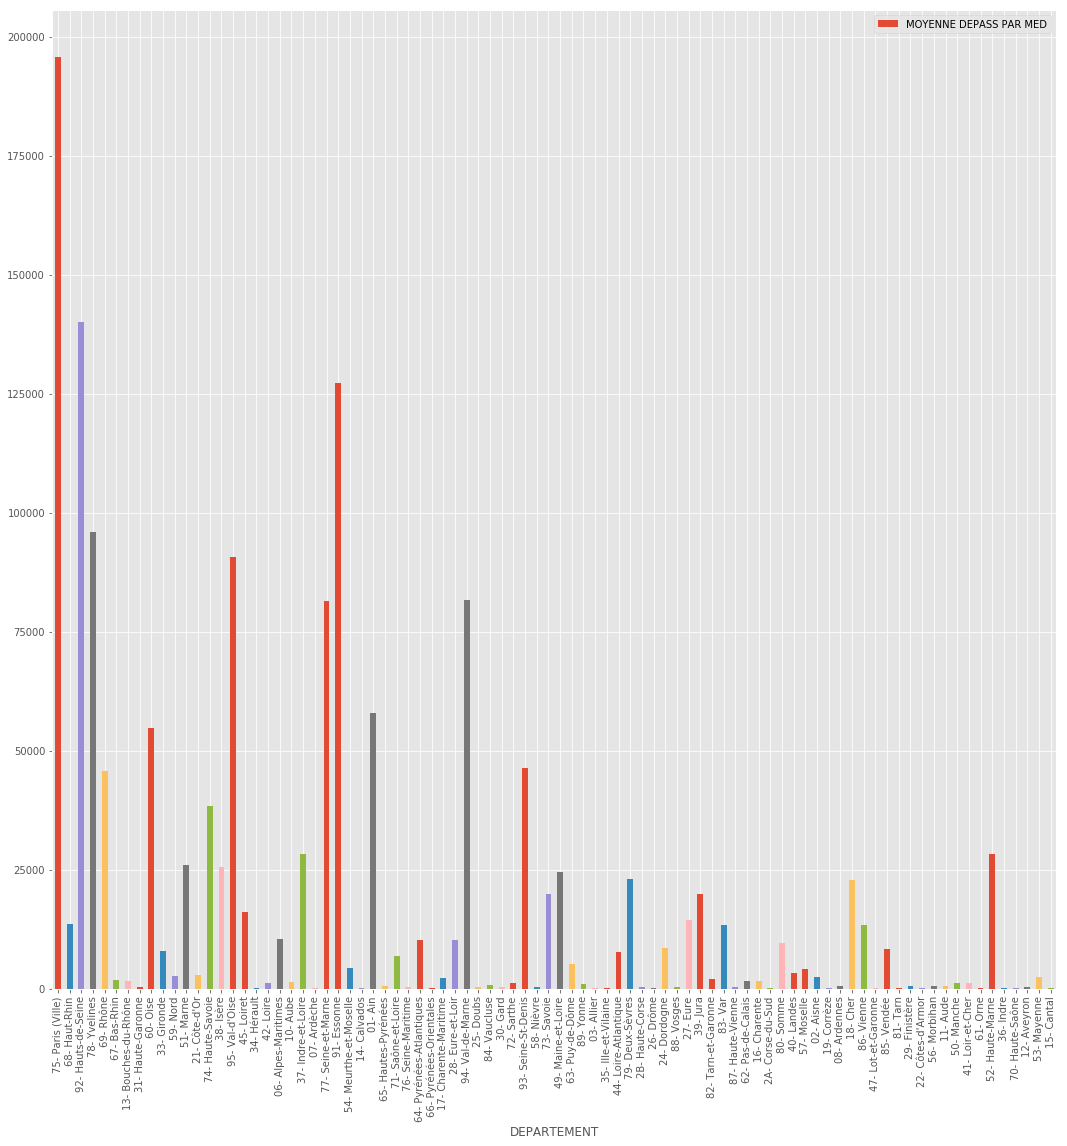

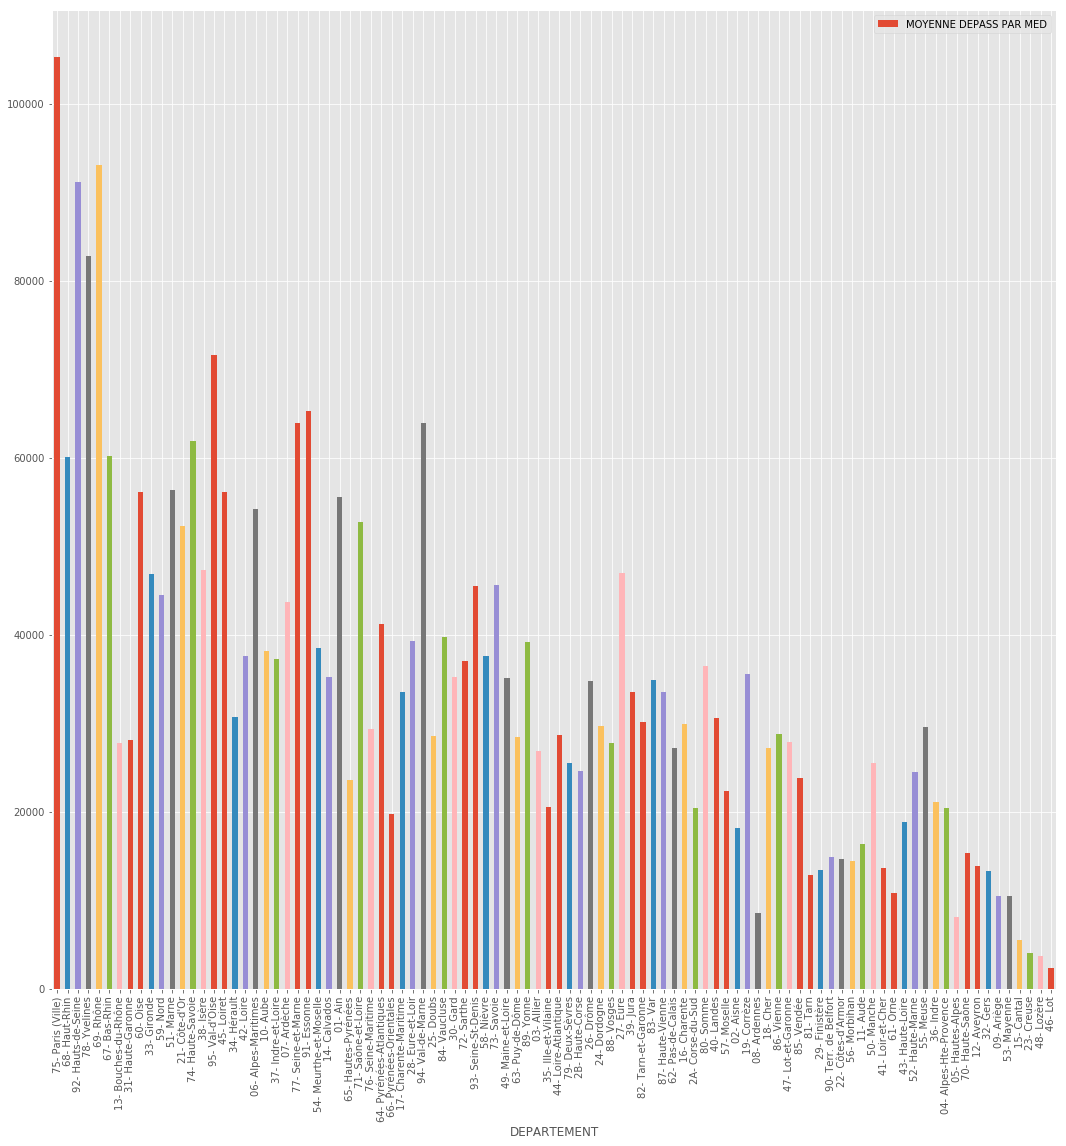

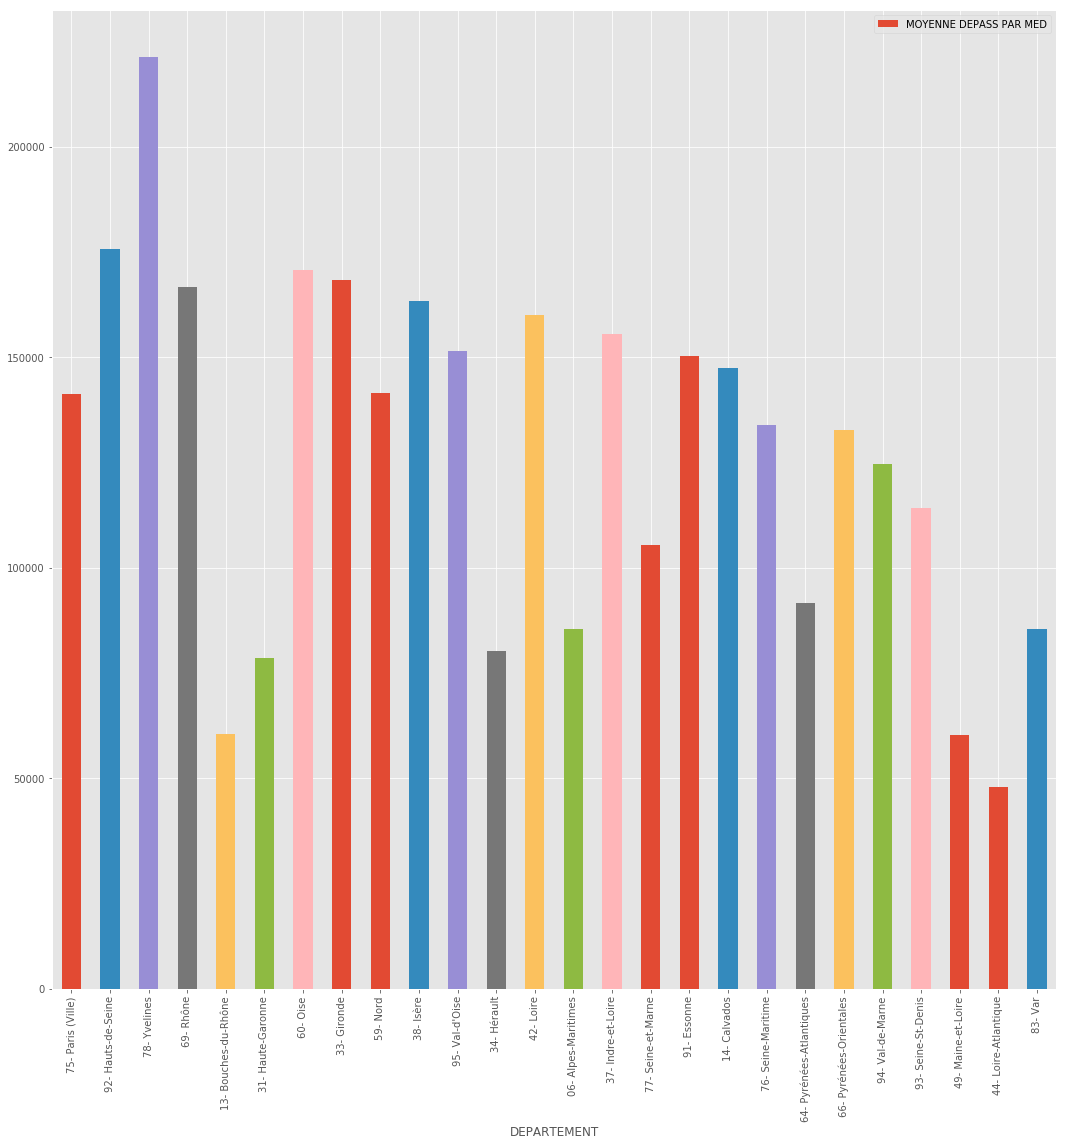

In [40]:
df_hon_pop_grp1 = df_hon_pop.groupby("Spécialistes")
df_hon_pop_grp1.plot("DEPARTEMENT", "MOYENNE DEPASS PAR MED", kind="bar", figsize=(18,18))

In [ ]:
Regardons pour une tranche d'age (les enfants entre 0 et 4 ans).  

/home/arij/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Spécialistes
02- Anesthésie-réanimation chirurgicale                  AxesSubplot(0.125,0.125;0.775x0.755)
03- Pathologie cardio-vasculaire                         AxesSubplot(0.125,0.125;0.775x0.755)
04- Chirurgie générale                                   AxesSubplot(0.125,0.125;0.775x0.755)
05- Dermato-vénéréologie                                 AxesSubplot(0.125,0.125;0.775x0.755)
06- Radiodiagnostic et imagerie médicale                 AxesSubplot(0.125,0.125;0.775x0.755)
07- Gynécologie obstétrique                              AxesSubplot(0.125,0.125;0.775x0.755)
08- Gastro-entérologie et hépatologie                    AxesSubplot(0.125,0.125;0.775x0.755)
09- Médecine interne                                     AxesSubplot(0.125,0.125;0.775x0.755)
10- Neurochirurgie                                       AxesSubplot(0.125,0.125;0.775x0.755)
11- Oto-rhino-laryngologie                               AxesSubplot(0.125,0.125;0.775x0.755)
12- Pédiatrie                                  

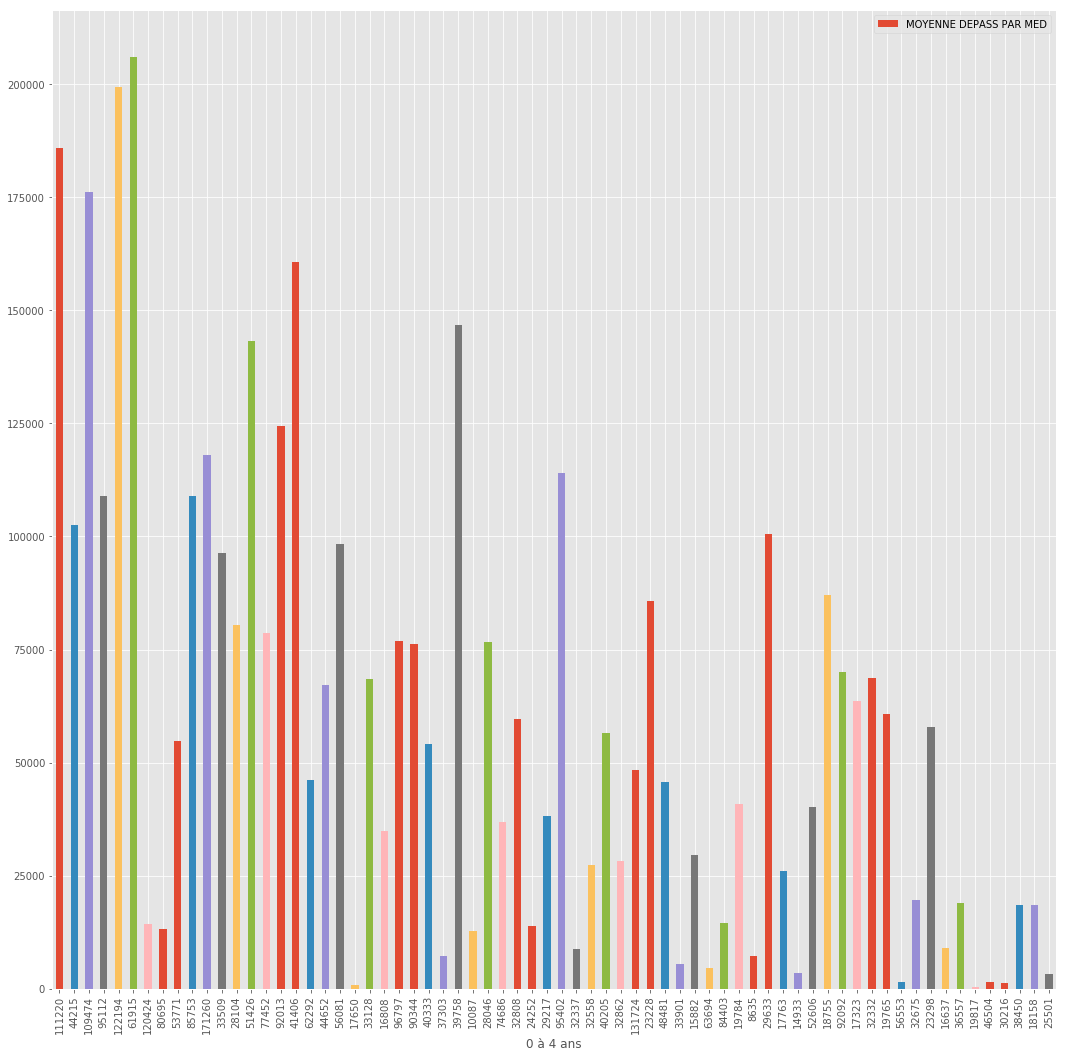

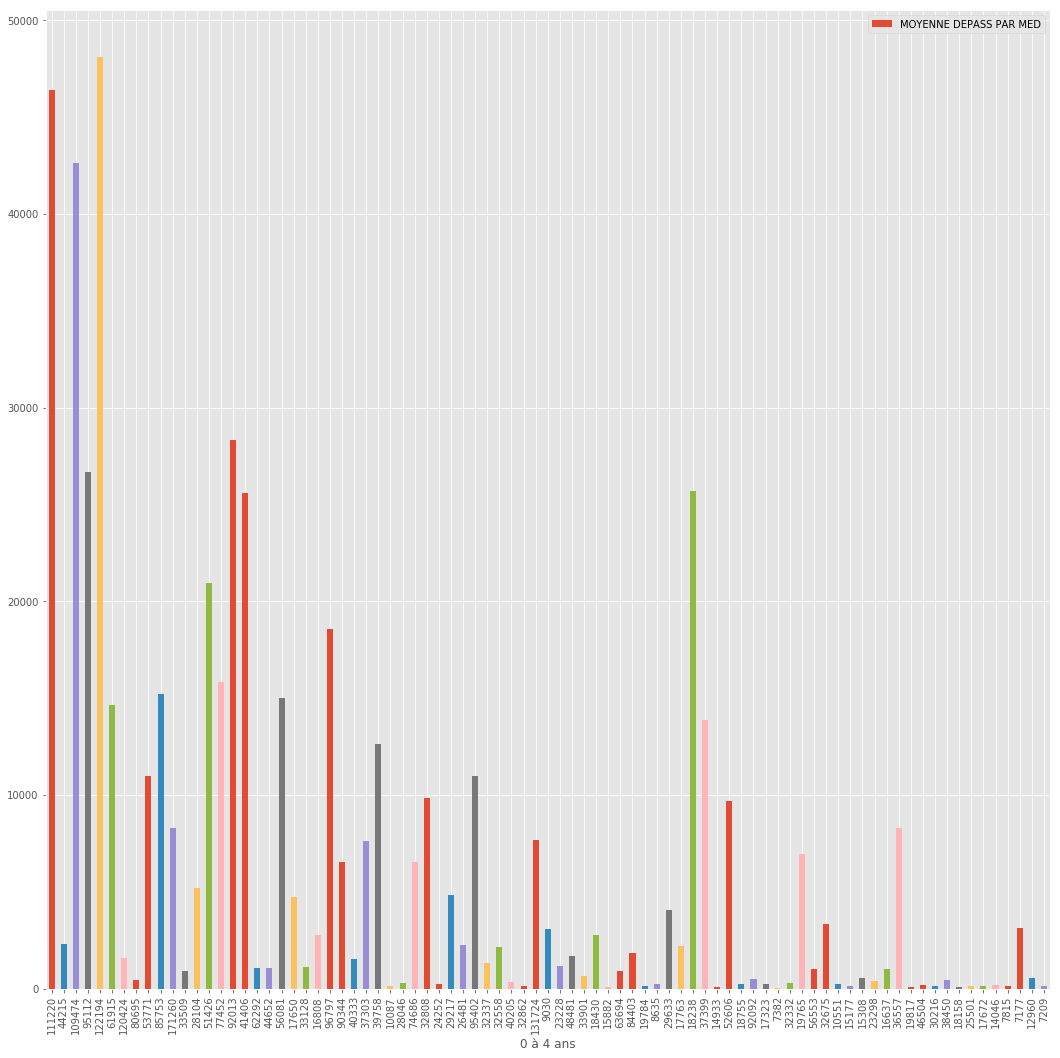

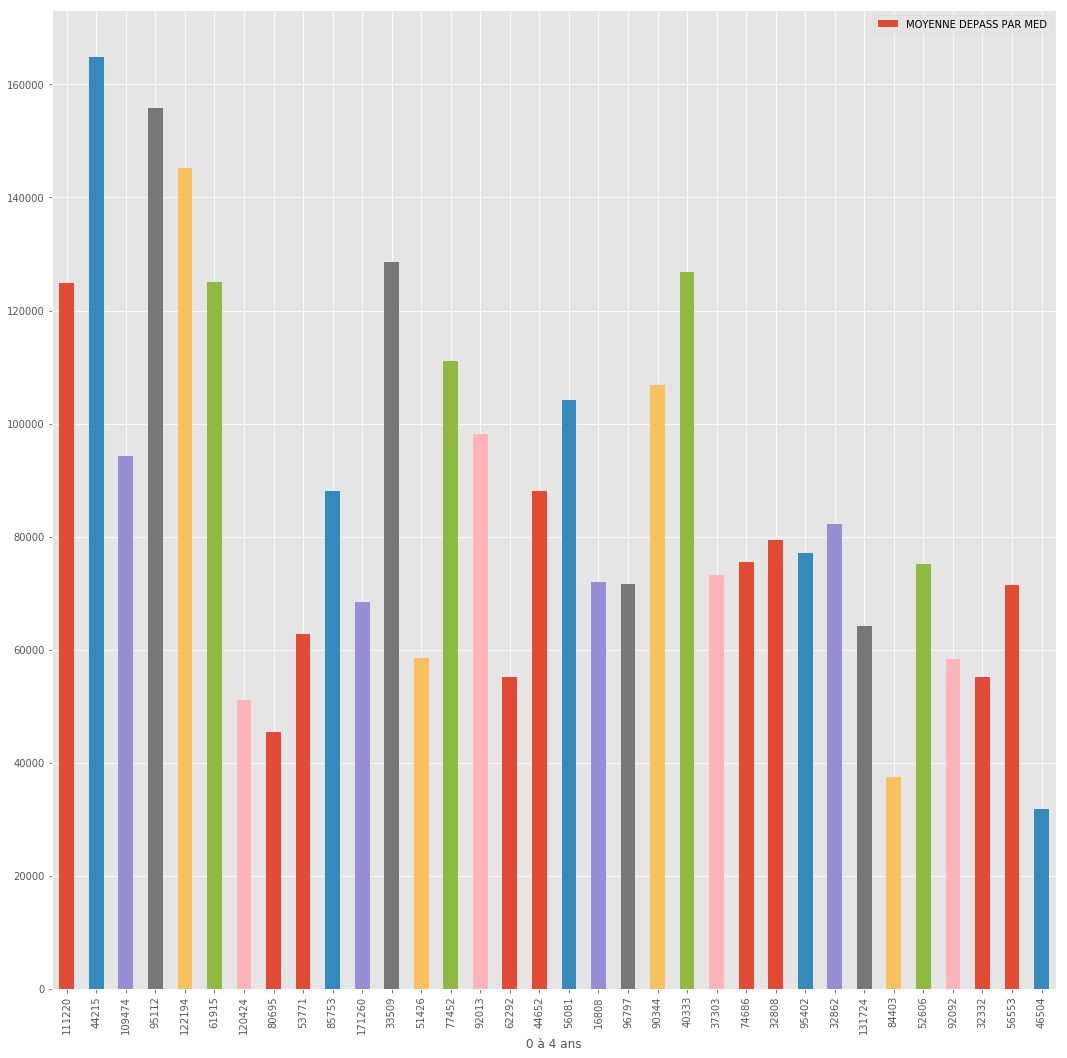

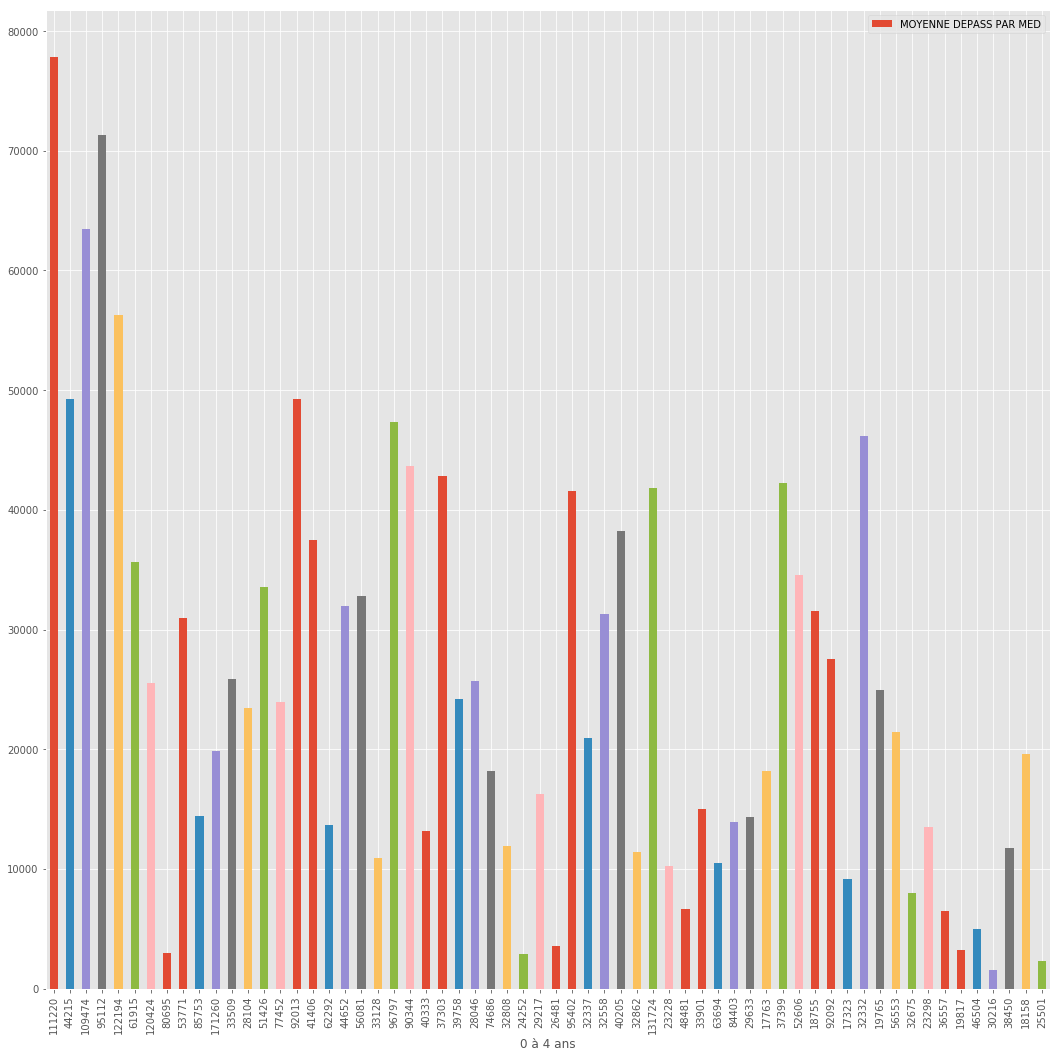

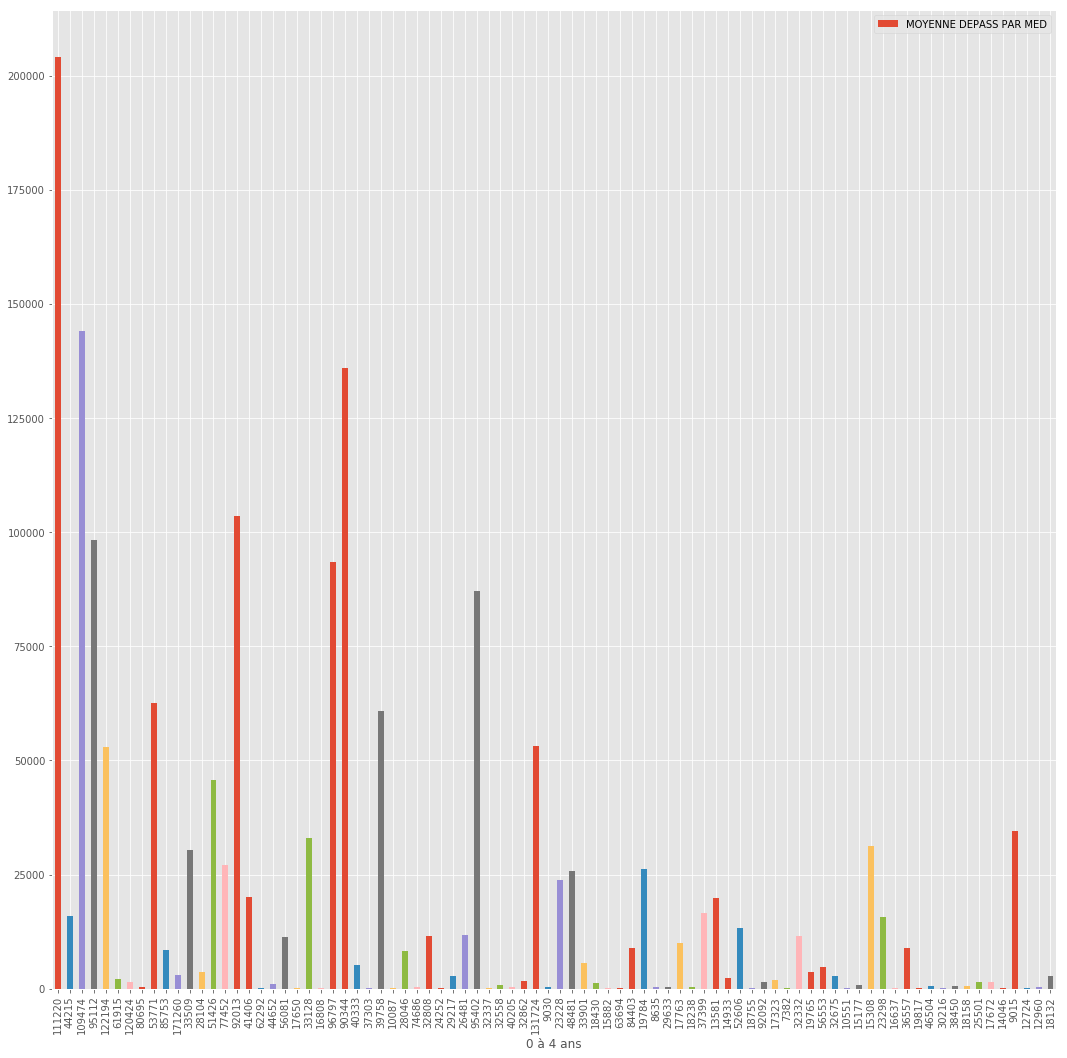

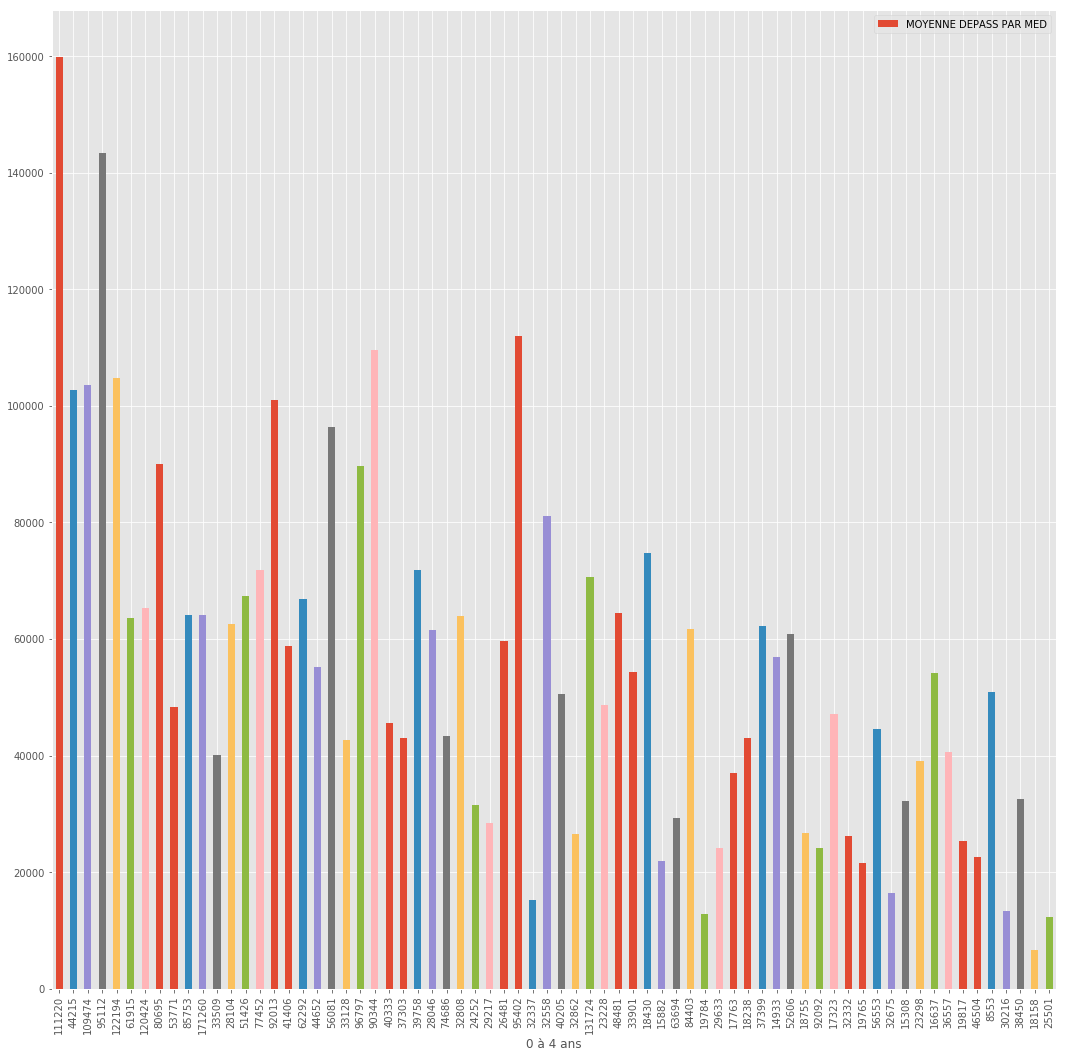

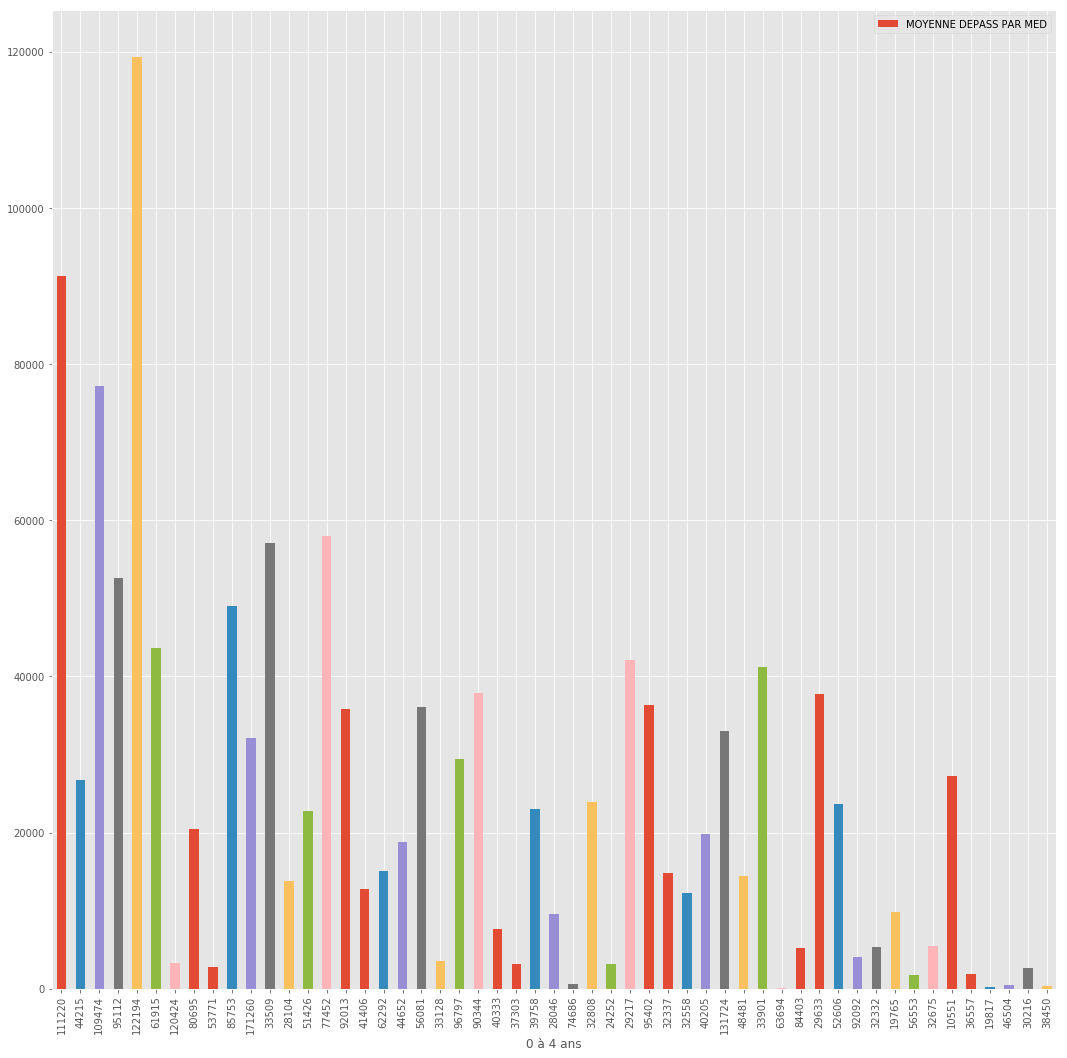

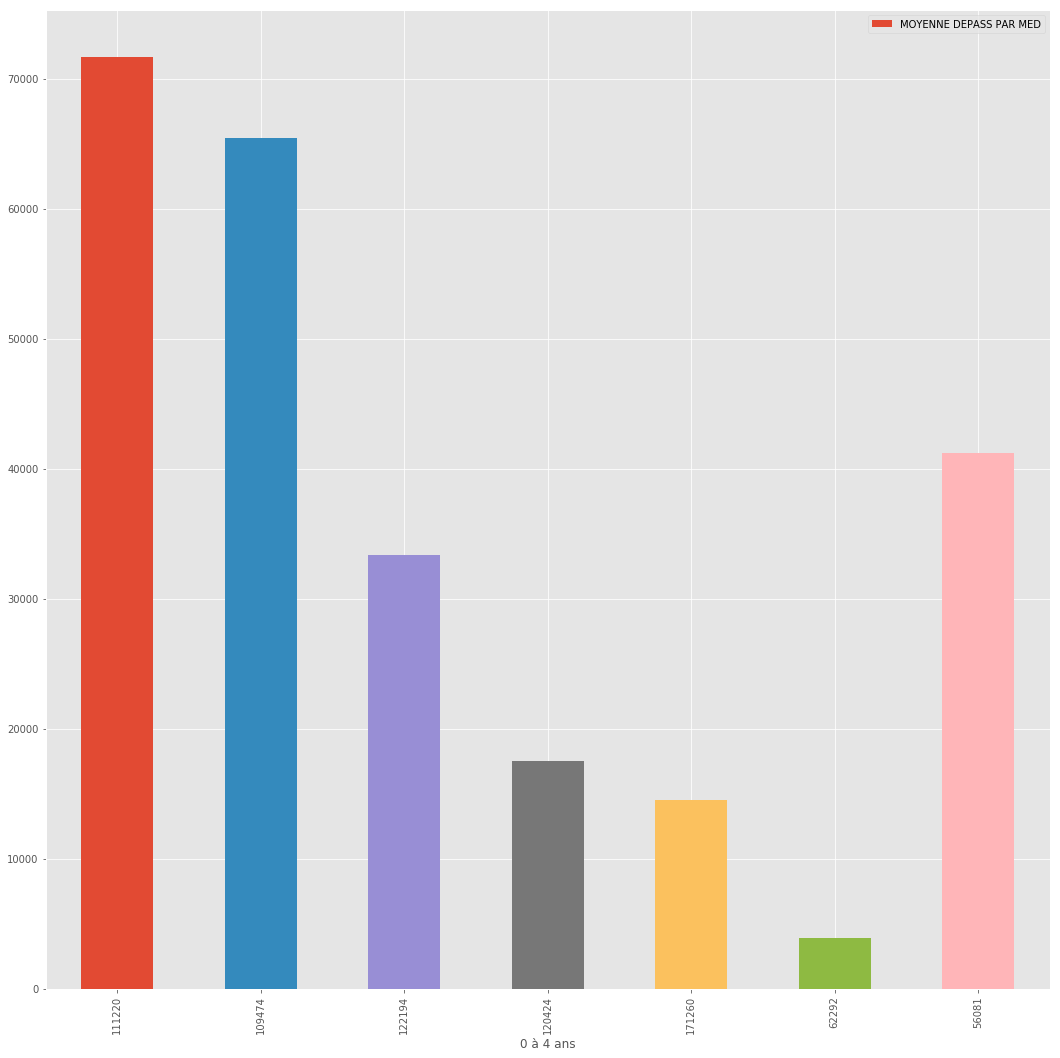

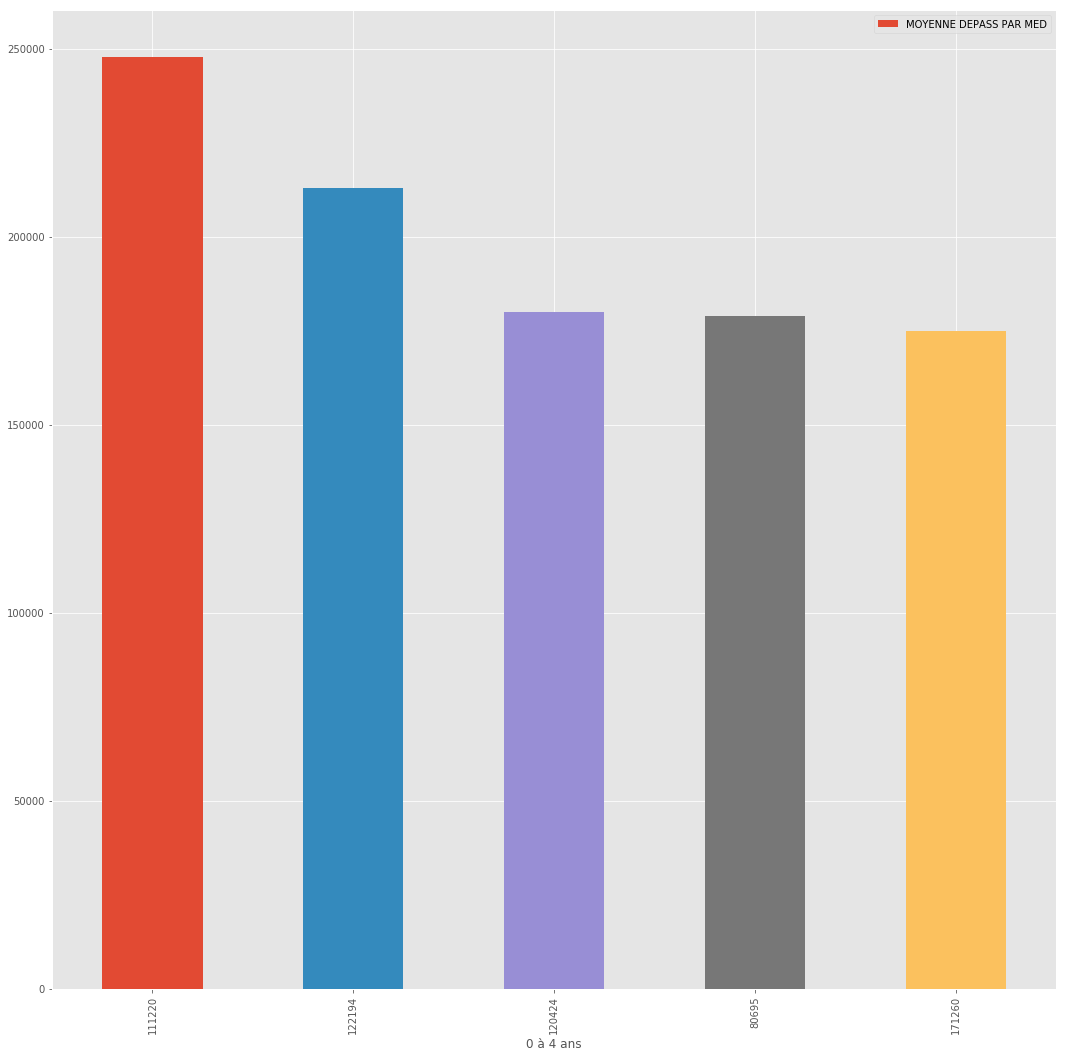

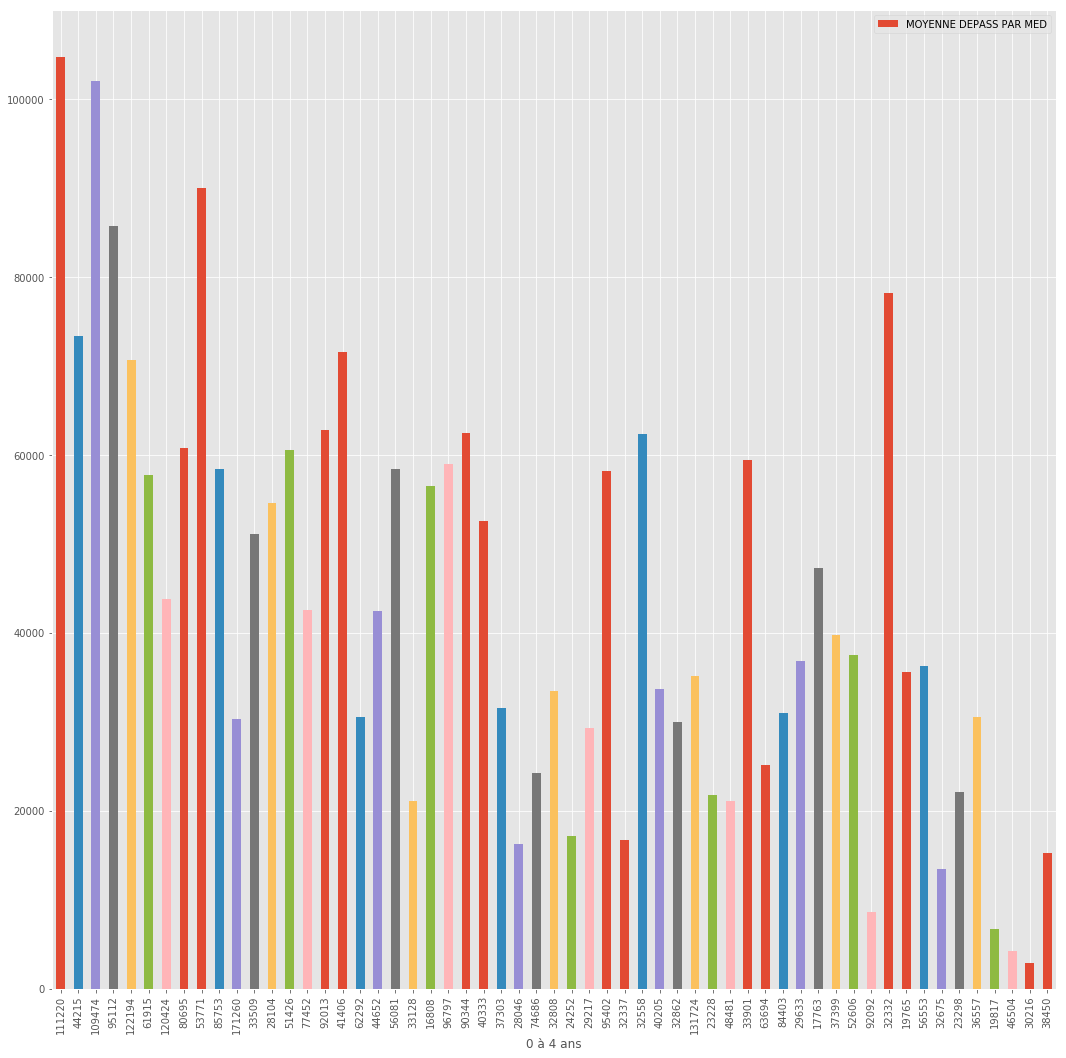

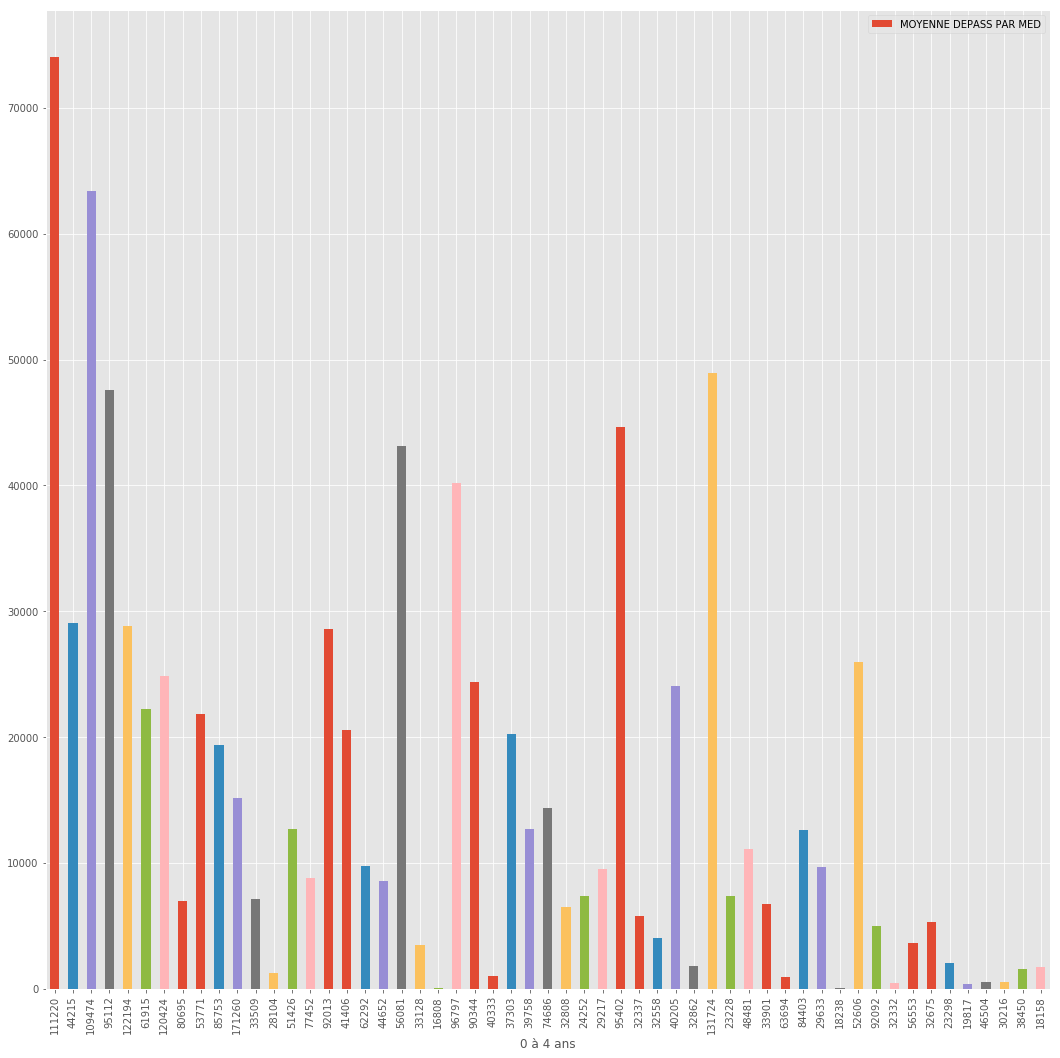

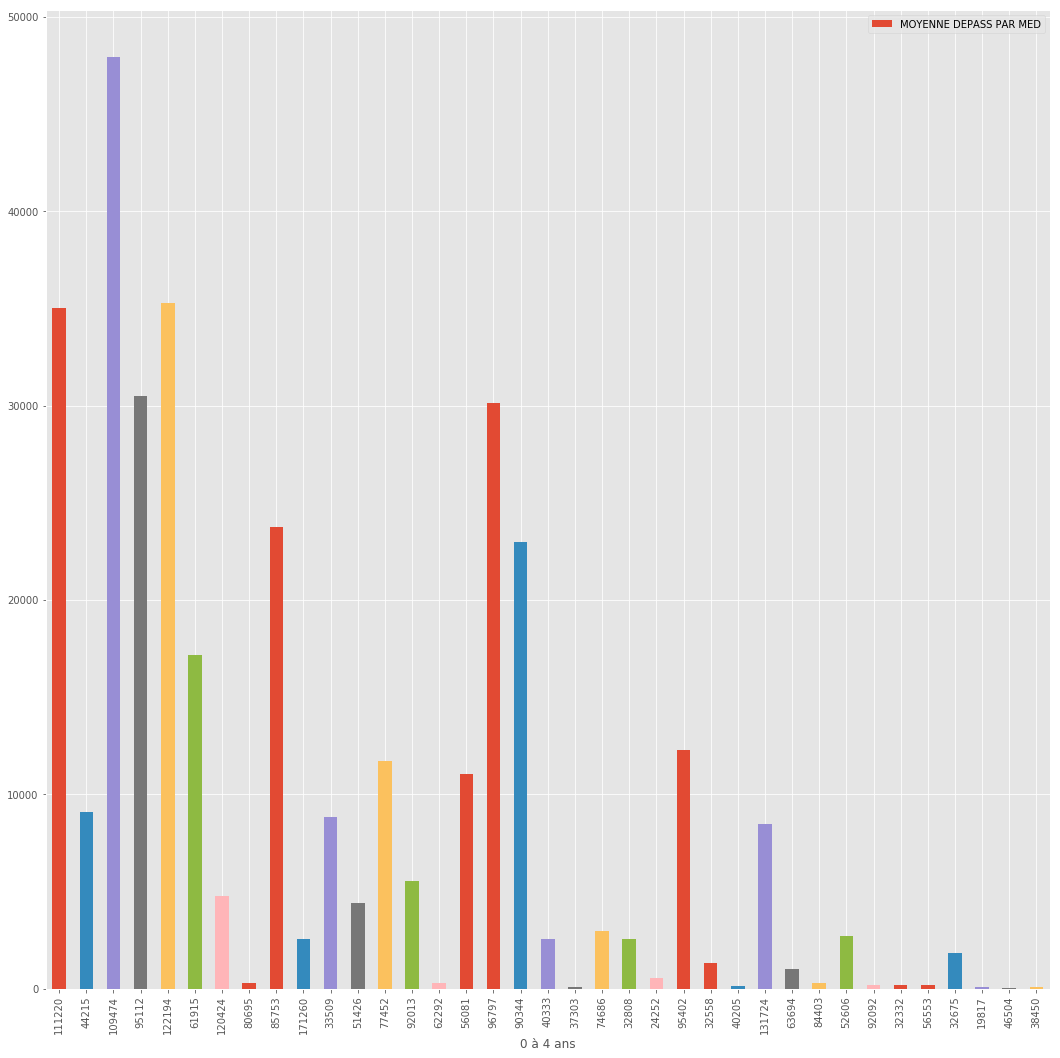

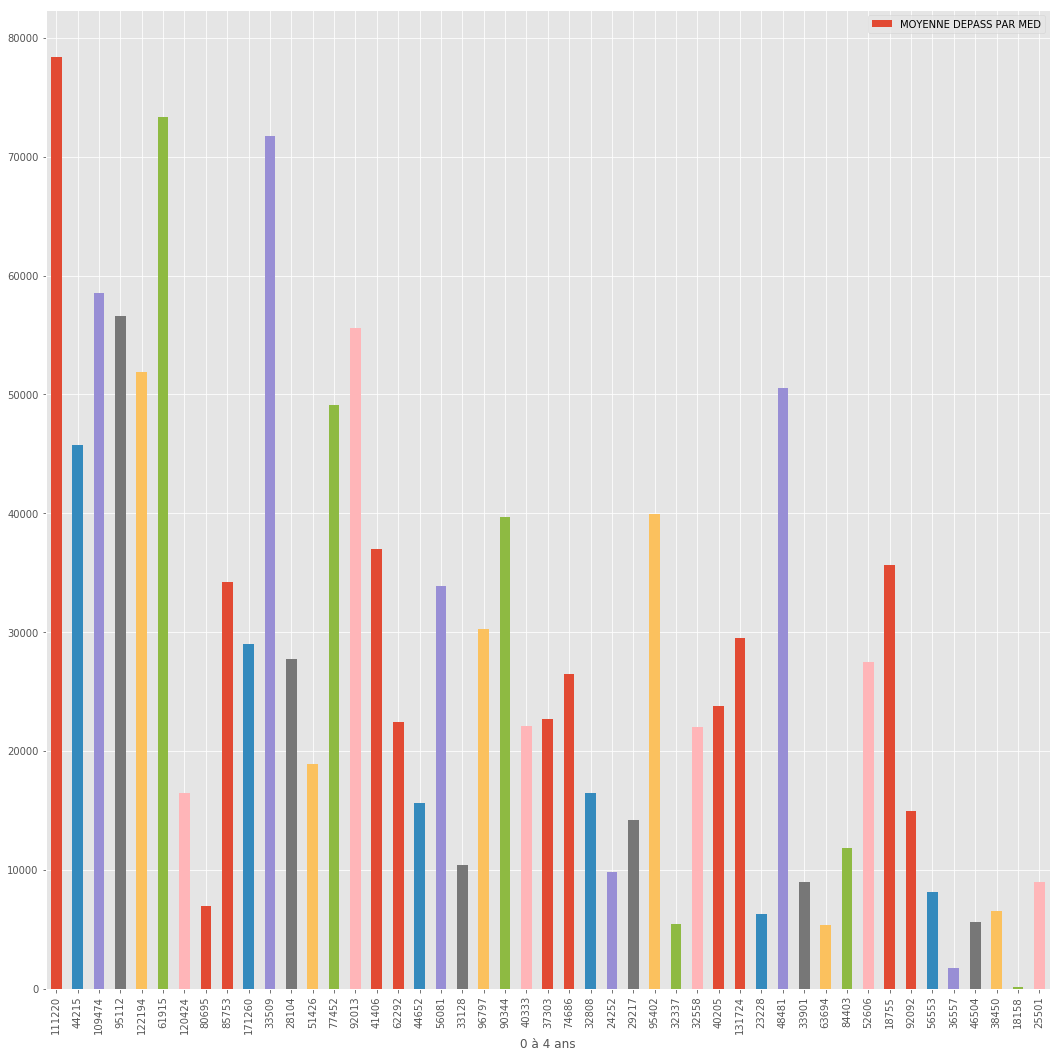

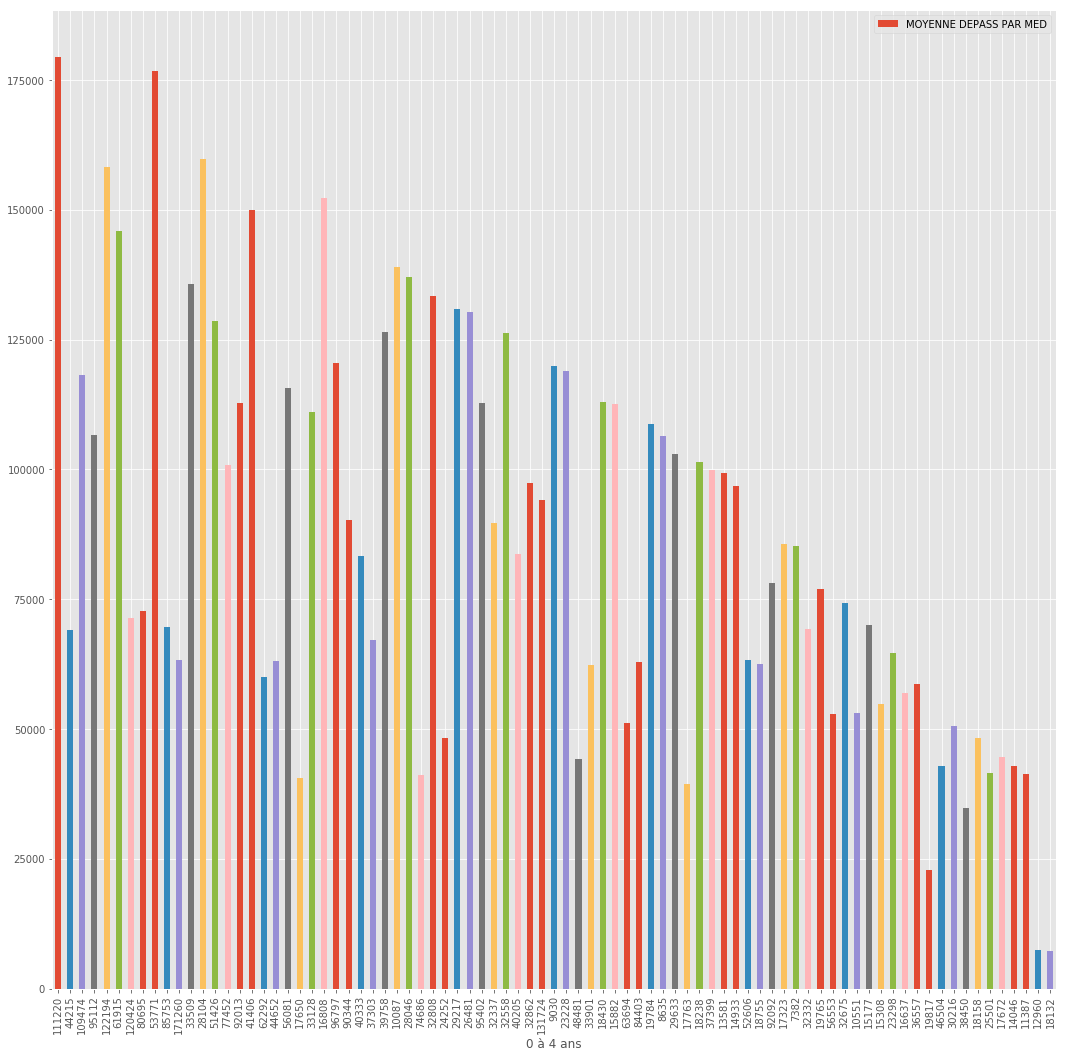

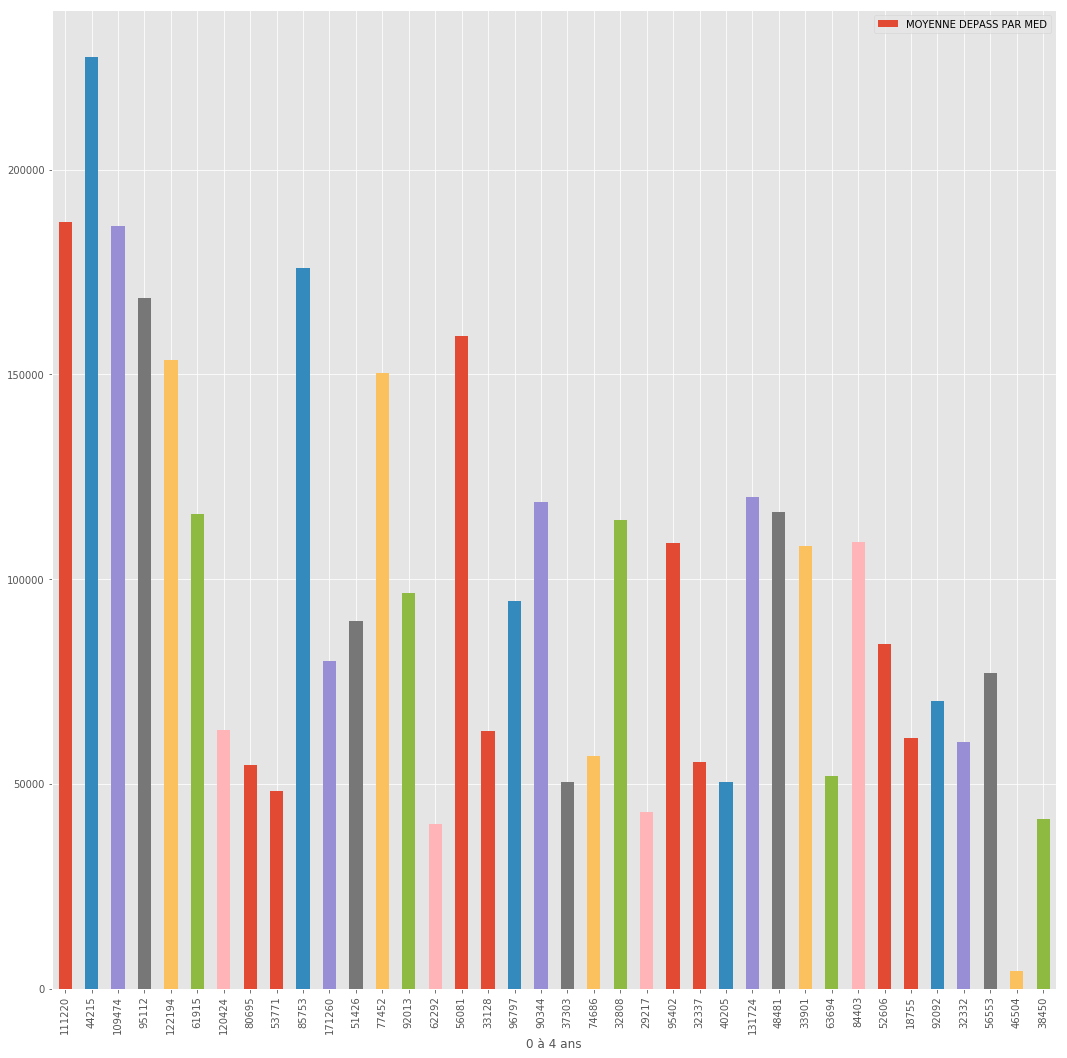

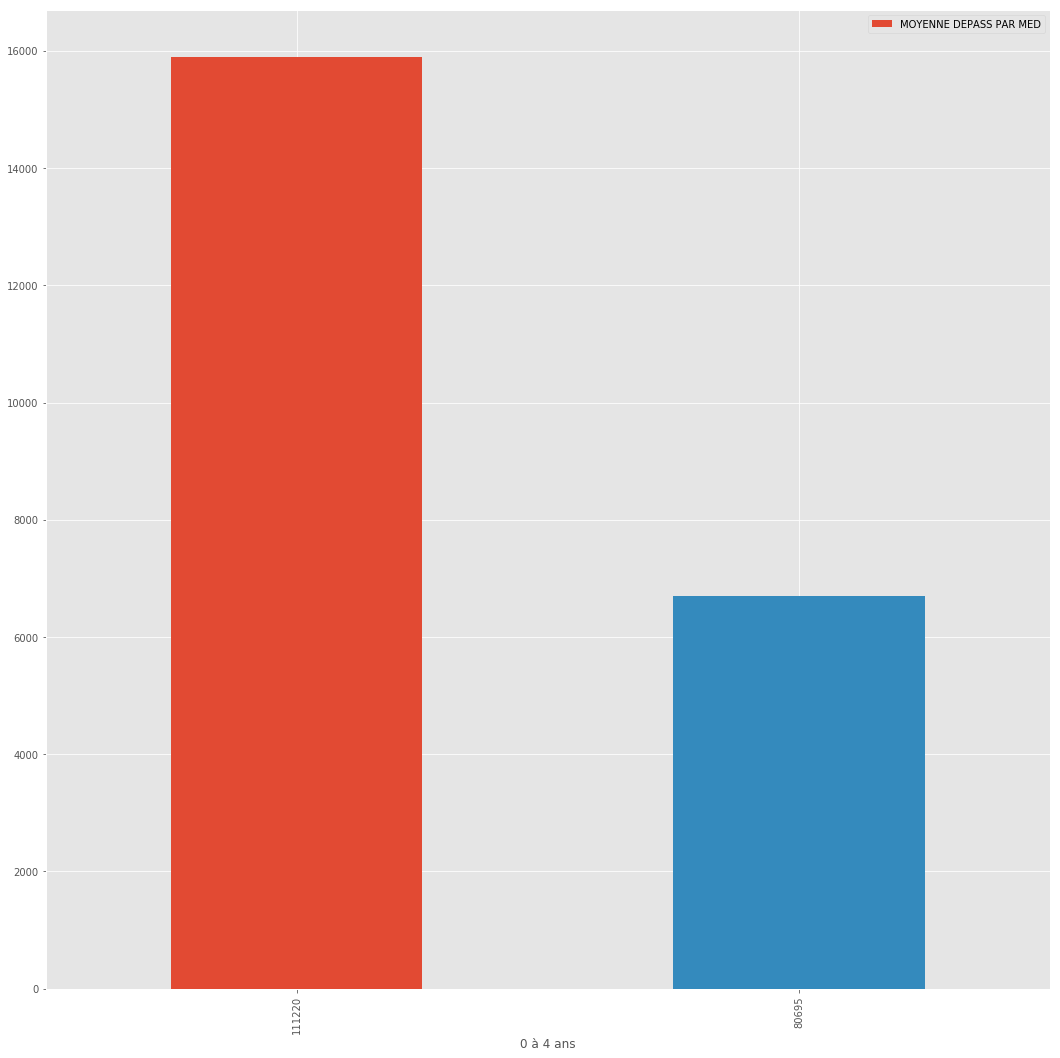

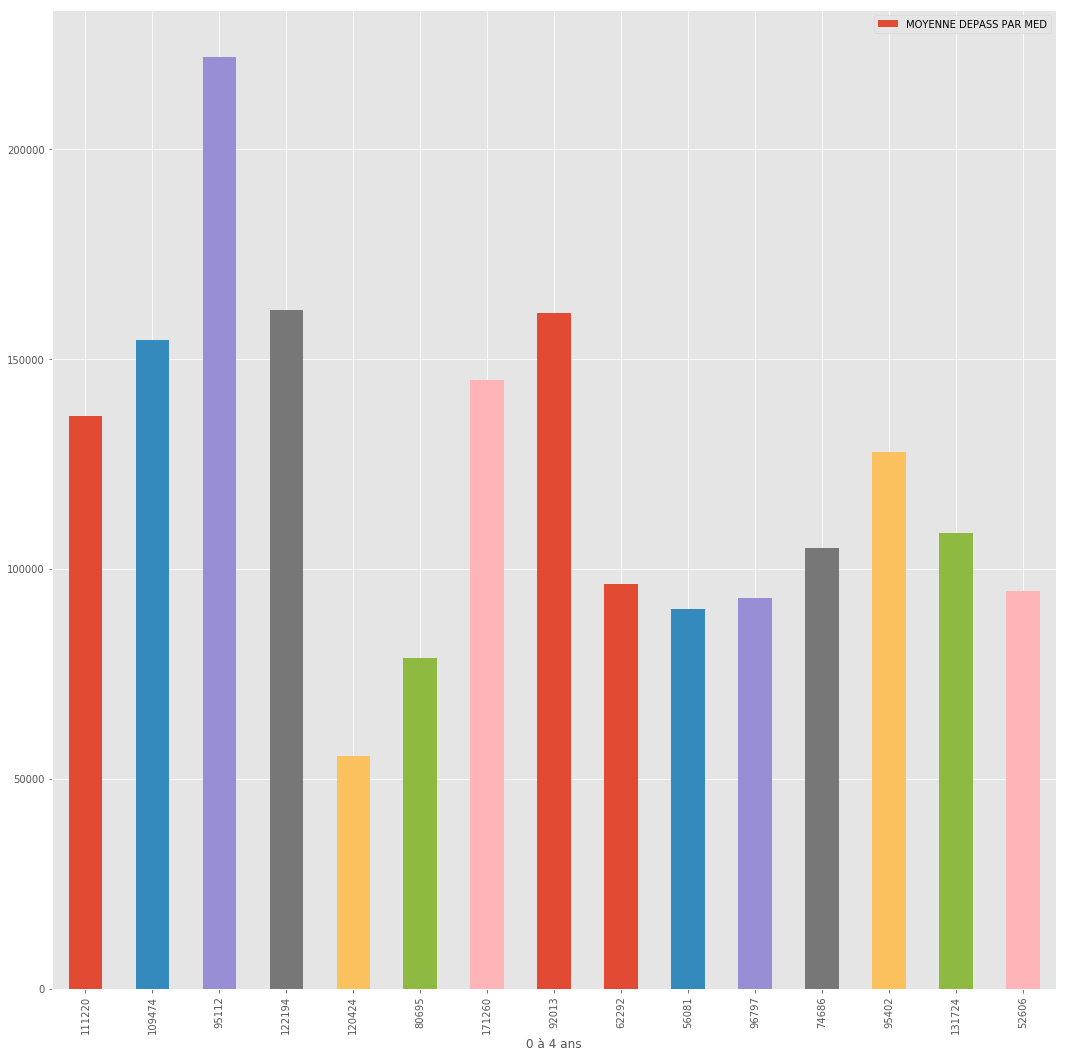

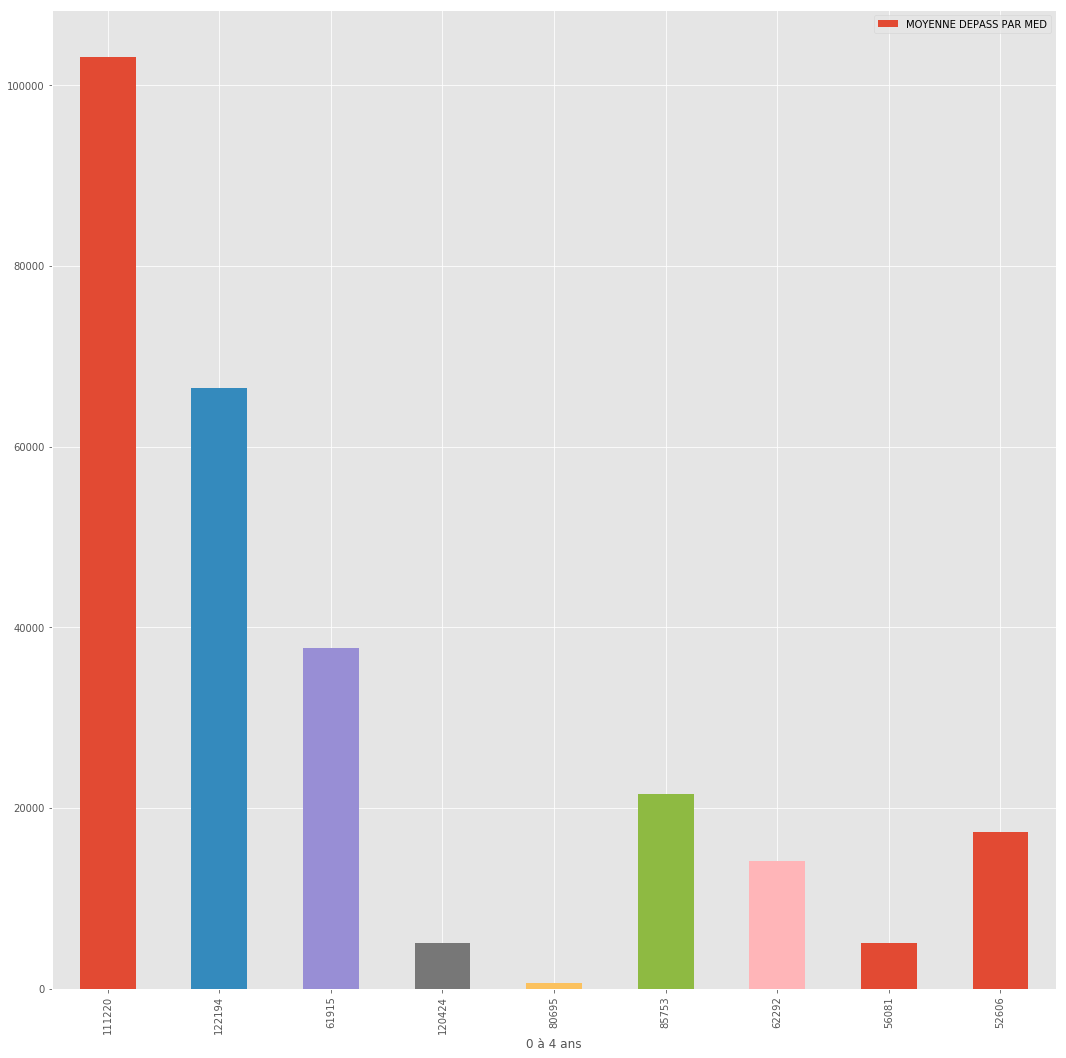

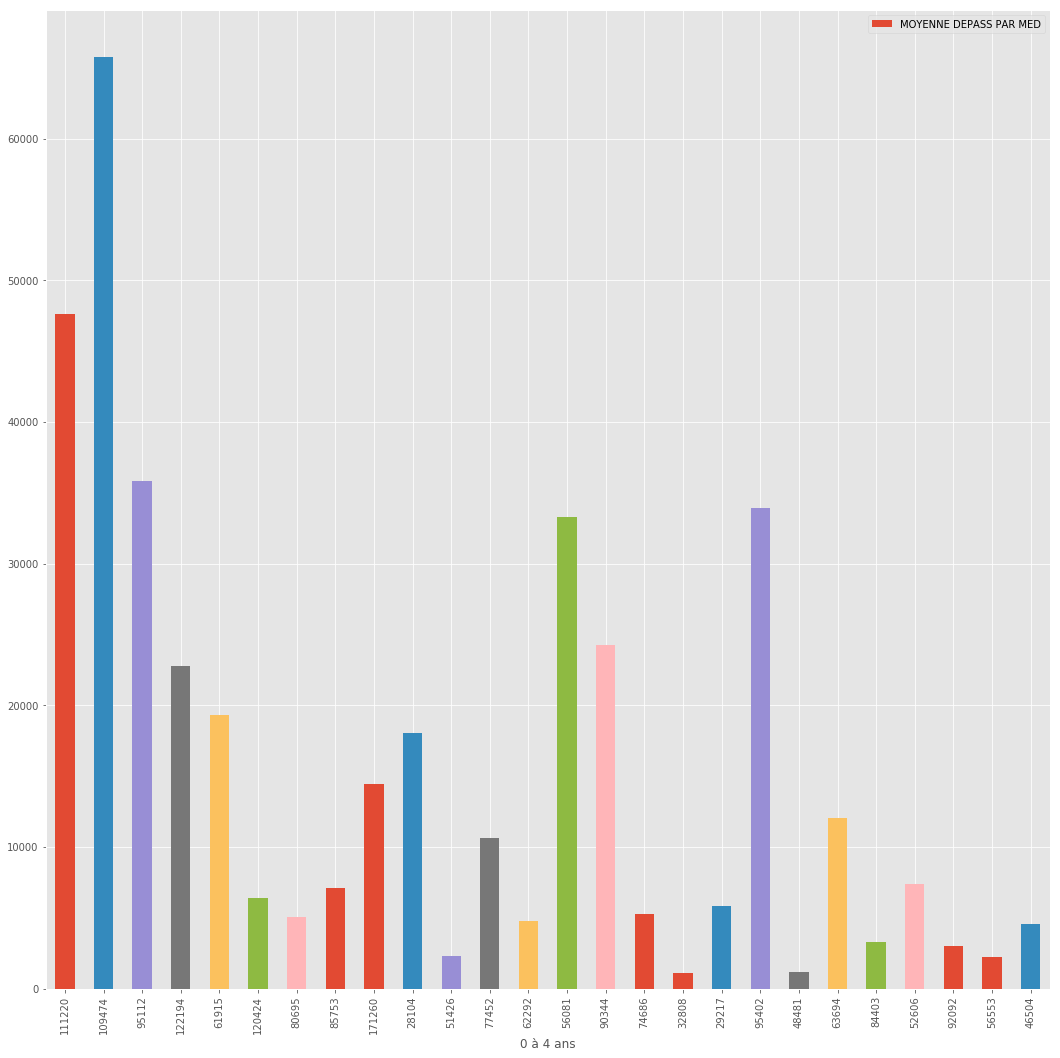

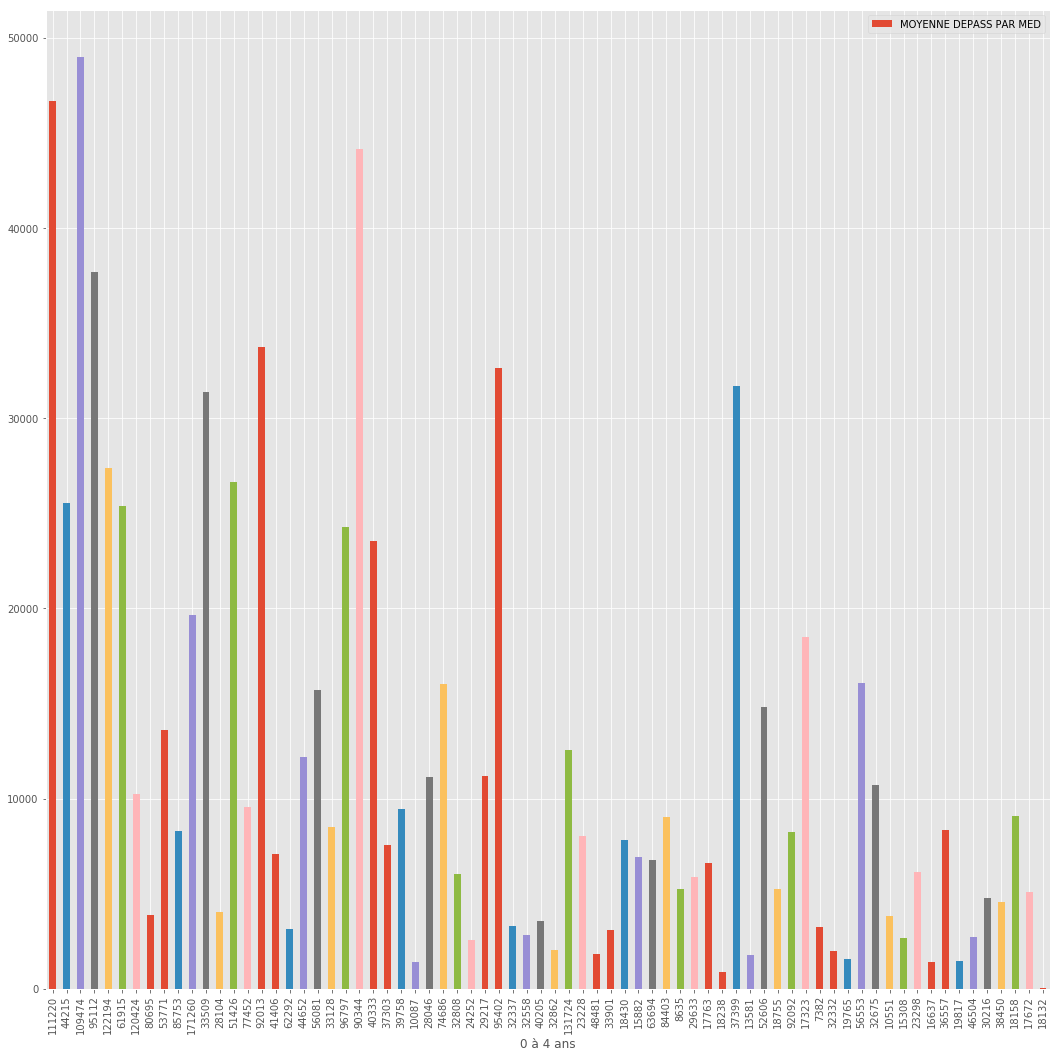

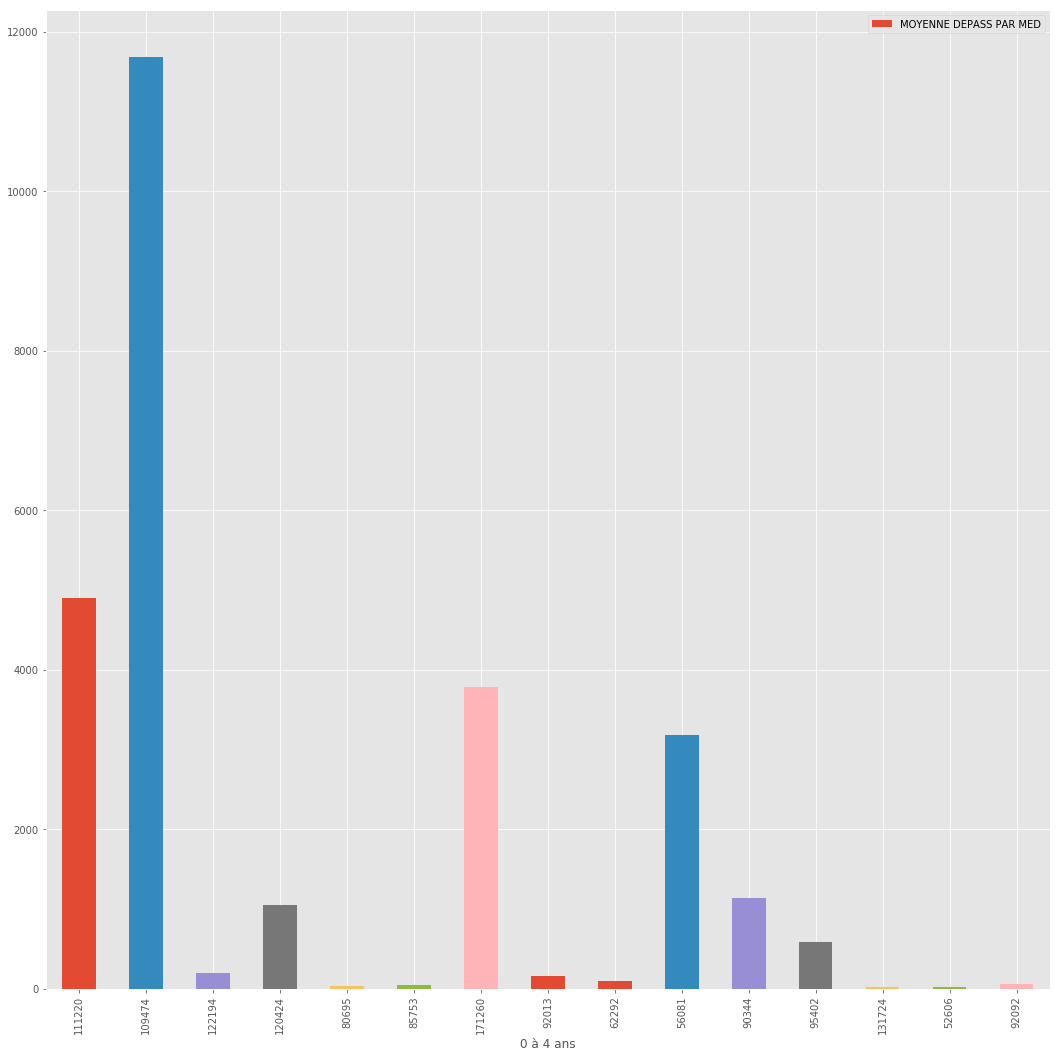

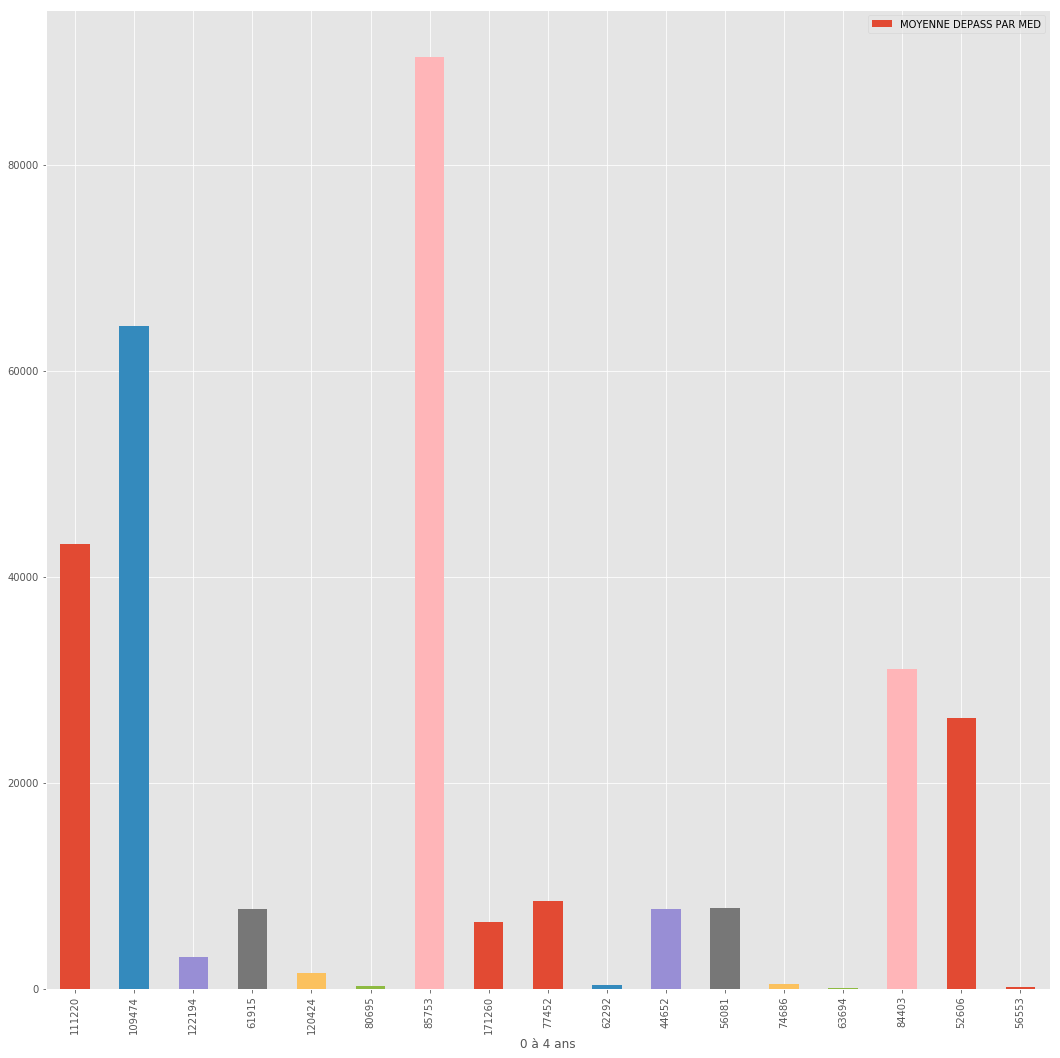

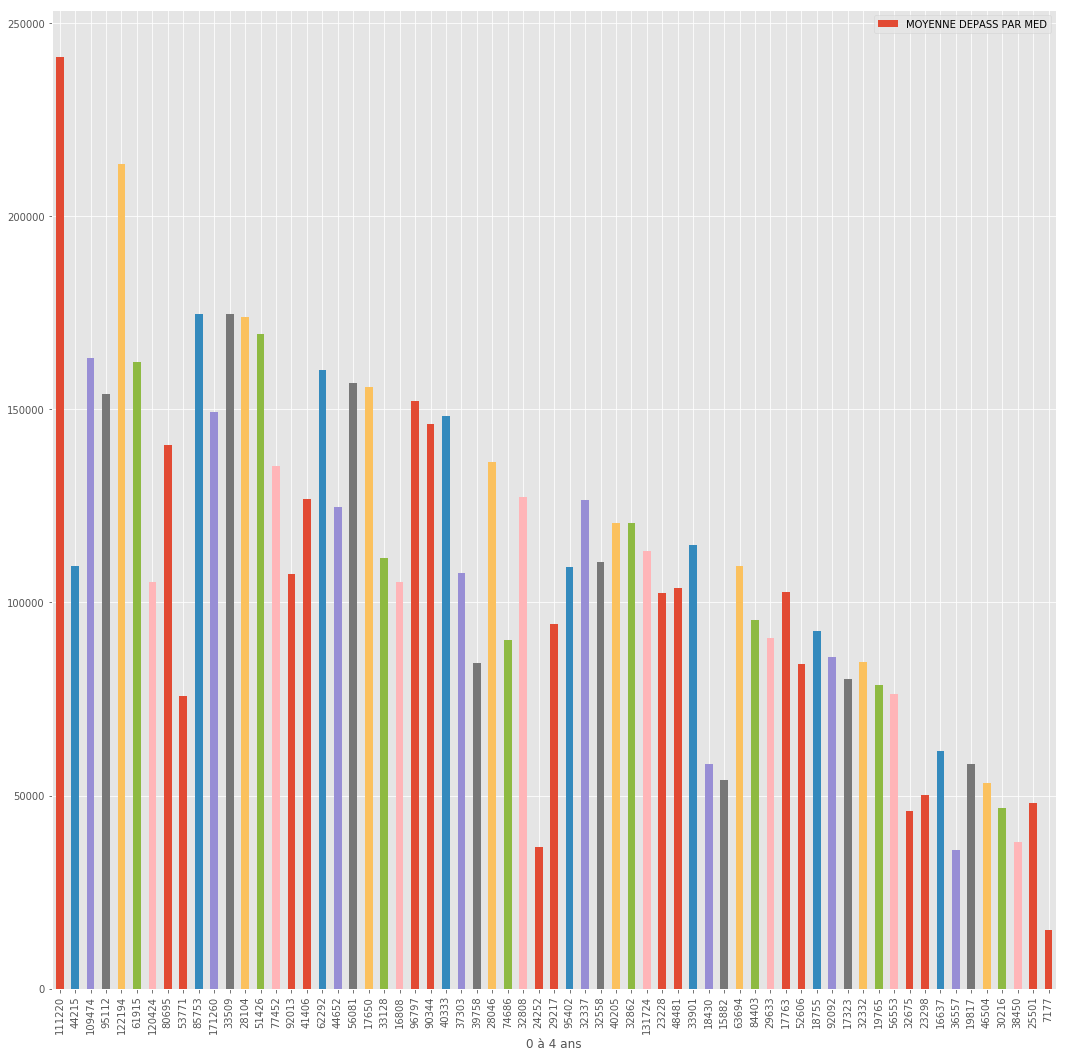

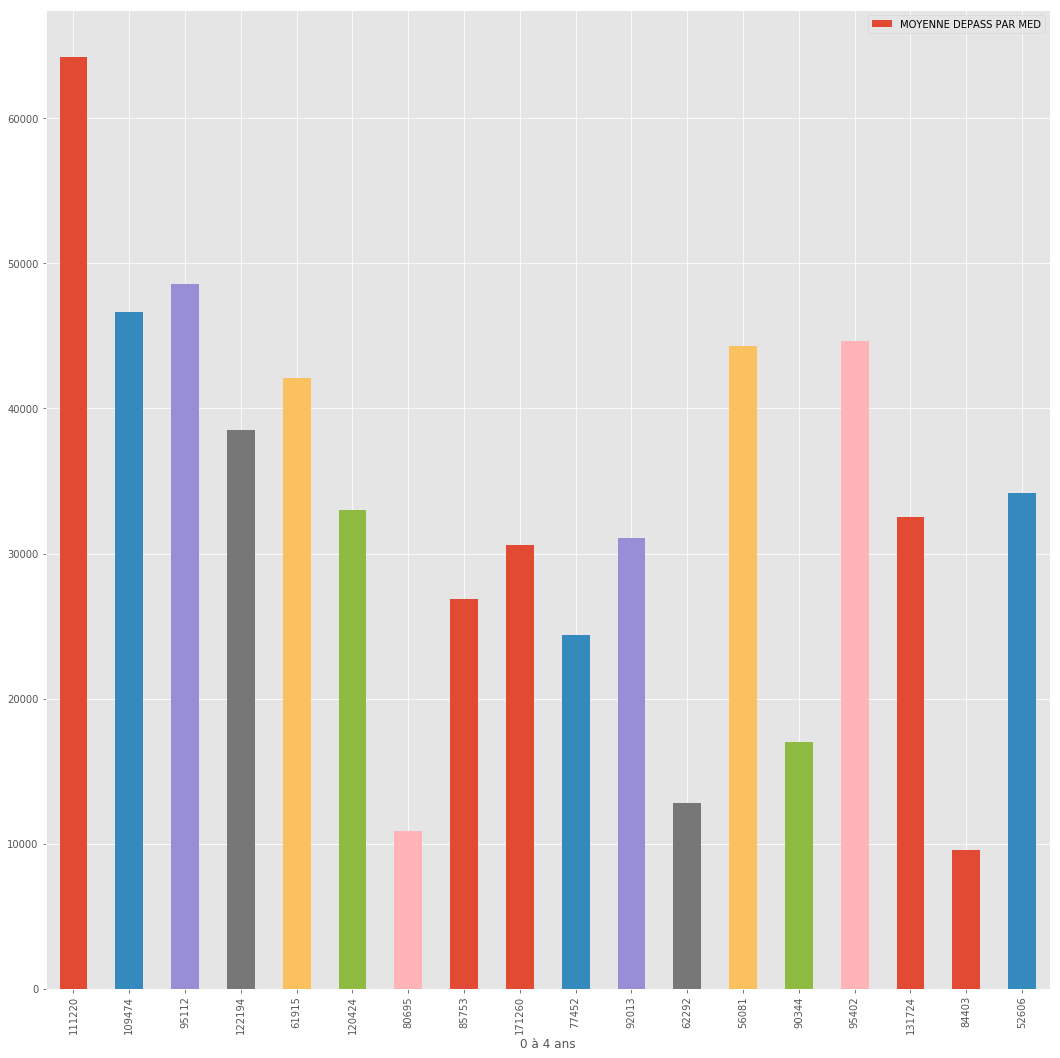

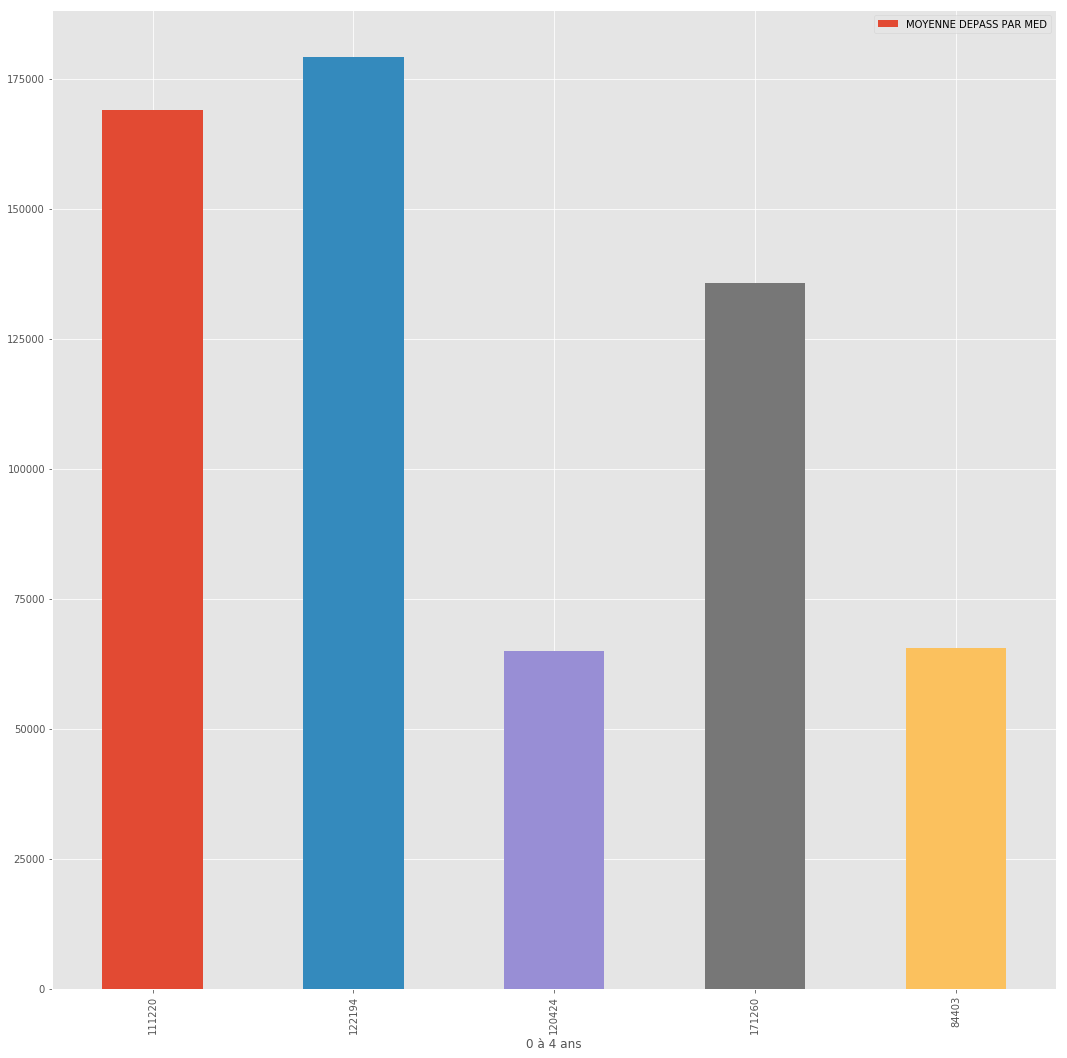

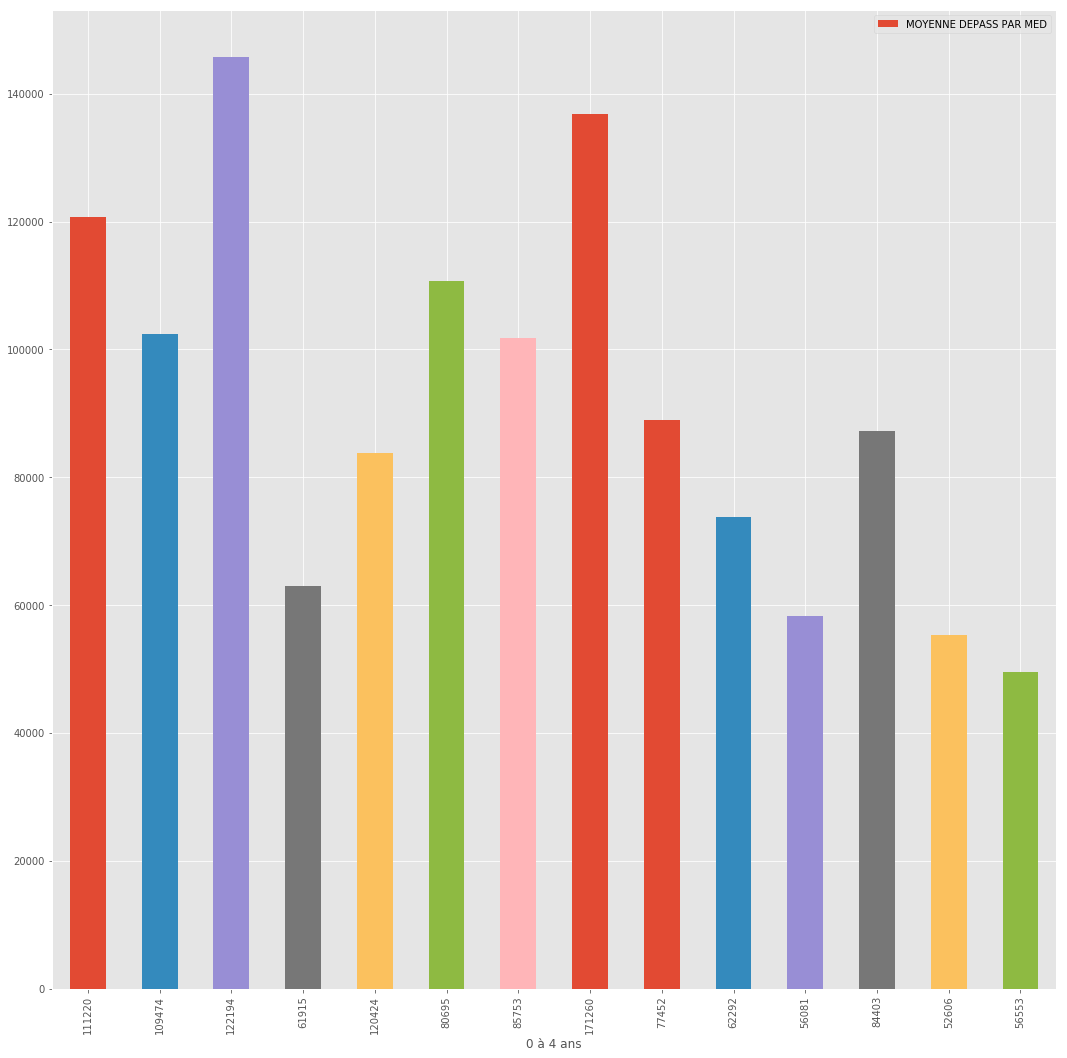

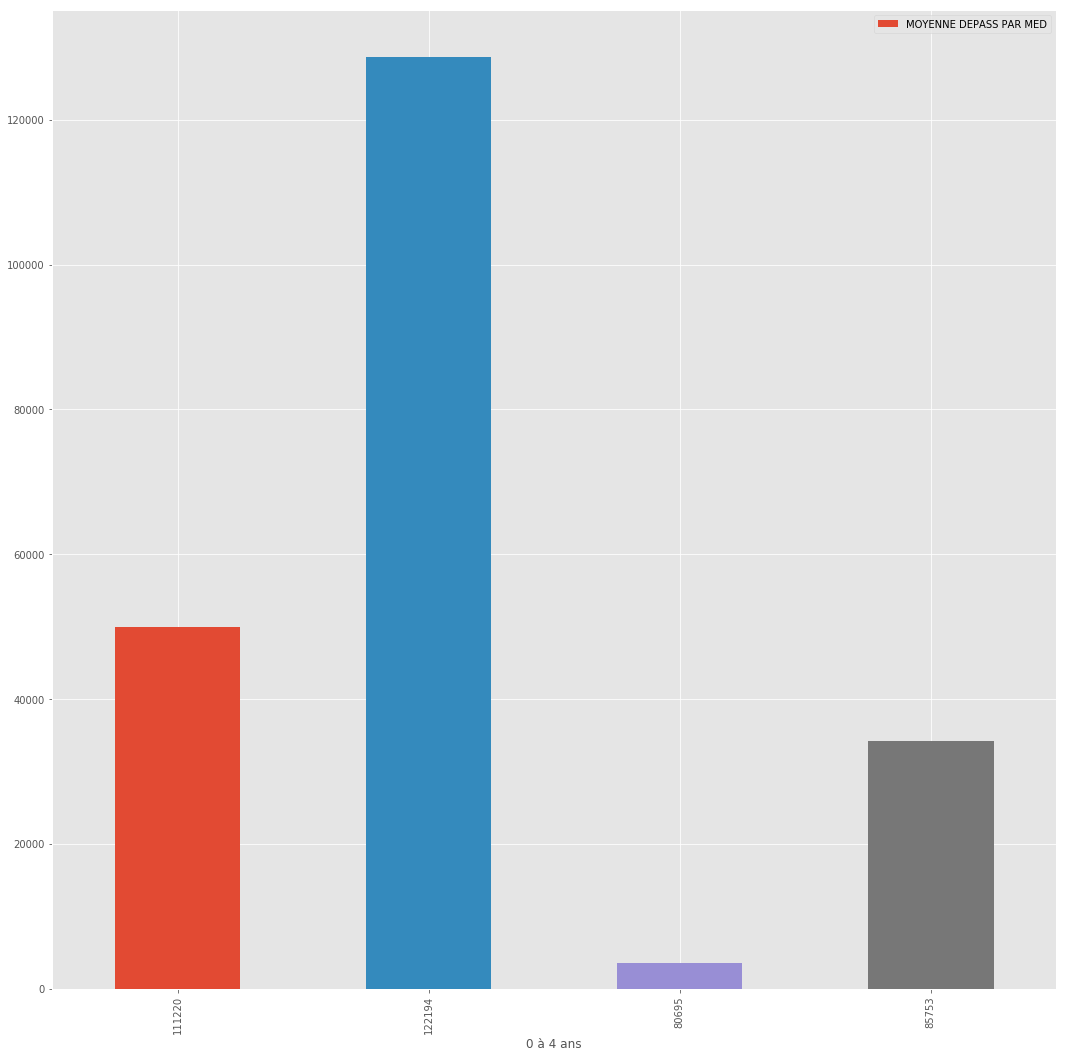

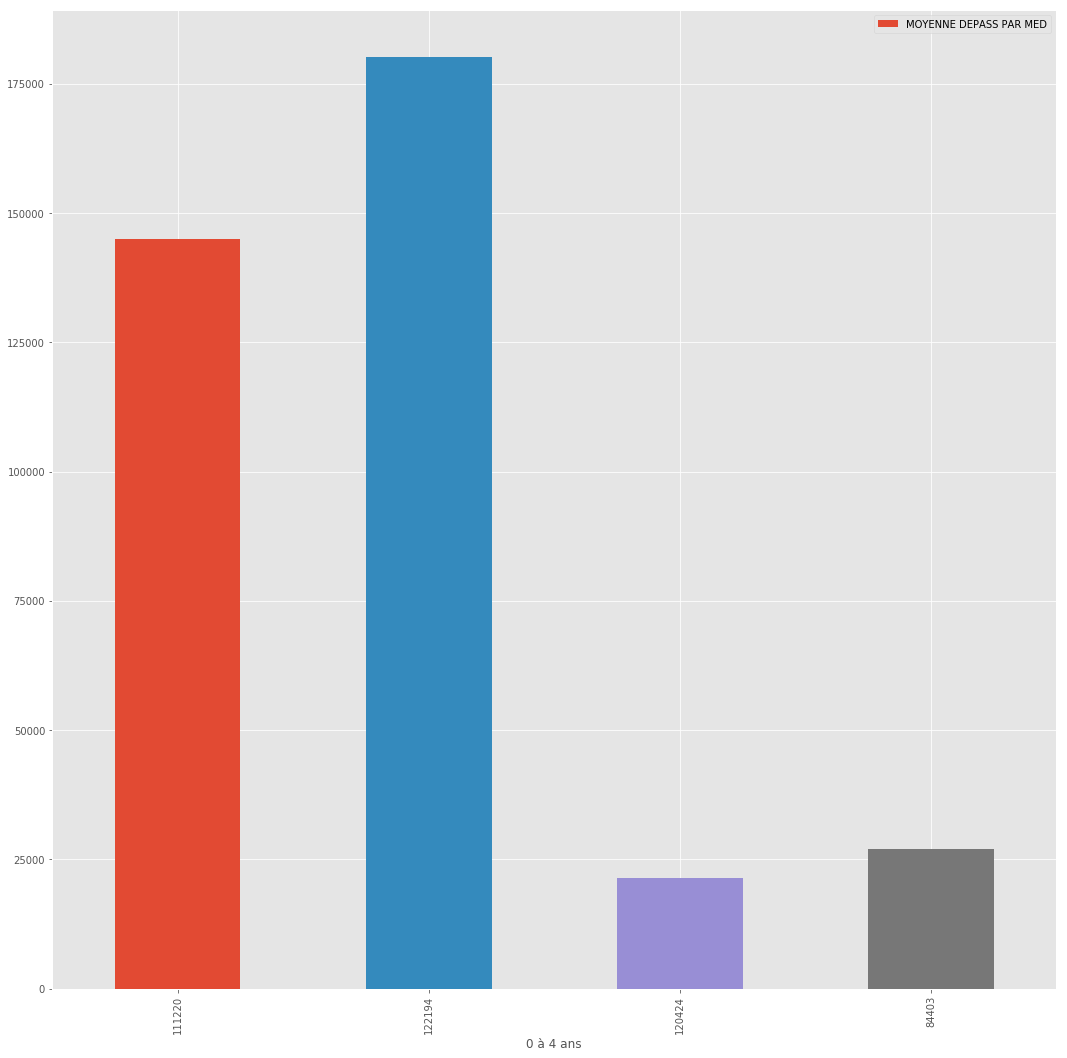

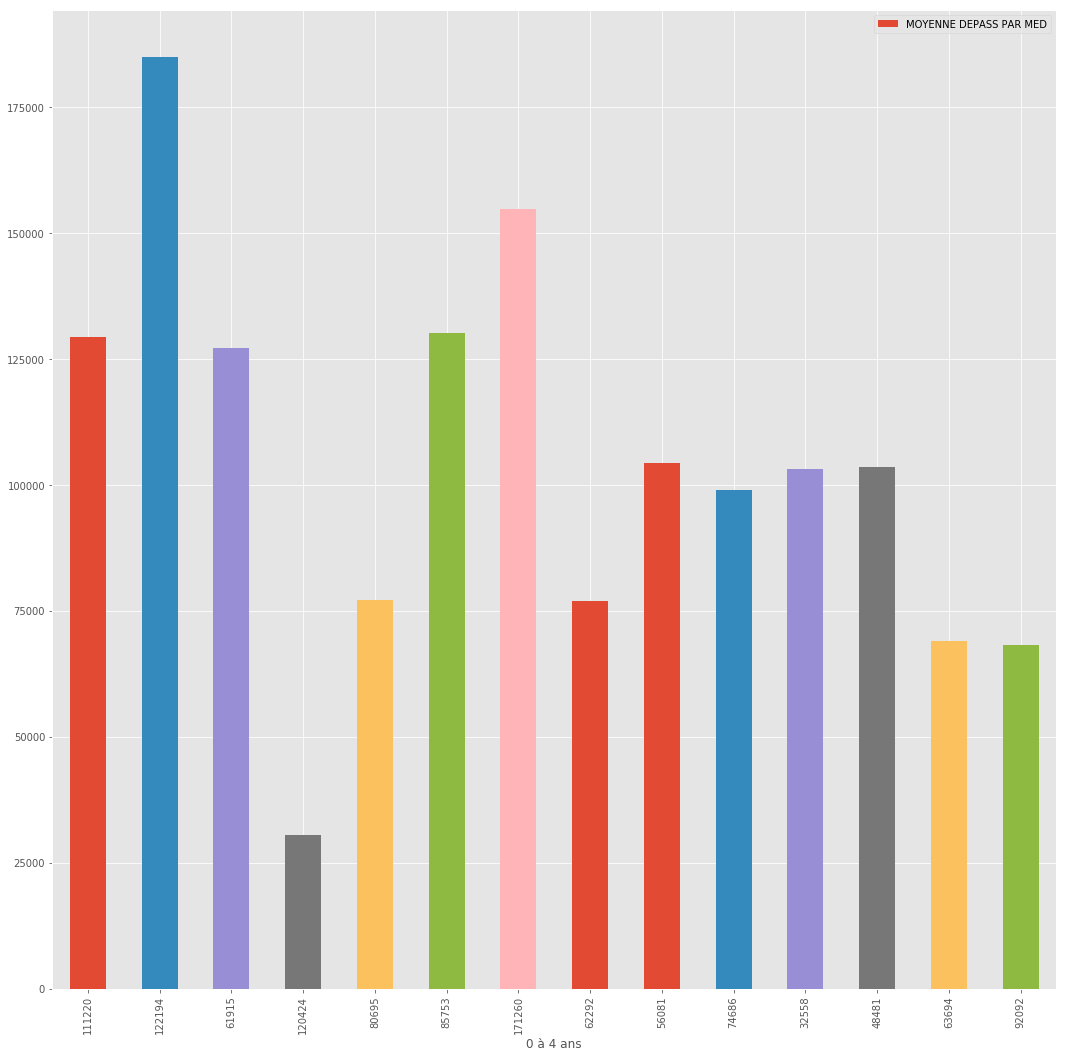

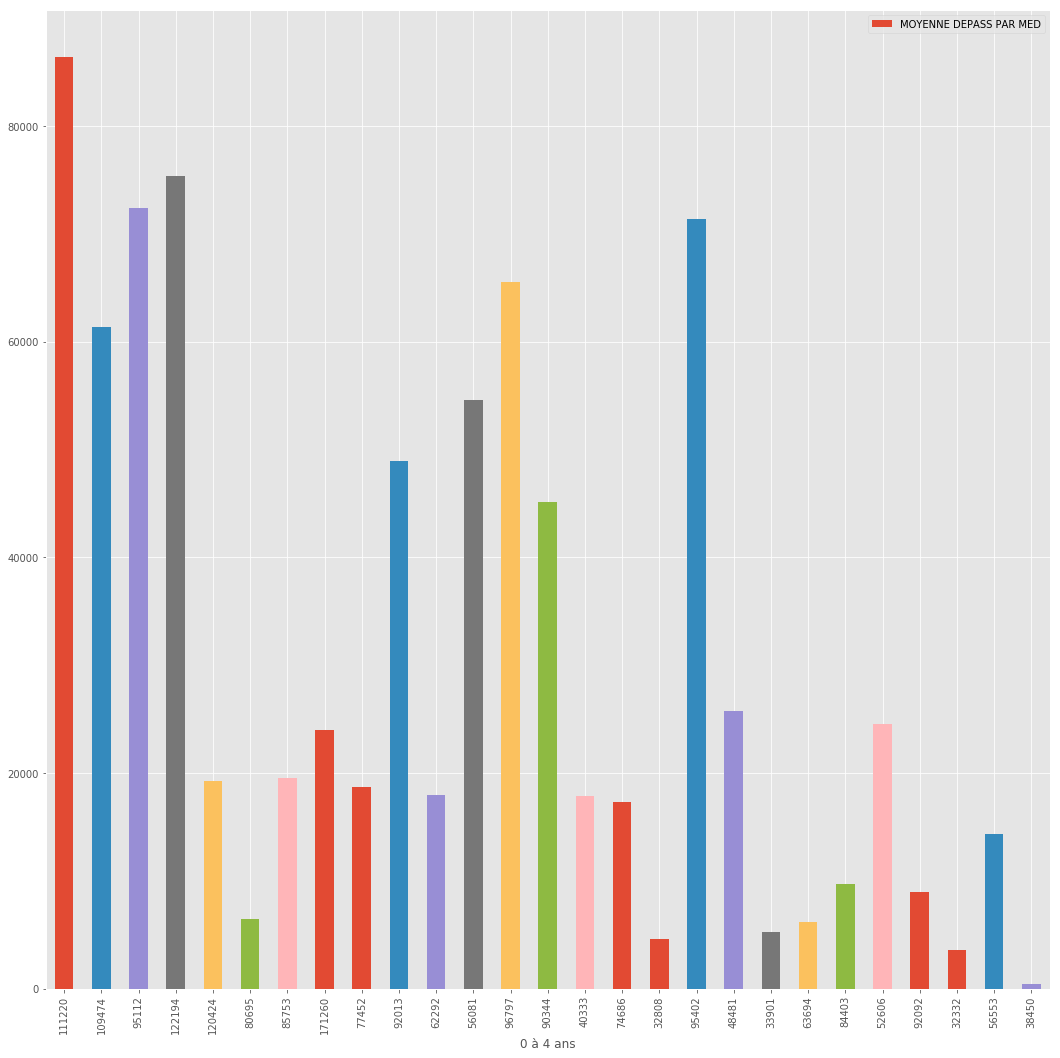

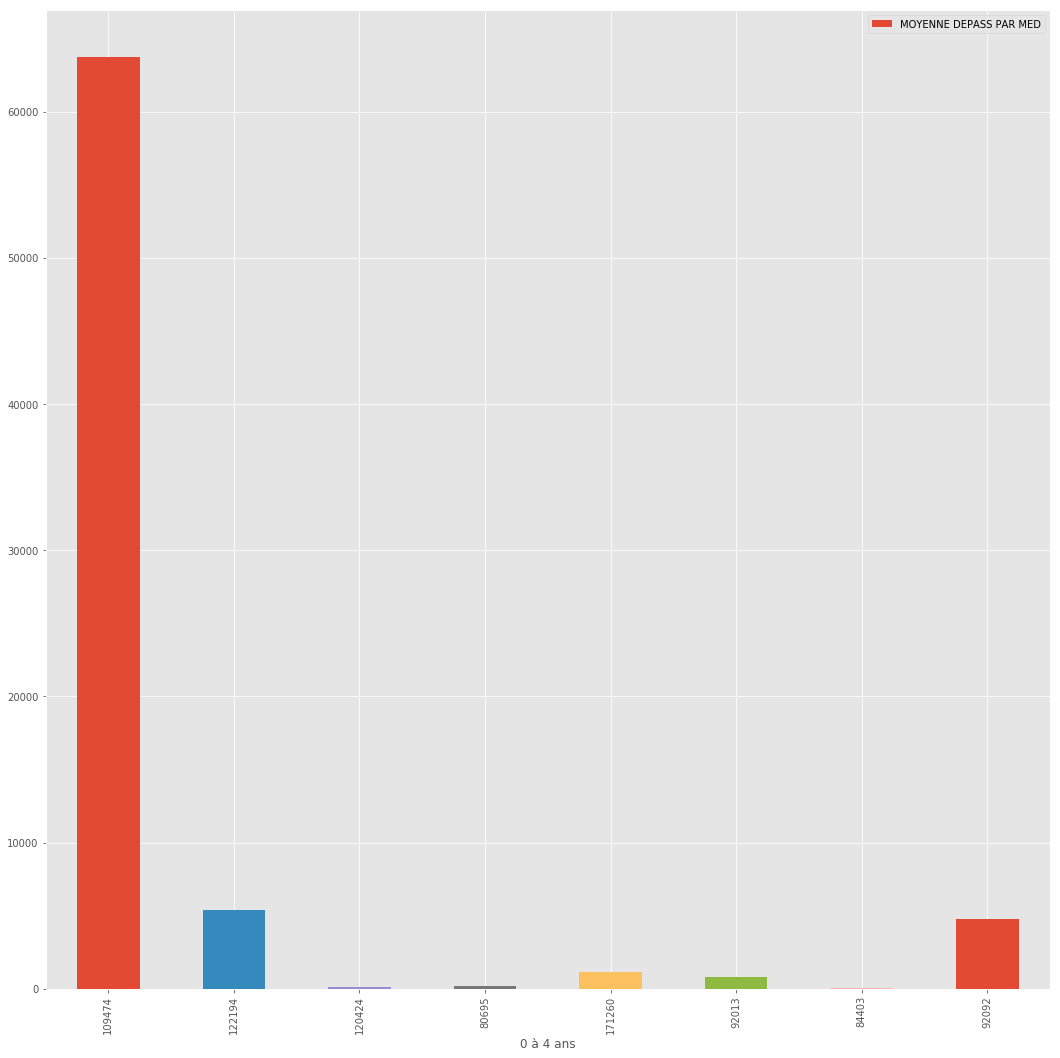

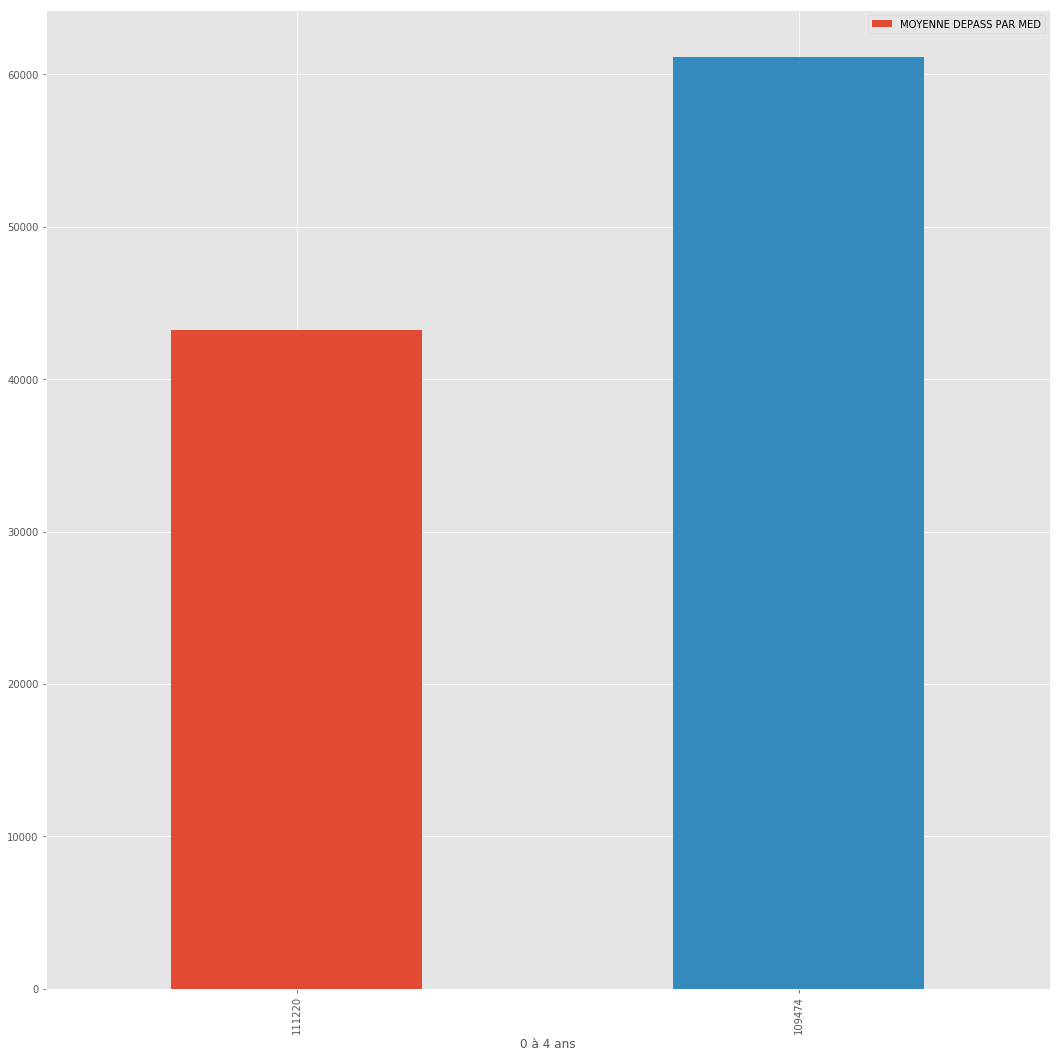

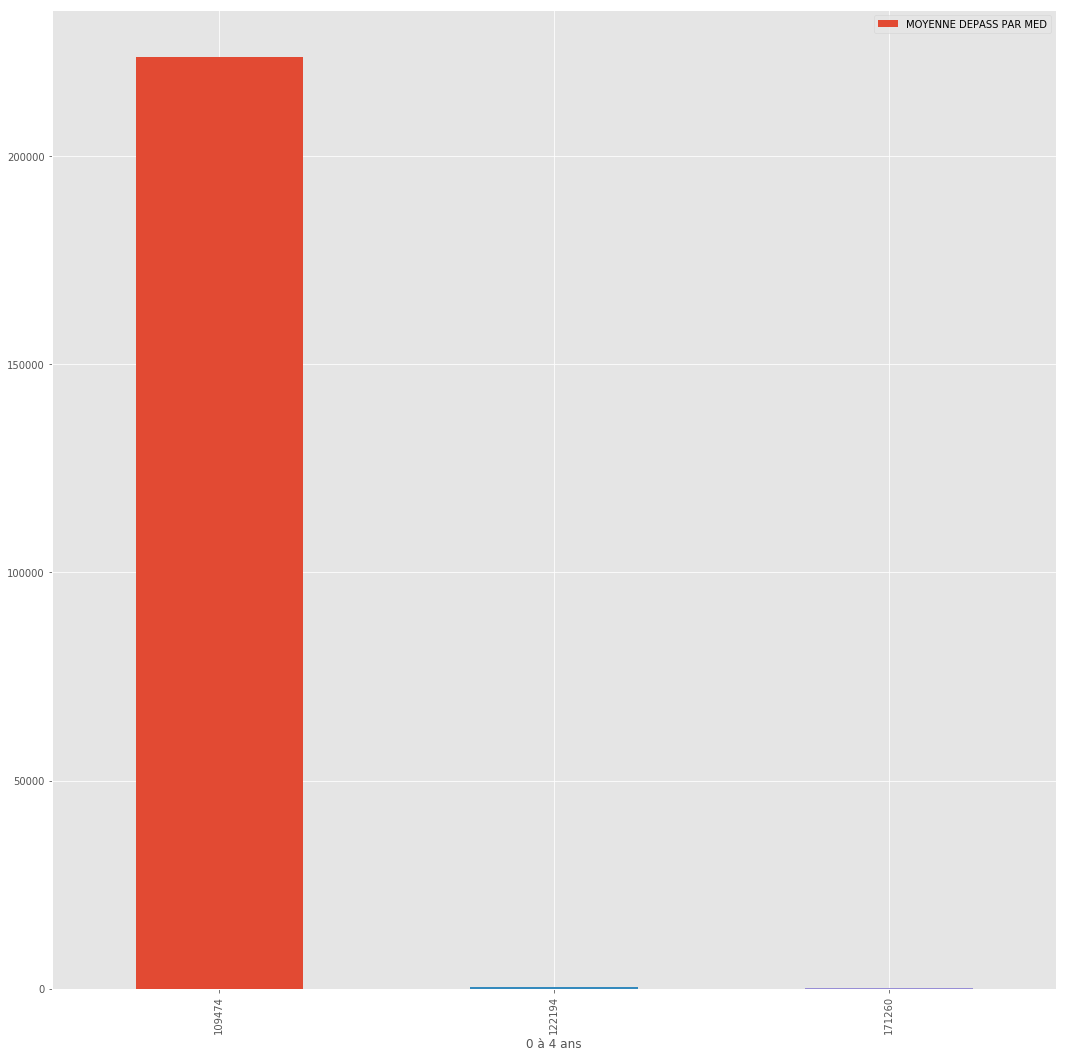

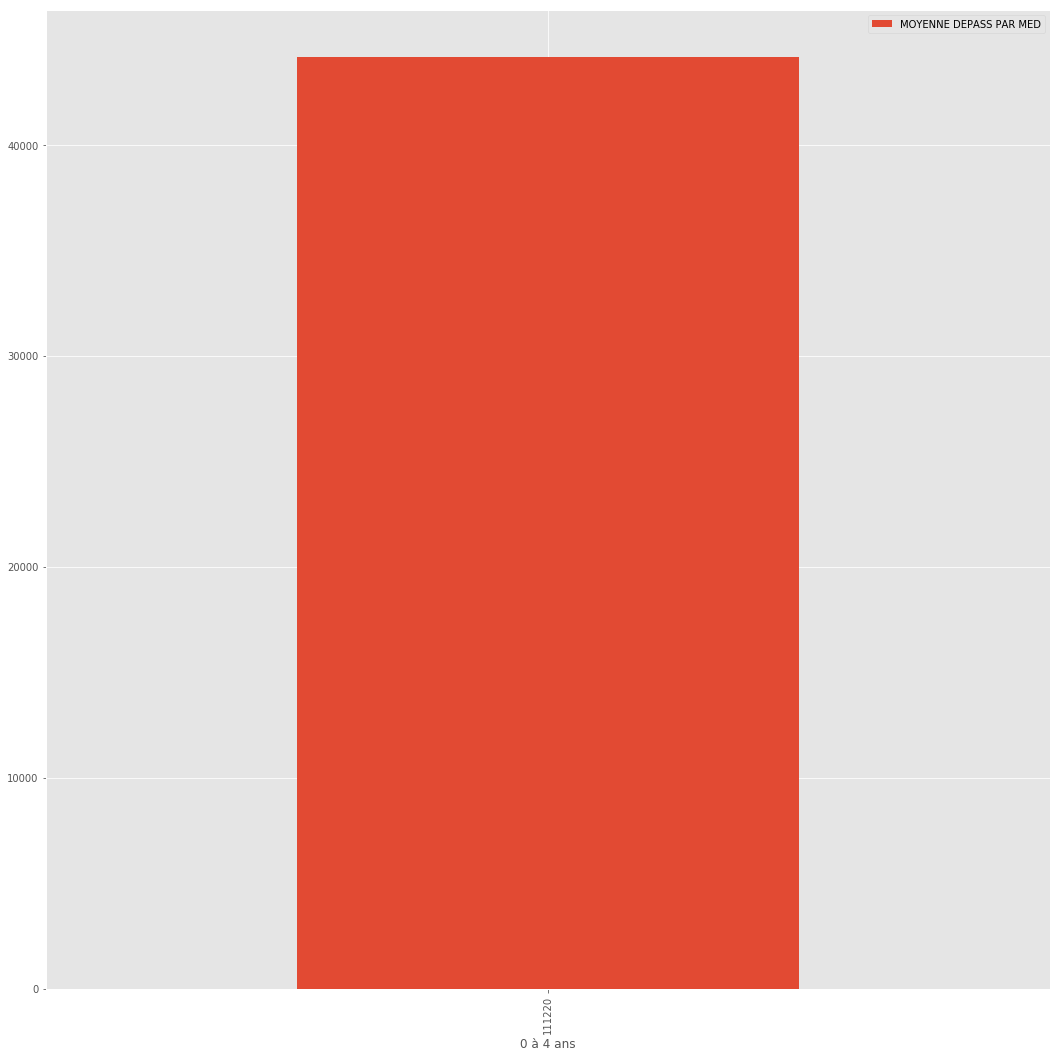

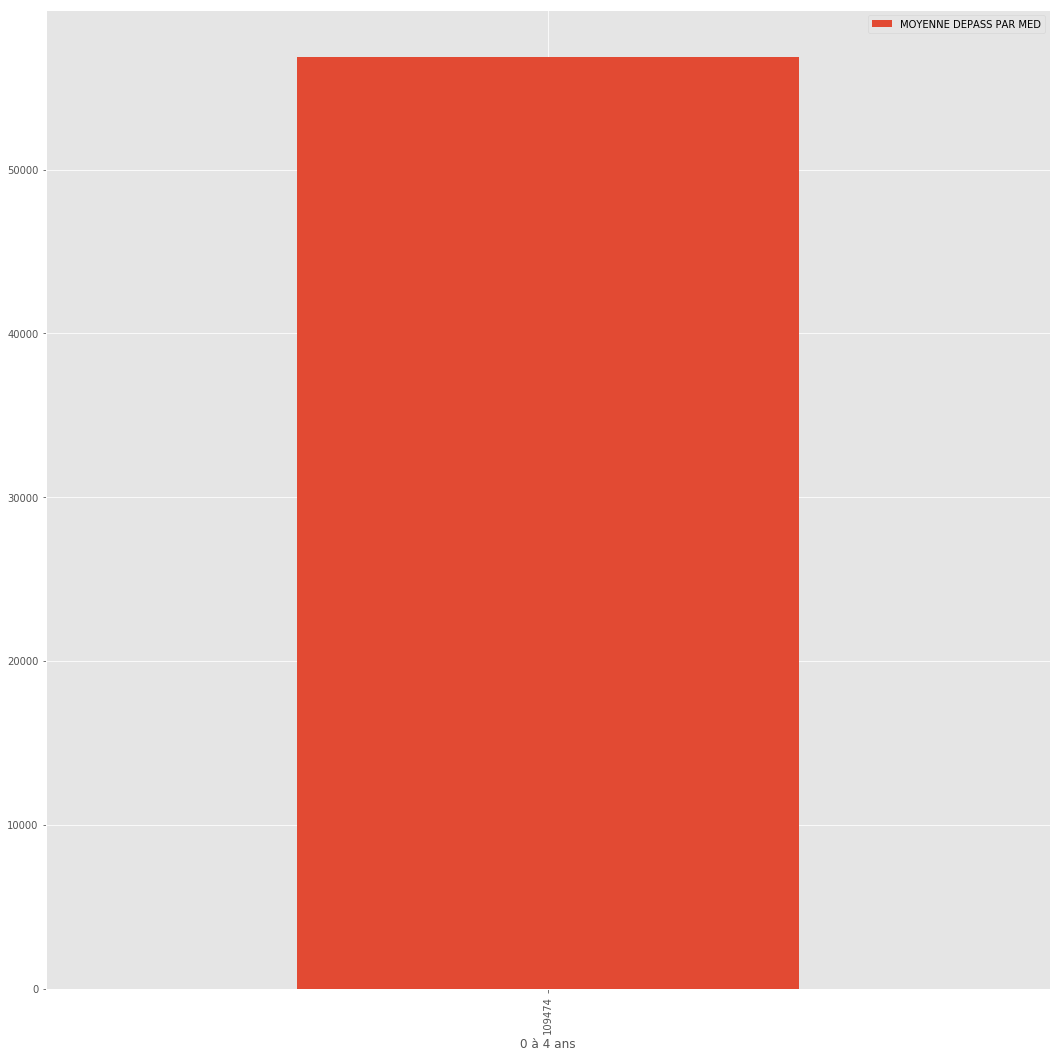

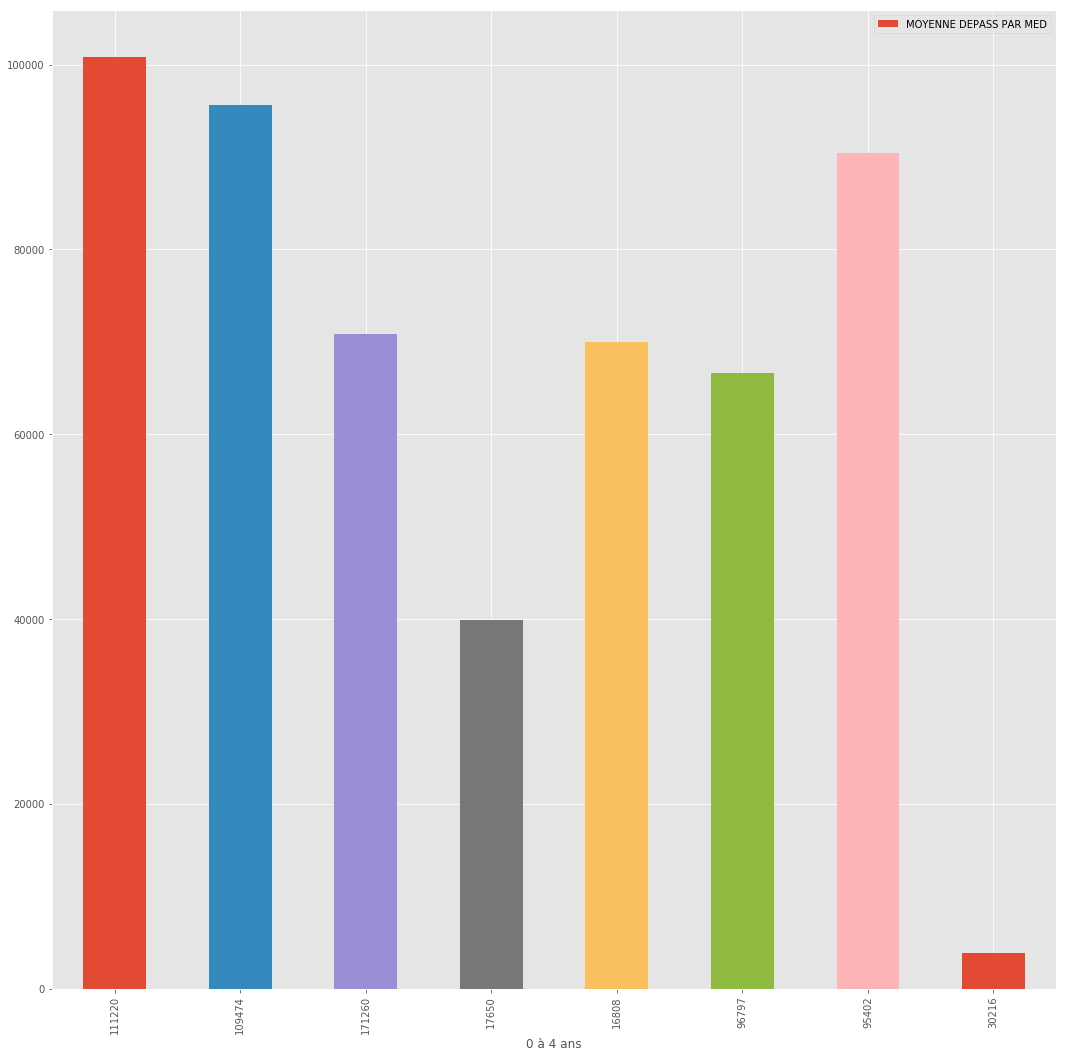

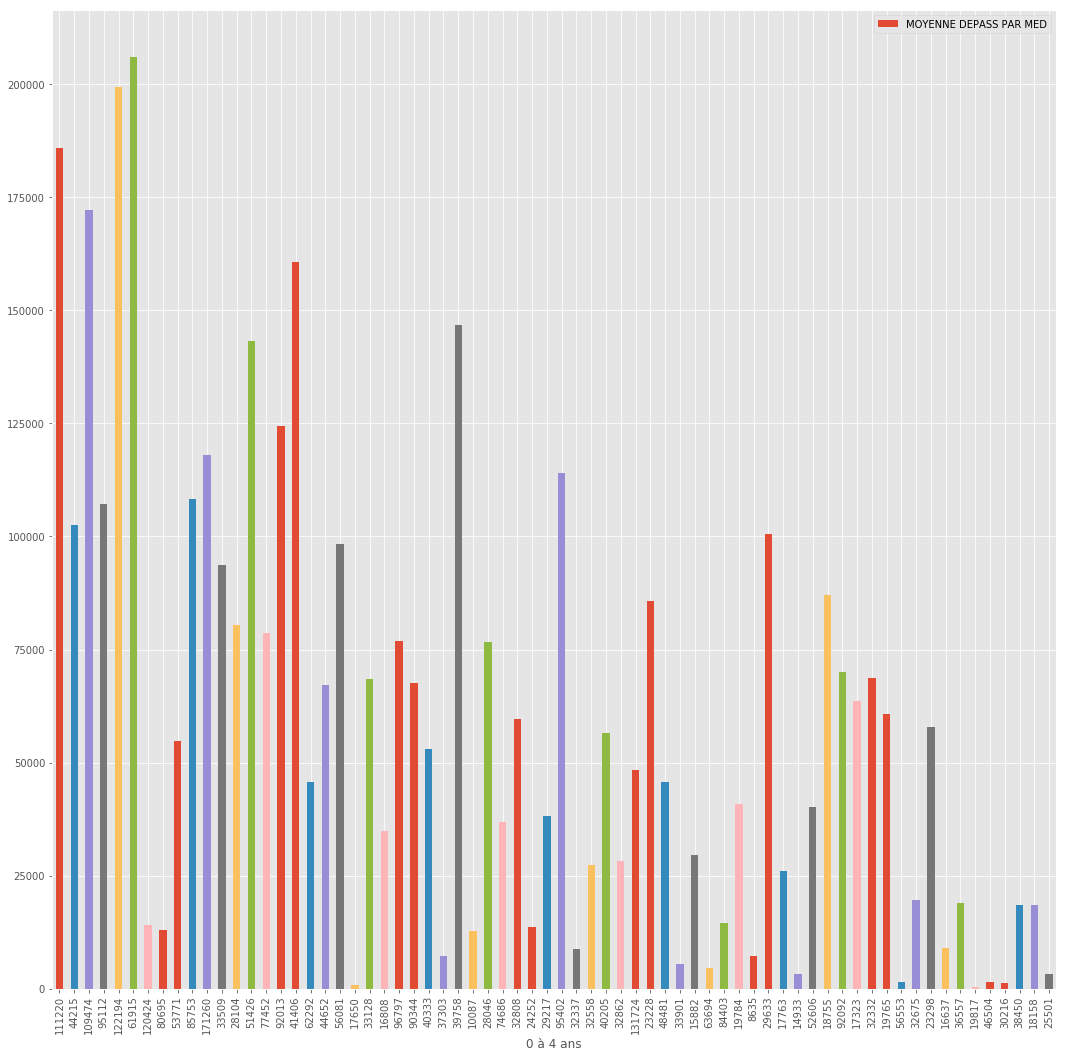

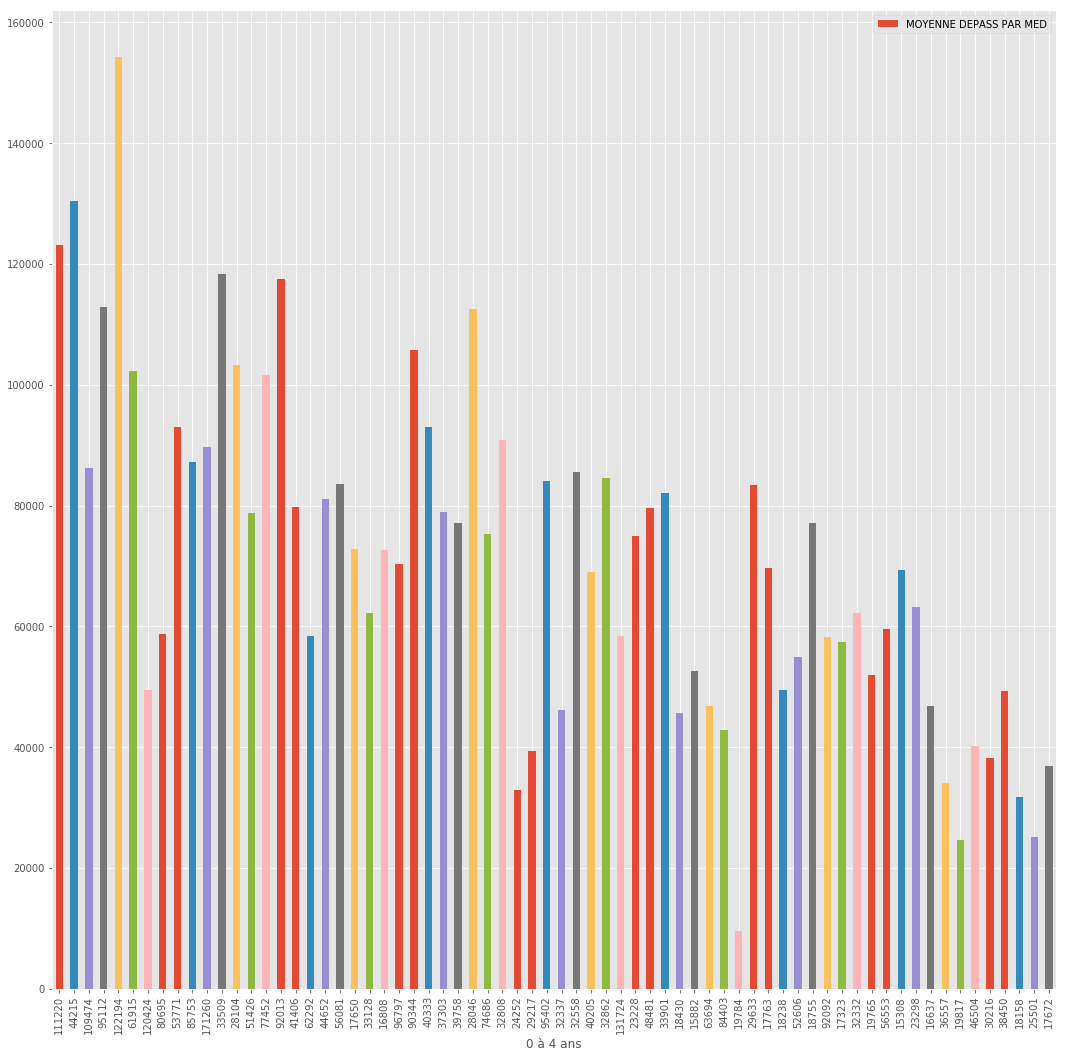

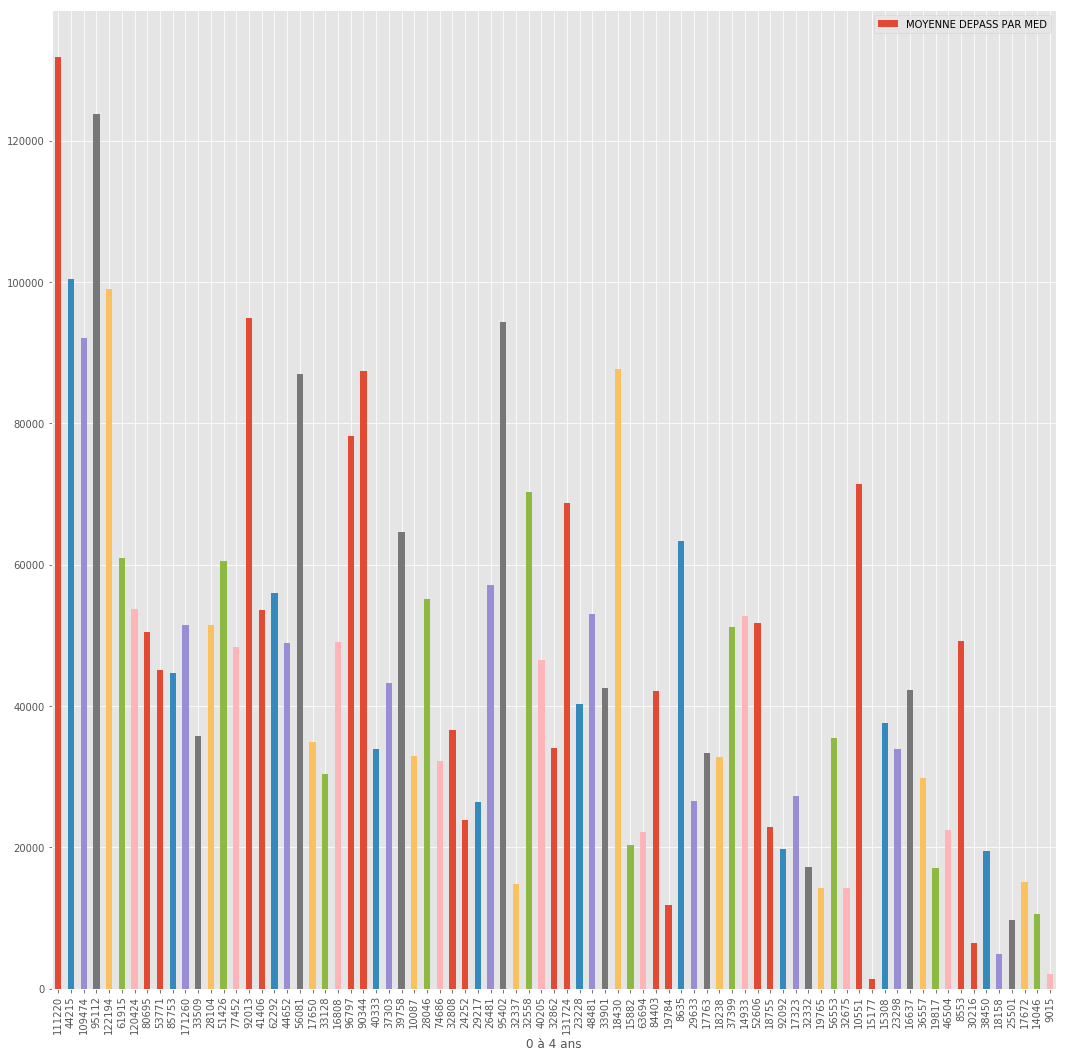

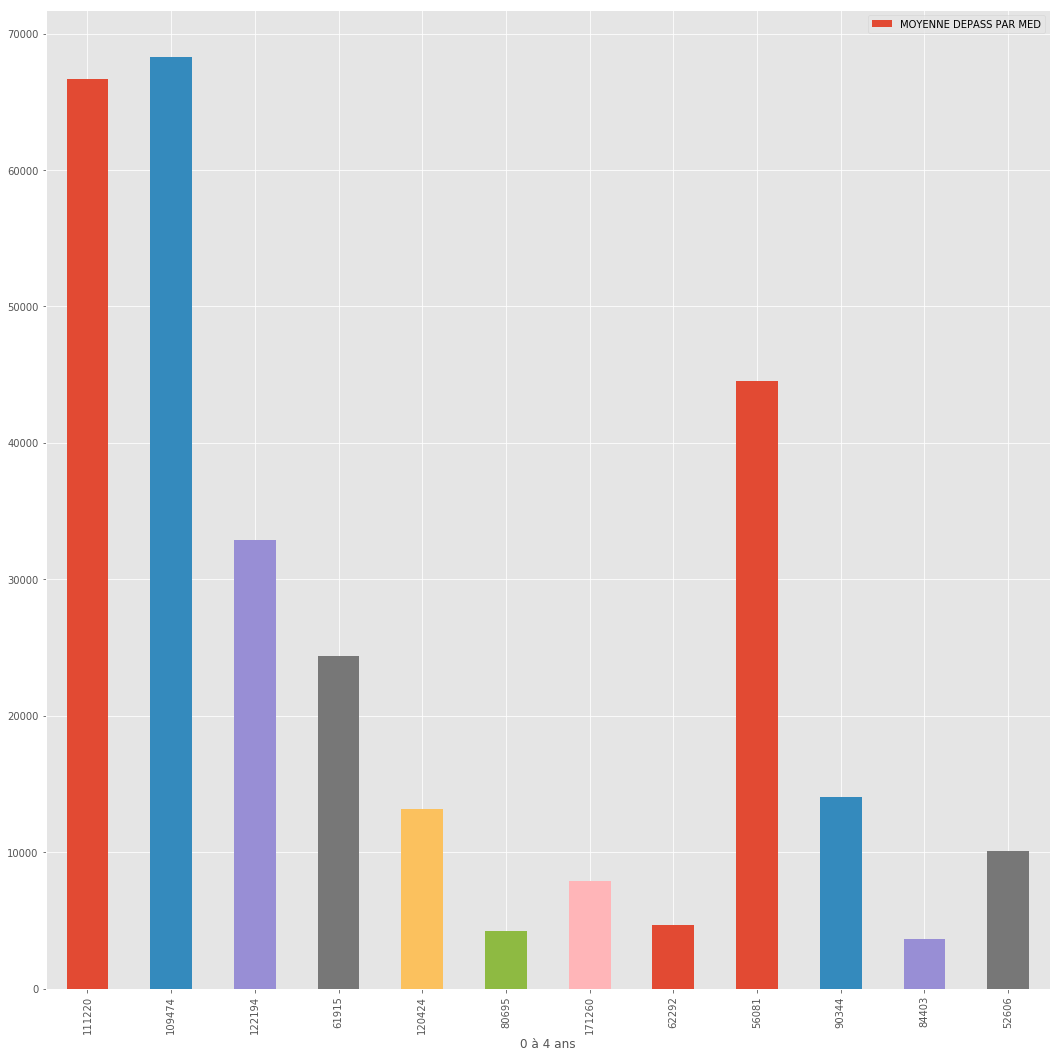

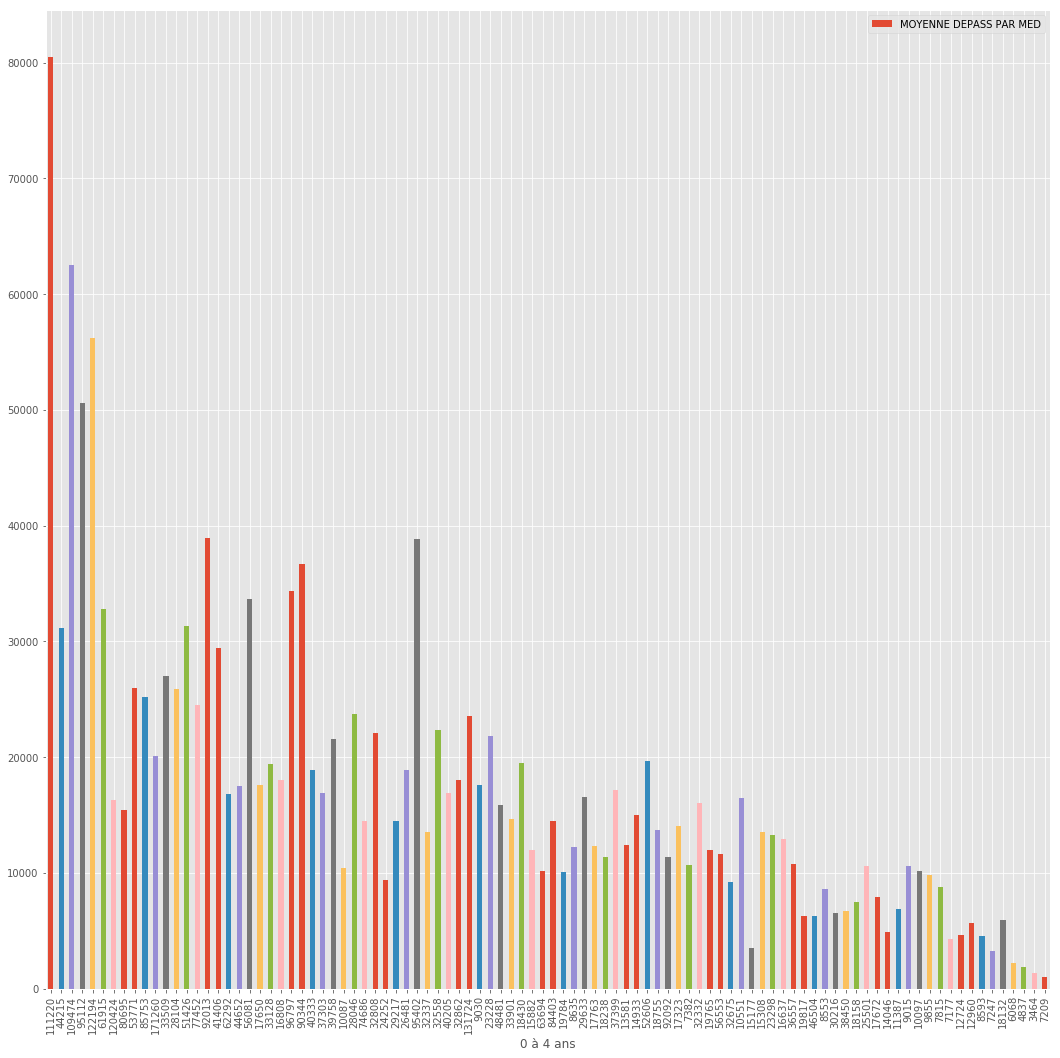

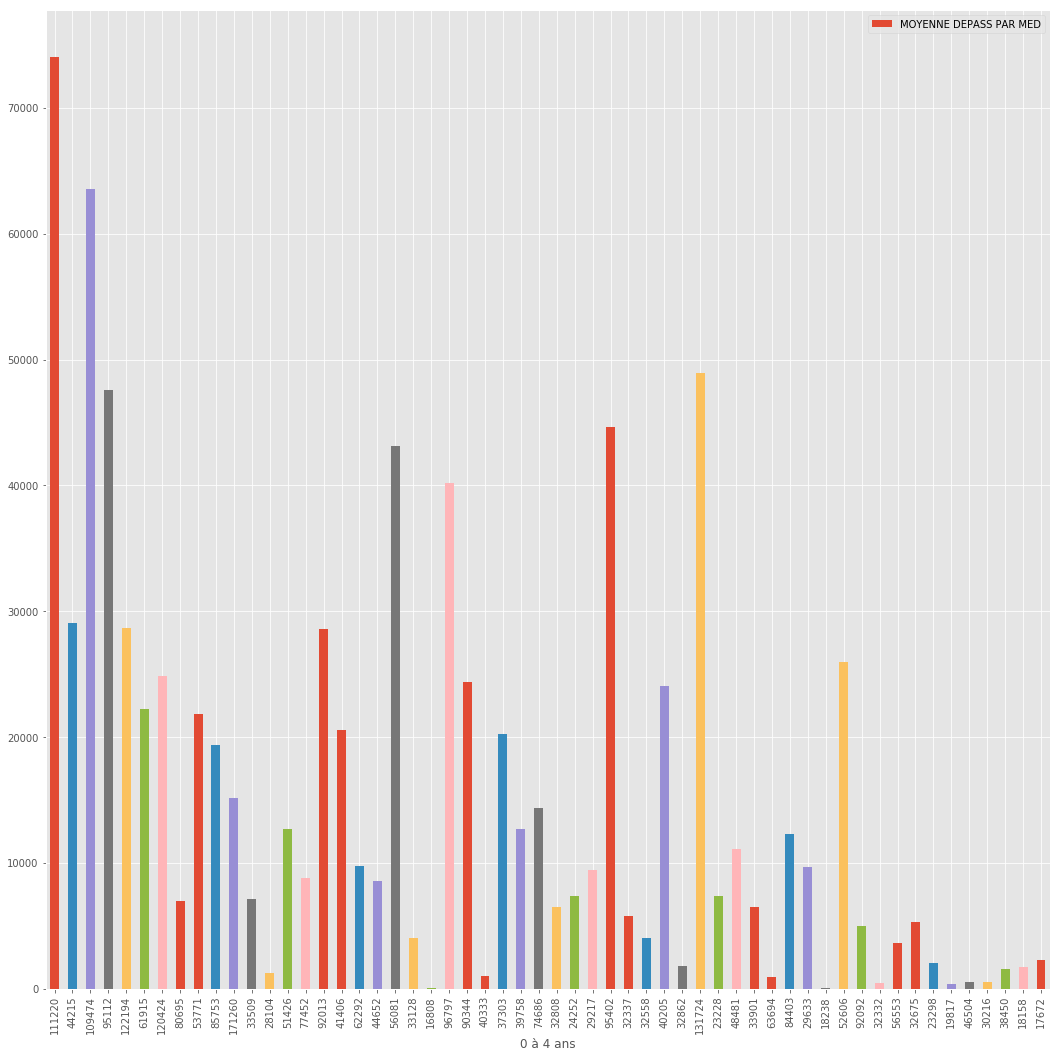

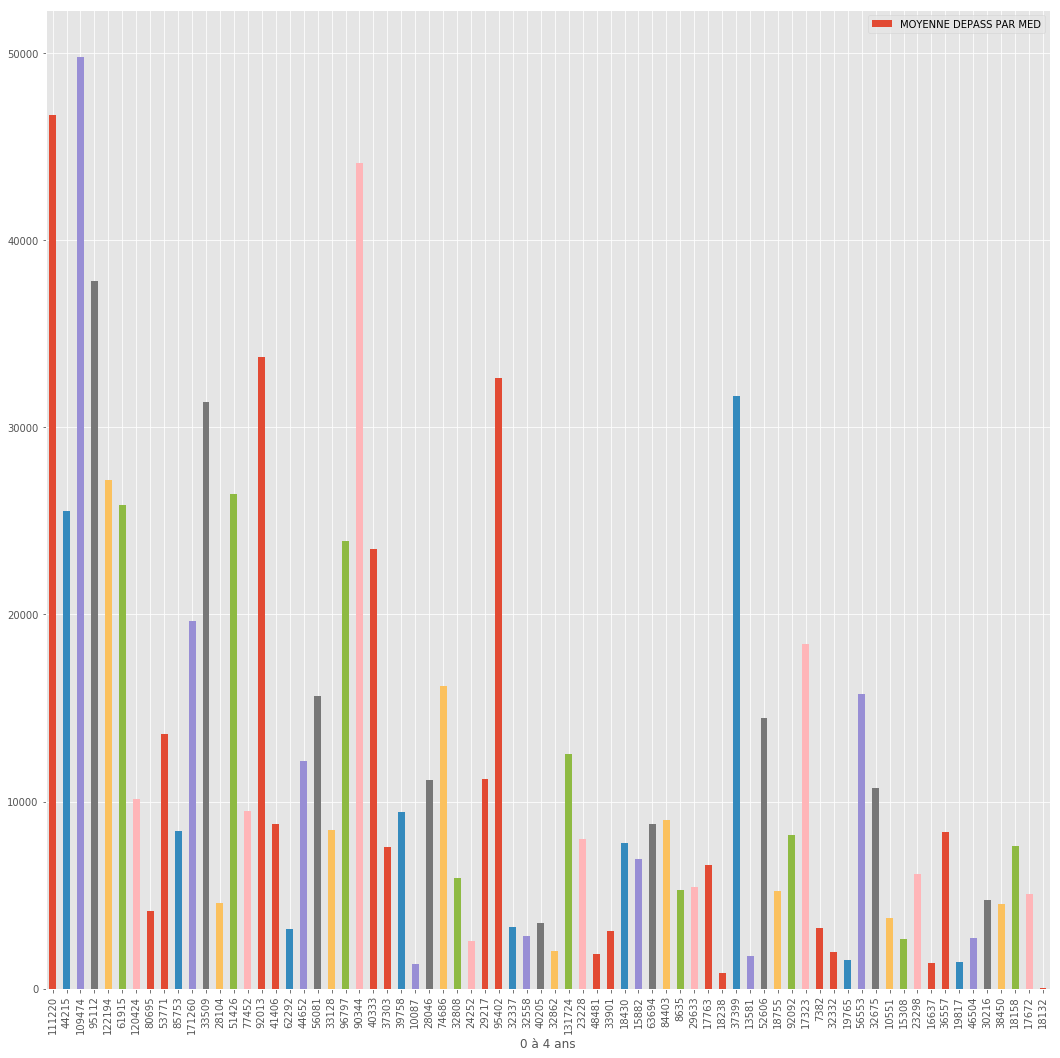

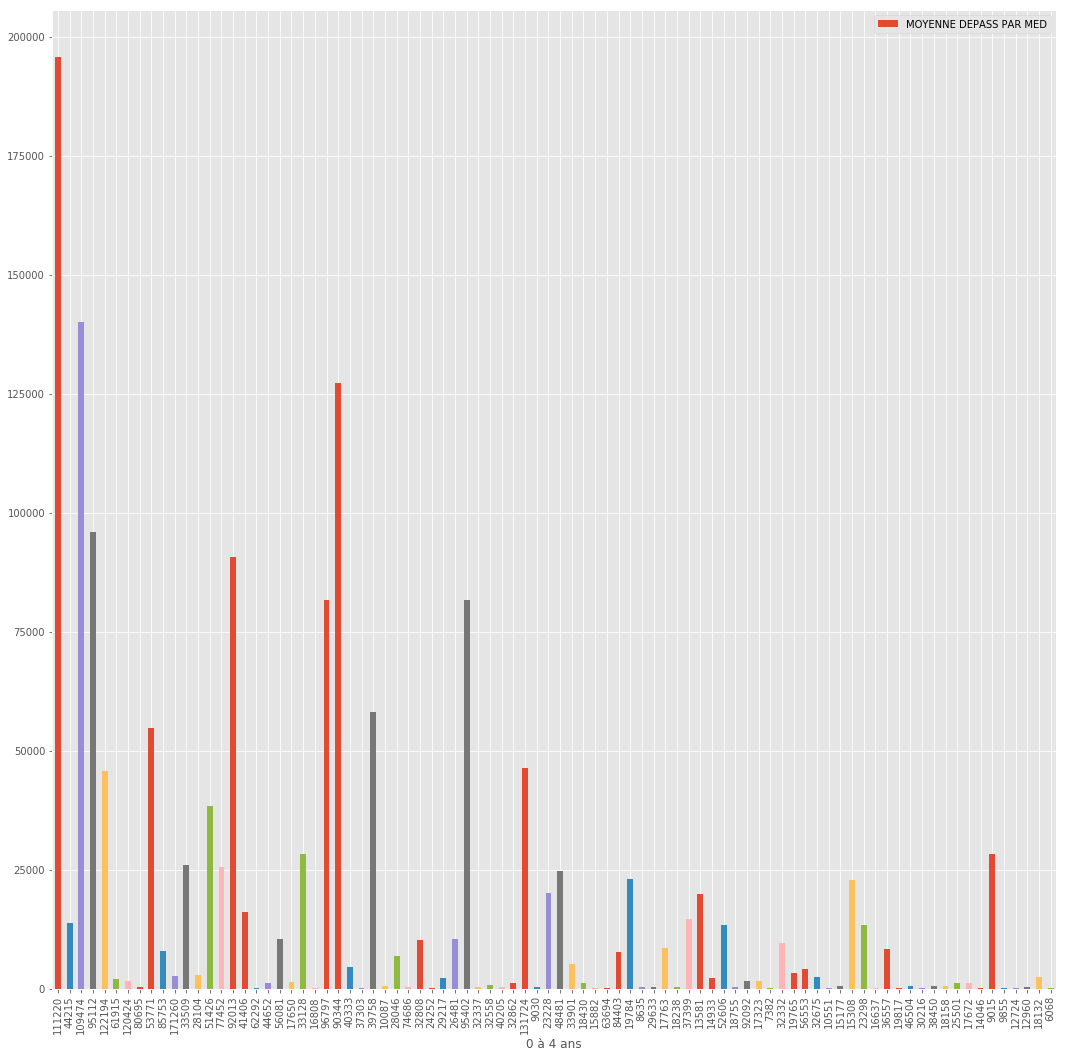

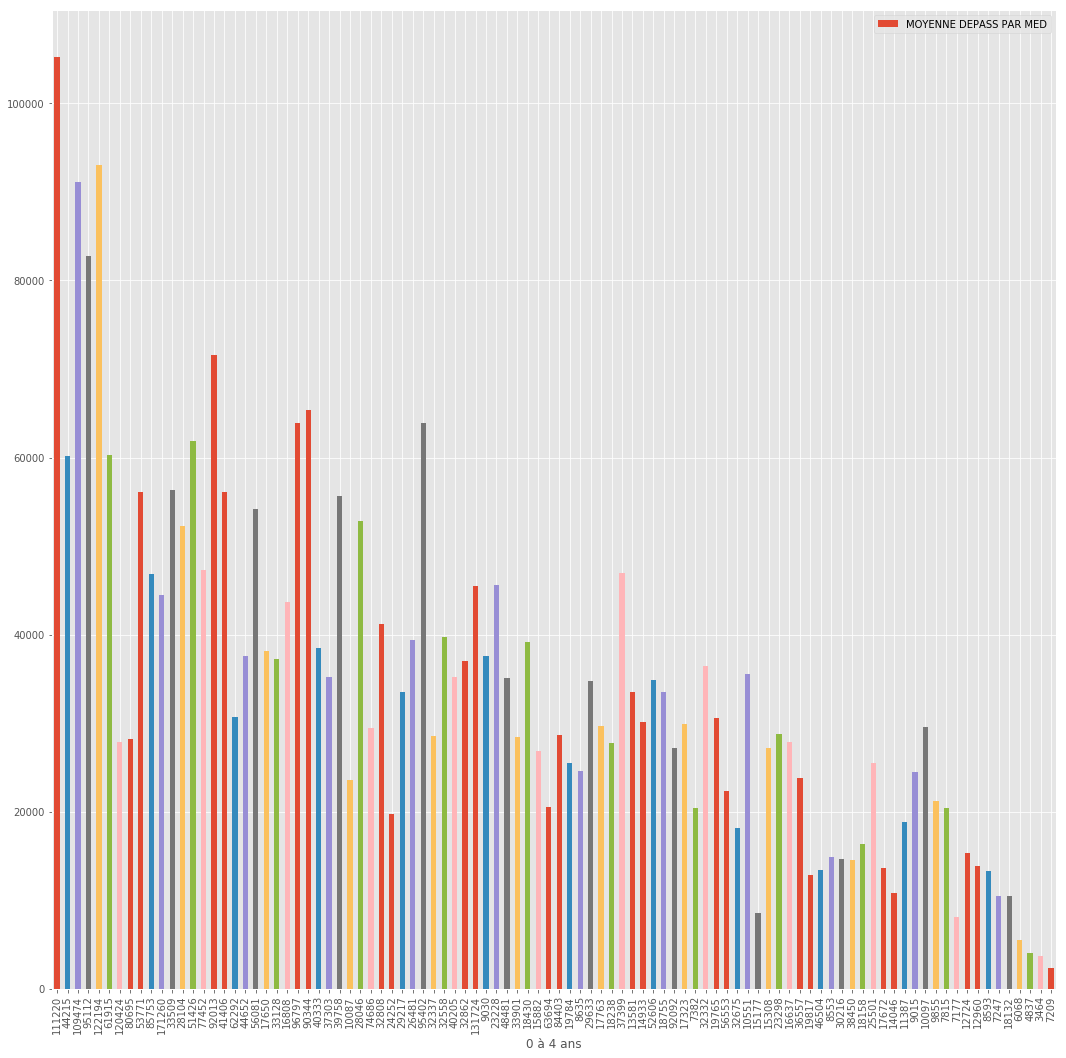

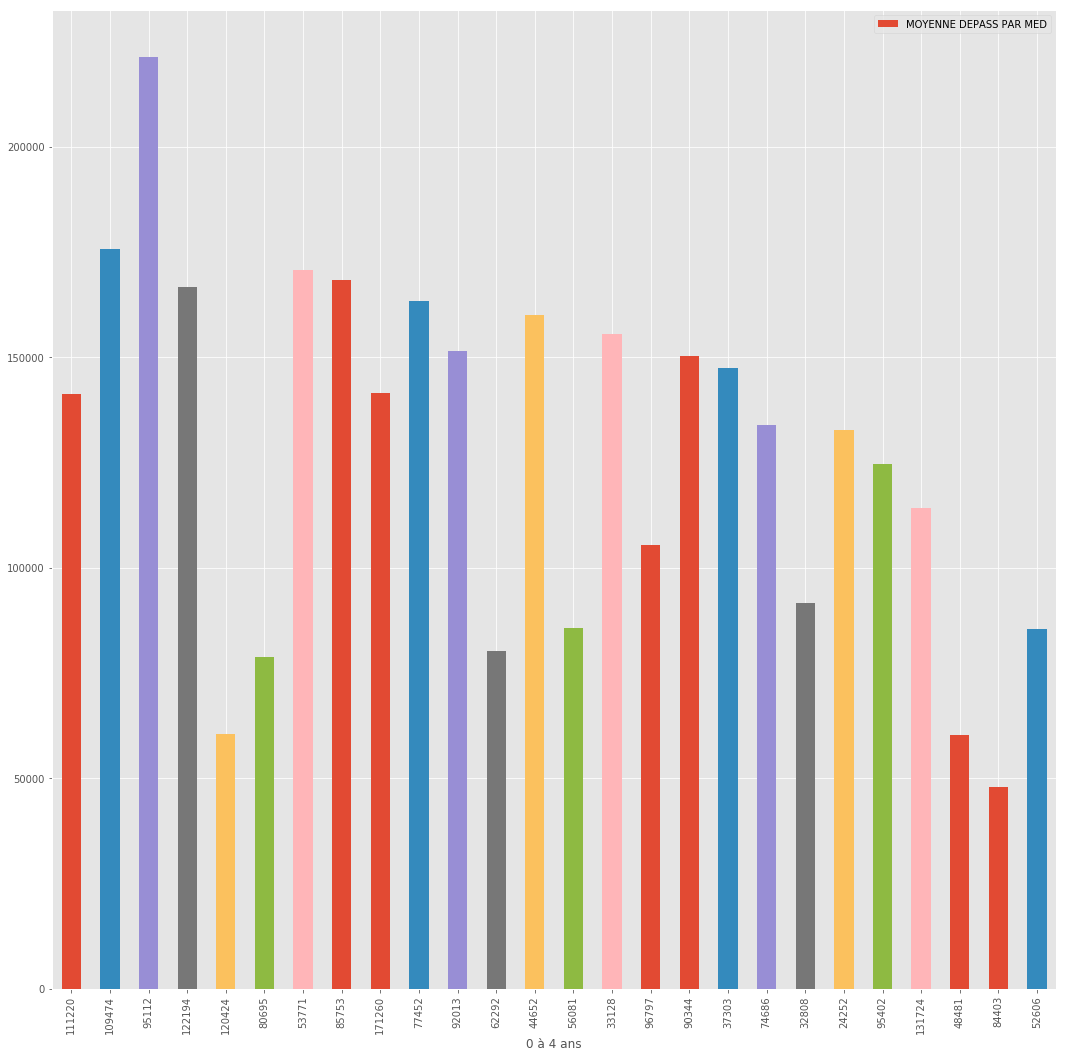

In [42]:
df_hon_pop_grp1.plot("0 à 4 ans", "MOYENNE DEPASS PAR MED", kind="bar", figsize=(18,18))

- #### <span style="color:blue"> On remaque que les dépassement augmentent avec le nombre total de la population pour chaque département. <span>

9.36258763800912


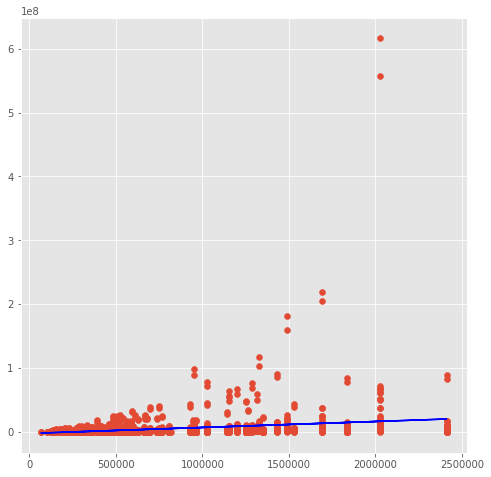

In [64]:
df_hon_pop = df_hon_pop.fillna(0)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(df_hon_pop['Pop 0 à 74']),np.asarray(df_hon_pop['DEPASSEMENTS (Euros)']))
plt.figure(figsize=(8,8))
plt.scatter(df_hon_pop['Pop 0 à 74'], df_hon_pop['DEPASSEMENTS (Euros)'])
X = df_hon_pop['Pop 0 à 74']
Y = df_hon_pop['Pop 0 à 74'] * slope + intercept
plt.plot(X, Y, '-', color='b')
plt.show()

- #### <span style="color:blue"> Sachant que le dataFrame est trié d'une manière décroissante par rapport au dépassement moyen, on remaque que plus les médecins sont nombreux dans un département plus les dépassement sont pratiqués. Le nombre de médecins étant corrélé au nombre de la population, on constate la même chose par rapport au nombre de la population. <span>

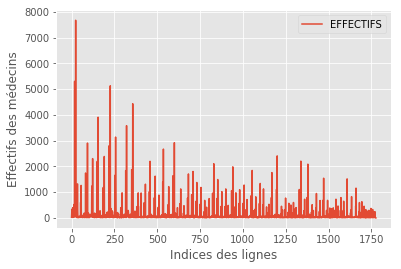

In [65]:
df_hon_pop[['EFFECTIFS']].plot()
plt.xlabel("Indices des lignes")
plt.ylabel("Effectifs des médecins")
plt.show()

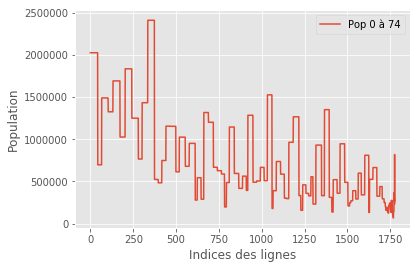

In [66]:
df_hon_pop[['Pop 0 à 74']].plot()
plt.xlabel("Indices des lignes")
plt.ylabel("Population totale")
plt.show()